## DATA MINING PROJECT  - Customer Segmentation


**Msc:** Data Science and Advanced Analytics - Major in Data Science @ NOVA IMS  
**Course:** Data Mining  
2021/2022

## Importing necessary packages

In [754]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from math import ceil

from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier

import sklearn.preprocessing as prep
import statsmodels.api as statsm # QQ plot
#from sklearn.covariance import EllipticEnvelope
#from scipy.stats import chi2
#from sklearn.ensemble import IsolationForest
#from sklearn.neighbors import NearestNeighbors # For DBSCAN
#from sklearn.cluster import DBSCAN

from scipy import stats
from sklearn.cluster import KMeans


from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

from kmodes.kprototypes import KPrototypes as KP
import pydotplus
from IPython.display import Image
#Scipy
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy

from kmodes.kmodes import KModes


import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from pylab import rcParams


import sklearn
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

from sklearn.cluster import DBSCAN
from sklearn import metrics

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import MeanShift, estimate_bandwidth

from sklearn import mixture

In [755]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
# from pandas_profiling import ProfileReport 

%matplotlib inline

from math import ceil
from sklearn.cluster import KMeans


import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime
from datetime import date
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift, DBSCAN, estimate_bandwidth

import matplotlib.cm as cm
# import graphviz
from sklearn.manifold import TSNE

In [756]:
import warnings
warnings.filterwarnings('ignore')

## 1) Reading and Storing the Insurance Dataset

In [757]:
# reading dataset and storing it in variable 'data'
data_original = pd.read_sas('a2z_insurance.sas7bdat')

In [758]:
data = data_original.copy()

In [759]:
#Checking how many rows and columns are in the dataset
initial_row_count = data.shape[0]
initial_column_count = data.shape[1]

print('The dataset has', initial_row_count, 'rows, and', initial_column_count, 'columns')

The dataset has 10296 rows, and 14 columns


In [760]:
#first look at dataset
data.head()

CustID  FirstPolYear  BirthYear             EducDeg  MonthSal  GeoLivArea  \
0     1.0        1985.0     1982.0  b'2 - High School'    2177.0         1.0   
1     2.0        1981.0     1995.0  b'2 - High School'     677.0         4.0   
2     3.0        1991.0     1970.0        b'1 - Basic'    2277.0         3.0   
3     4.0        1990.0     1981.0      b'3 - BSc/MSc'    1099.0         4.0   
4     5.0        1986.0     1973.0      b'3 - BSc/MSc'    1763.0         4.0   

   Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  PremHealth  \
0       1.0      380.97        0.39     375.85          79.45      146.36   
1       1.0     -131.13        1.12      77.46         416.20      116.69   
2       0.0      504.67        0.28     206.15         224.50      124.58   
3       1.0      -16.99        0.99     182.48          43.35      311.17   
4       1.0       35.23        0.90     338.62          47.80      182.59   

   PremLife  PremWork  
0     47.01     16.89  
1    194.48    106.13  
2     86.35     99.02  
3     35.34     28.34  
4     18.78     41.45

In [761]:
#Checking the statistical describe of the numerical columns
data.describe(include='all').T

count unique             top  freq         mean          std  \
CustID         10296.0    NaN             NaN   NaN       5148.5   2972.34352   
FirstPolYear   10266.0    NaN             NaN   NaN  1991.062634   511.267913   
BirthYear      10279.0    NaN             NaN   NaN  1968.007783    19.709476   
EducDeg          10279      4  b'3 - BSc/MSc'  4799          NaN          NaN   
MonthSal       10260.0    NaN             NaN   NaN  2506.667057  1157.449634   
GeoLivArea     10295.0    NaN             NaN   NaN     2.709859     1.266291   
Children       10275.0    NaN             NaN   NaN     0.706764     0.455268   
CustMonVal     10296.0    NaN             NaN   NaN   177.892605  1945.811505   
ClaimsRate     10296.0    NaN             NaN   NaN     0.742772     2.916964   
PremMotor      10262.0    NaN             NaN   NaN   300.470252   211.914997   
PremHousehold  10296.0    NaN             NaN   NaN   210.431192   352.595984   
PremHealth     10253.0    NaN             NaN   NaN   171.580833   296.405976   
PremLife       10192.0    NaN             NaN   NaN    41.855782    47.480632   
PremWork       10210.0    NaN             NaN   NaN    41.277514    51.513572   

                     min      25%     50%       75%       max  
CustID               1.0  2574.75  5148.5   7722.25   10296.0  
FirstPolYear      1974.0   1980.0  1986.0    1992.0   53784.0  
BirthYear         1028.0   1953.0  1968.0    1983.0    2001.0  
EducDeg              NaN      NaN     NaN       NaN       NaN  
MonthSal           333.0   1706.0  2501.5   3290.25   55215.0  
GeoLivArea           1.0      1.0     3.0       4.0       4.0  
Children             0.0      0.0     1.0       1.0       1.0  
CustMonVal    -165680.42    -9.44  186.87  399.7775  11875.89  
ClaimsRate           0.0     0.39    0.72      0.98     256.2  
PremMotor          -4.11   190.59  298.61     408.3  11604.42  
PremHousehold      -75.0    49.45   132.8    290.05   25048.8  
PremHealth         -2.11    111.8  162.81    219.82   28272.0  
PremLife            -7.0     9.89   25.56     57.79     398.3  
PremWork           -12.0    10.67   25.67     56.79    1988.7

In [762]:
#Checking the amount of missing values in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


**Initial Observations**  

After looking at the dataframe, we noticed we have to have to do some data preparation and pre processing, mainly due to incoherent data, outliers and missing values before any analysis can take place.


## 2) Data Preparation

In [763]:
#droping the duplicates from the dataframe (excluding the CustID)
cols_without_customerId = data.columns.tolist()[1:]
data = data.drop_duplicates(subset=cols_without_customerId)

In [764]:
#with drop duplicates, 3 rows were eliminated
data.shape

(10293, 14)

In [765]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10293 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10293 non-null  float64
 1   FirstPolYear   10263 non-null  float64
 2   BirthYear      10276 non-null  float64
 3   EducDeg        10276 non-null  object 
 4   MonthSal       10257 non-null  float64
 5   GeoLivArea     10292 non-null  float64
 6   Children       10272 non-null  float64
 7   CustMonVal     10293 non-null  float64
 8   ClaimsRate     10293 non-null  float64
 9   PremMotor      10259 non-null  float64
 10  PremHousehold  10293 non-null  float64
 11  PremHealth     10250 non-null  float64
 12  PremLife       10189 non-null  float64
 13  PremWork       10207 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.2+ MB


After droping the the duplicates, we noticed we have more missing values than originally noticed.  
Also, we have at least one categorical variable: EducDeg

In [766]:
#Checking the amount of missing values we have in the dataframe
data.isna().sum()

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

We decided to handle the missing values further down in our analysis.

## 3) Data Visualization

In [767]:
# Define metric and non metric
non_metric_features = ["EducDeg", "GeoLivArea", "Children"]
metric_features = data.columns.drop(non_metric_features).to_list()

df_non_metric_features = data[non_metric_features].copy() #we added CustID
df_metric_features = data.loc[:, ~data.columns.isin(non_metric_features)].copy()

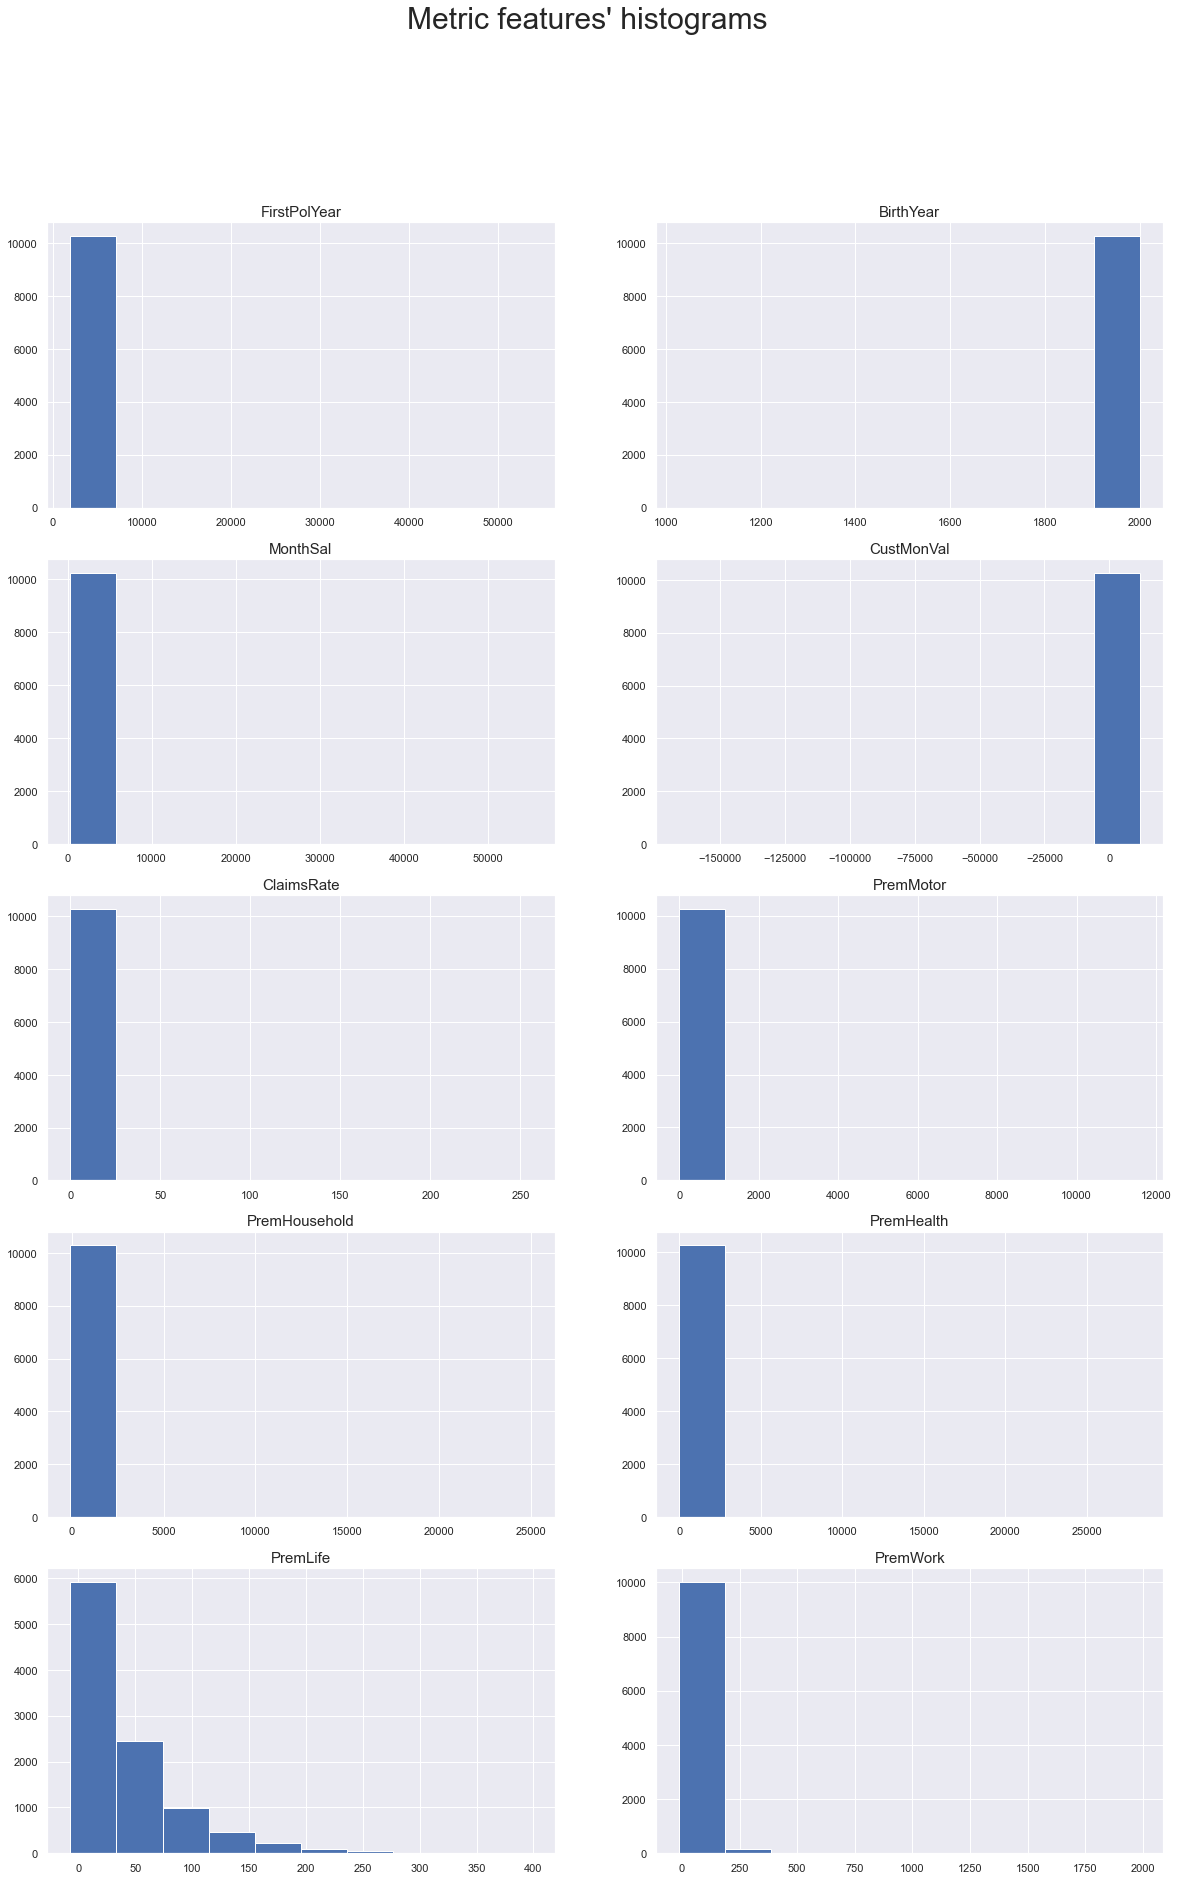

In [768]:
# Metric Variables' Histograms 
sns.set()

# Create individual axes 
fig, axes = plt.subplots(ceil(len(df_metric_features.columns[1:])/2), 2, figsize=(20, 30))
plt.subplots_adjust(hspace = 0.18)

# Plot data
for ax, feat in zip(axes.flatten(), df_metric_features.columns[1:]):
    ax.hist(df_metric_features[feat])
    ax.set_title(feat, fontsize=15)
    
# Title
plt.suptitle("Metric features' histograms", fontsize=30)
  
plt.show()

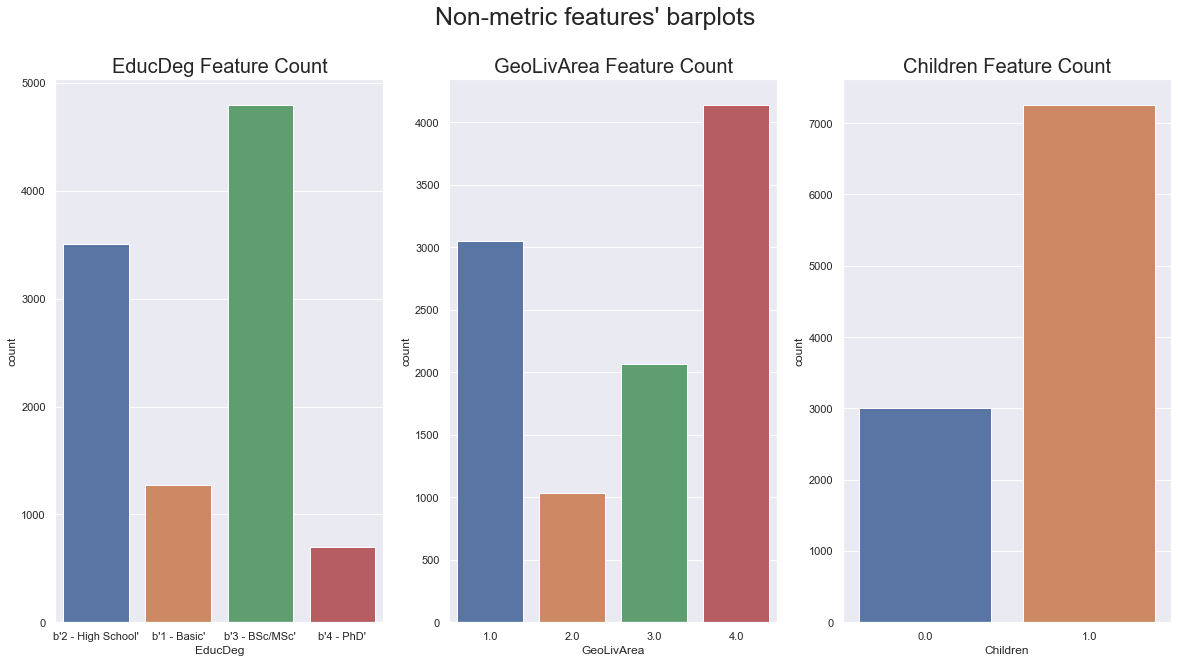

In [769]:
# Non Metric Variables' barplots
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed.
# OSOURCE, TCODE, STATE, ZIP, MSA, ADI and DMA have too many classes, it is not possible to visualizate it
fig, axes = plt.subplots(ceil(len(df_non_metric_features.columns)/3), 3, figsize=(20, 10))
plt.subplots_adjust(hspace = 0.18)

# Plot data
for ax, feat in zip(axes.flatten(), df_non_metric_features.columns):
    ax.set_title(feat + ' Feature Count', fontsize=20)
    sns.countplot(x=df_non_metric_features[feat], ax=ax)
    
    
# Title
plt.suptitle("Non-metric features' barplots", fontsize=25)

plt.show()

In [770]:
# Metric Features Correlation Matrix
def color_picker(val):
    if val < -0.7:
        color = 'background-color: red'
    elif val > 0.7:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Checking correlations 
correlations = data[metric_features].corr()
correlations.style.applymap(color_picker)

## 4) Data Preprocessing

### <span style="color:blue">**4.1.1) Handling Coherence Issues In Numerical Variables**</span>

We will go through each variable, one by one, and fix any issues we might find.

In [771]:
#Checking the statistical description of our variables
data.describe()

CustID  FirstPolYear     BirthYear      MonthSal    GeoLivArea  \
count  10293.000000  10263.000000  10276.000000  10257.000000  10292.000000   
mean    5147.504712   1991.064893   1968.006909   2506.618699      2.709483   
std     2972.180611    511.342617     19.710742   1157.518390      1.266284   
min        1.000000   1974.000000   1028.000000    333.000000      1.000000   
25%     2574.000000   1980.000000   1953.000000   1706.000000      1.000000   
50%     5147.000000   1986.000000   1968.000000   2502.000000      3.000000   
75%     7720.000000   1992.000000   1983.000000   3290.000000      4.000000   
max    10296.000000  53784.000000   2001.000000  55215.000000      4.000000   

           Children     CustMonVal    ClaimsRate    PremMotor  PremHousehold  \
count  10272.000000   10293.000000  10293.000000  10259.00000   10293.000000   
mean       0.706776     177.929963      0.742728    300.50155     210.419863   
std        0.455263    1946.091554      2.917385    211.93774     352.635041   
min        0.000000 -165680.420000      0.000000     -4.11000     -75.000000   
25%        0.000000      -9.440000      0.390000    190.59000      49.450000   
50%        1.000000     187.030000      0.720000    298.61000     132.800000   
75%        1.000000     399.860000      0.980000    408.30000     290.050000   
max        1.000000   11875.890000    256.200000  11604.42000   25048.800000   

         PremHealth      PremLife      PremWork  
count  10250.000000  10189.000000  10207.000000  
mean     171.553183     41.848724     41.283712  
std      296.444399     47.484264     51.519022  
min       -2.110000     -7.000000    -12.000000  
25%      111.800000      9.890000     10.670000  
50%      162.810000     25.560000     25.670000  
75%      219.040000     57.790000     56.790000  
max    28272.000000    398.300000   1988.700000

Out of these, we will skip over any categorical or binary variables such as: 'GeoLivArea' (categorical) and 'Children' (binary). 

**Variable FirstPolYear**

In [772]:
data['FirstPolYear'].describe()

count    10263.000000
mean      1991.064893
std        511.342617
min       1974.000000
25%       1980.000000
50%       1986.000000
75%       1992.000000
max      53784.000000
Name: FirstPolYear, dtype: float64

The first thing we noticed is the max value of this variable: 53784. This cannot be an accepted value because we are working with a dataset of values up to the year 2016.  

Because of this, we decided to remove any values above the year 2016

In [773]:
#Create a new column with value 1 for any observation above 2016, and 0 for all others
data['Coherence_FirstPolYear'] = data['FirstPolYear'].apply(lambda x: 1 if x > 2016 else 0)

In [774]:
#remove the observations with value 1 in the newly created column
data = data[data['Coherence_FirstPolYear'] == 0]

In [775]:
data.shape

(10292, 15)

After this coherence check, we have one less observation.

In [776]:
#delete column after it is no longer necessary
del data['Coherence_FirstPolYear']

**Variable BirthYear**

In [777]:
data['BirthYear'].describe()

count    10275.000000
mean      1968.008856
std         19.710712
min       1028.000000
25%       1953.000000
50%       1968.000000
75%       1983.000000
max       2001.000000
Name: BirthYear, dtype: float64

In this variable we have an acceptable max value, however, the min value (1028) is not. As such, we decided to have a maximum age of 120 years old, which is the age of the oldest person alive on Earth, and remove any other values above that threshold. 

In [778]:
#Creating new column with value 1 for any observation above 120 years old, and 0 for all others
data['Coherence_BirthYear'] = data['BirthYear'].apply(lambda x: 1 if (x>2016 or x<1896) else 0)

In [779]:
#remove the observations with value 1 in the newly created column
data = data[data['Coherence_BirthYear'] == 0]

In [780]:
data.shape

(10291, 15)

After this coherence check, we have one less observation.

One other check we want to do is if the Customer's 'FirstPolYear' is after or the same as it's 'BirthYear'. We want to do this because a customer cannot be a customer before they are born

In [781]:
#Number of customers that became customers before the year they were born
data[(data['FirstPolYear'] - data['BirthYear']) < 0].shape[0]

1997

There are too many observations. This might be because of human error when inserting the data into the database, or because the customers may have lied when asked about the year they were born. In any occasion, the high amount of data makes us question the validity of the remaining data, and therefore, instead of removing the rows, it makes more sense to remove the column 'BirthYear'.

In [782]:
#removing the column BirthYear
del data['BirthYear']

In [783]:
#delete column after it is no longer necessary
del data['Coherence_BirthYear']

**Variable MonthSal**

In [784]:
data['MonthSal'].describe()

count    10255.000000
mean      2506.512921
std       1157.602441
min        333.000000
25%       1706.000000
50%       2501.000000
75%       3290.500000
max      55215.000000
Name: MonthSal, dtype: float64

Although the range of values in this variable is wide (from 333 to 55215), it isn't incoherent and we might have customers making as low as 333 euros per month and others as high as 55125 euros per month. However, we will analyse if any of these are outliers later on.

Another coherence check we can do is removing any customers who spend more than their annual income on insurances. Although a customer can spend more than what they earn, it is very unlikely for someone to spend all of their income and then some more on insurances.

In [785]:
data['Coherence_MonthSal'] = data.apply(lambda x:1 if (sum([x['PremMotor'], x['PremHousehold'], x['PremHealth'], x['PremLife'], x['PremWork']])>(x['MonthSal'] * 12)) else 0, axis=1)


In [786]:
data['Coherence_MonthSal'].value_counts()

0    10290
1        1
Name: Coherence_MonthSal, dtype: int64

We get one customer that spends more than their annual income on insurances. We decided to remove that observation.

In [787]:
#remove the observations with value 1 in the newly created column
data = data[data['Coherence_MonthSal'] == 0]

In [788]:
#delete column after it is no longer necessary
del data['Coherence_MonthSal']

**Variable CustMonVal**

In [789]:
data['CustMonVal'].describe()

count     10290.000000
mean        177.855606
std        1946.364703
min     -165680.420000
25%          -9.440000
50%         186.870000
75%         399.832500
max       11875.890000
Name: CustMonVal, dtype: float64

Straight away we notice the discrepancy between the min and max values of this variable. The absolute min value (loss for the insurance company) is over 10 times larger than the absolute max value (gain for the insurance company).  

This can be an error while inserting the data in the database but we have no way of confirming it is, so we will not be removing any values from this variable. Later on, we will analyse it to look for any outliers.

**Variable ClaimsRate**

In [790]:
data['ClaimsRate'].describe()

count    10290.000000
mean         0.742740
std          2.917807
min          0.000000
25%          0.390000
50%          0.720000
75%          0.980000
max        256.200000
Name: ClaimsRate, dtype: float64

Regarding this variable, what stood out to us is the big difference between Q3 and the max value, which indicates that there might be some outliers present in the observations. We will analyse these later on.

**Other Variables**  

Regarding the other variables in the dataset, there are no other coherence checks to be done so we will move on to analysing the variables for any outliers.

### <span style="color:blue">**4.1.2) Data Visualization after Coherence Check**</span>

In [791]:
#updating metric feature dataframe with new values coherence check
df_metric_features = data.loc[:, ~data.columns.isin(non_metric_features)].copy()

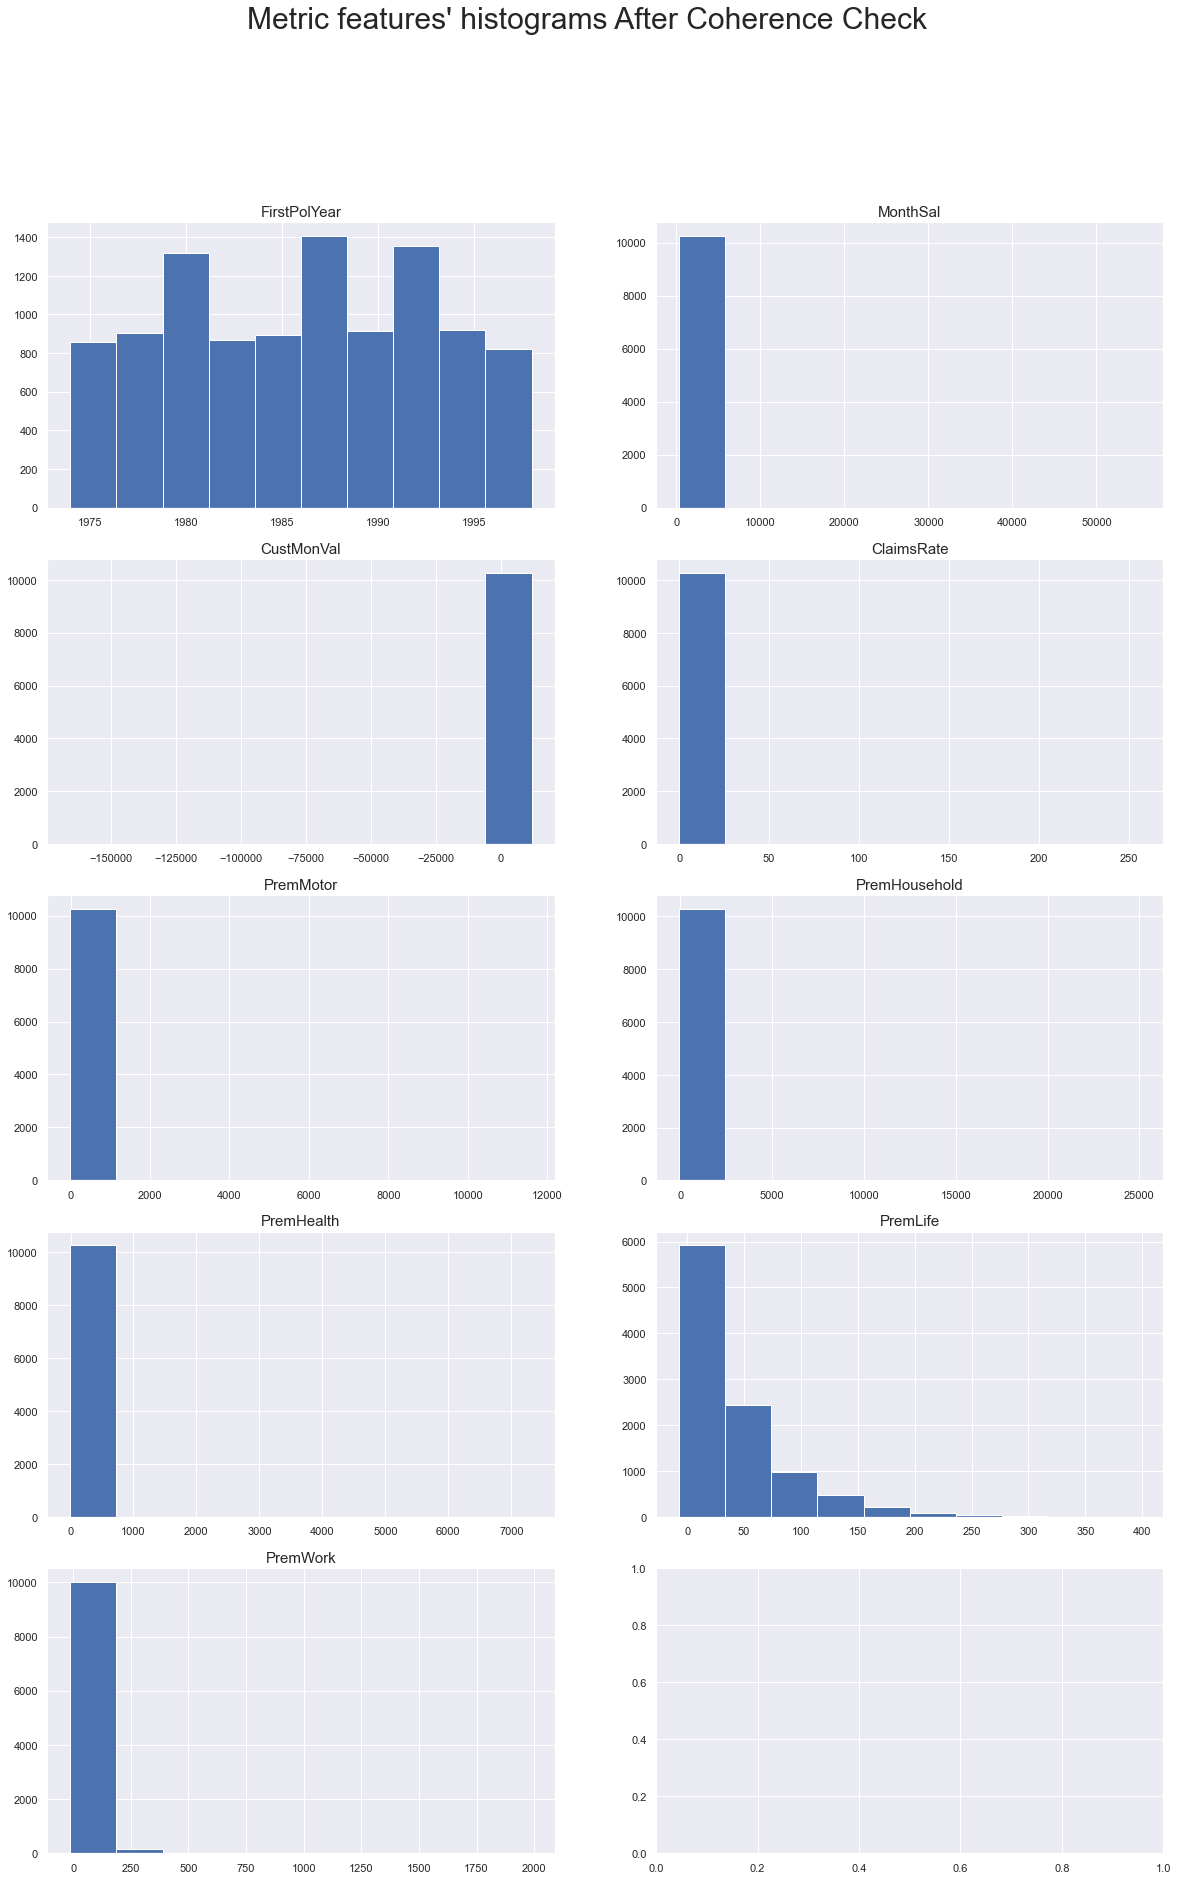

In [792]:
# Metric Variables' Histograms 
sns.set()

# Create individual axes 
fig, axes = plt.subplots(ceil(len(df_metric_features.columns[1:])/2), 2, figsize=(20, 30))
plt.subplots_adjust(hspace = 0.18)

# Plot data
for ax, feat in zip(axes.flatten(), df_metric_features.columns[1:]):
    ax.hist(df_metric_features[feat])
    ax.set_title(feat, fontsize=15)
    
# Title
plt.suptitle("Metric features' histograms After Coherence Check", fontsize=30)
  
plt.show()

### <span style="color:blue">**4.1.3) Coherence Check on Categorical Variables**</span>

There is no need to perform a coherence check on our categorical variables because of the results we observed when plotting the barplot of each one.

# Missing Values

In [793]:
data.isna().sum()

CustID             0
FirstPolYear      30
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [794]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,
                                 'percent_missing': percent_missing})

In [795]:
missing_value_df

column_name  percent_missing
CustID                CustID         0.000000
FirstPolYear    FirstPolYear         0.291545
EducDeg              EducDeg         0.165209
MonthSal            MonthSal         0.349854
GeoLivArea        GeoLivArea         0.009718
Children            Children         0.204082
CustMonVal        CustMonVal         0.000000
ClaimsRate        ClaimsRate         0.000000
PremMotor          PremMotor         0.330418
PremHousehold  PremHousehold         0.000000
PremHealth        PremHealth         0.417881
PremLife            PremLife         1.010690
PremWork            PremWork         0.835763

We will use different methods to fill the missing values, depending on the type of variable and on the variable itself.
There are no features that have more than 40% missing values, therefore, for now, we will not remove any features.

# Function to update the Metric and Non-Metric Variables

In [796]:
data['GeoLivArea'] = data['GeoLivArea'].astype(object)
data['Children'] = data['Children'].astype(object)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10290 entries, 0 to 10295
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10290 non-null  float64
 1   FirstPolYear   10260 non-null  float64
 2   EducDeg        10273 non-null  object 
 3   MonthSal       10254 non-null  float64
 4   GeoLivArea     10289 non-null  float64
 5   Children       10269 non-null  float64
 6   CustMonVal     10290 non-null  float64
 7   ClaimsRate     10290 non-null  float64
 8   PremMotor      10256 non-null  float64
 9   PremHousehold  10290 non-null  float64
 10  PremHealth     10247 non-null  float64
 11  PremLife       10186 non-null  float64
 12  PremWork       10204 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.1+ MB


In [538]:
def update_metric_feat(df):
    metric_features = df.select_dtypes(include=np.number).columns
    non_metric_features = df.select_dtypes(exclude=np.number).columns
    return metric_features.tolist(),non_metric_features.tolist()

In [539]:
metric_features = update_metric_feat(data)[0]
non_metric_features = update_metric_feat(data)[1]

# Outliers

In [540]:
data_med = data.copy()

for column in metric_features:
    data_med[column] = data_med[column].fillna(data_med[column].median())
for column in non_metric_features:
    data_med[column] = data_med[column].fillna(data_med[column].mode()[0])

In [541]:
data_med.isna().sum()

CustID             0
FirstPolYear       0
EducDeg            0
MonthSal           0
GeoLivArea         0
Children           0
CustMonVal         0
ClaimsRate         0
PremMotor          0
PremHousehold      0
PremHealth         0
PremLife           0
PremWork           0
Client_Years       0
Yearly_Salary      0
Total_Premiums     0
Profit             0
Effort_Rate        0
Motor_Ratio        0
Household_Ratio    0
Health_Ratio       0
Life_Ratio         0
Work_Ratio         0
Cancelled          0
dtype: int64

In [542]:
# Dealing with outliers on the metric features:
from sklearn.neighbors import LocalOutlierFactor

# Note that: we are only finding out outliers among the metric features:
# identifying outliers in our dataset
lof = LocalOutlierFactor(n_jobs=-1)
yhat = lof.fit_predict(data_med[metric_features].values)

# select all rows that are not outliers
mask = yhat != -1

# Data Frame that contains the observations that are outliers so that after the clustering we can assign them to the clusters:
outliers_df = data_med.iloc[~mask, :].copy()

# variable that contains the original number of observations:
original_observation = data.shape[0]
data = data.drop(index=data_med.iloc[~mask, :].index)


print('% eliminated =',(1-len(data)/original_observation)*100,'%')

% eliminated = 0.9815354713313851 %


In [543]:
original_observation

10290

# Missing Values

In [544]:
data.isna().sum()

CustID               0
FirstPolYear        30
EducDeg             17
MonthSal            35
GeoLivArea           1
Children            21
CustMonVal           0
ClaimsRate           0
PremMotor           34
PremHousehold        0
PremHealth          43
PremLife           104
PremWork            86
Client_Years        30
Yearly_Salary       35
Total_Premiums     225
Profit               0
Effort_Rate        254
Motor_Ratio          0
Household_Ratio      0
Health_Ratio         0
Life_Ratio           0
Work_Ratio           0
Cancelled            0
dtype: int64

**Numerical Variables (Except Premiums)**  
To start off, we will fill the missing values of all the numerical variables except the premium ones. To fill these missing values we decided to use the KNNImputer algorithm.

In [545]:
#data.set_index('CustID', inplace=True)

In [546]:
#Define metric, non-metric features and premium features.
metric_features = update_metric_feat(data)[0]
non_metric_features = update_metric_feat(data)[1]
premiums = ['PremMotor', 'PremHousehold','PremHealth', 'PremLife','PremWork','Total_Premiums']
metric_features = [x for x in metric_features if x not in premiums]
#drop categorical columns
df_metric_features = data.drop(columns = non_metric_features)
#drop premium columns
df_metric_features = df_metric_features.drop(columns = premiums)

df_metric_features_names = data.columns.drop(non_metric_features + premiums).tolist()

In [547]:
imputer = KNNImputer(n_neighbors=1).fit(df_metric_features)

In [548]:
filled_metric_features = imputer.transform(df_metric_features)

In [549]:
#convert to dataframe
filled_metric_features = pd.DataFrame(filled_metric_features)

In [550]:
#rename columns of filled_metric_features from index to real name
for i in range(len(df_metric_features_names)):
    filled_metric_features.rename(columns = {i:df_metric_features_names[i]}, inplace = True)

**Categorical Variables**  
Next, we will fill the missing values for the categorical variables using the KNN Imputer algorithm as well, however, we first have to cast the type of some variables into something we can work with.  

Looking at the categorical variables, we have to do this for the variable 'EducDeg'.

In [551]:
#cast the column from bytes type to string type
data['EducDeg'] = data['EducDeg'].str.decode("utf-8")

In [552]:
#transform the variable category from string to numerical representation
data['EducDeg'] = data['EducDeg'].str[:1].astype(object)

In [553]:
#drop numerical columns
non_metric_features.append('CustID')

df_non_metric_features = data[non_metric_features]

df_non_metric_features_names = non_metric_features

In [554]:
#we used number of neighbors = 1 because we didnt want to have any decimal values
imputer = KNNImputer(n_neighbors=1).fit(df_non_metric_features)

In [555]:
filled_non_metric_features = imputer.transform(df_non_metric_features)

In [556]:
#convert to dataframe
filled_non_metric_features = pd.DataFrame(filled_non_metric_features)

In [557]:
#rename columns of filled_non_metric_features from index to real name
for i in range(len(df_non_metric_features_names)):
    filled_non_metric_features.rename(columns = {i:df_non_metric_features_names[i]}, inplace = True)

**Premium Variables**

We considered missing values to be cases where the customer did not spend anything on that specific insurance and, as such, we replaced it with 0.

In [558]:
df_premiums = data[['CustID'] + premiums].copy()

In [559]:
df_premiums.fillna(0, inplace = True)

In [560]:
filled_non_metric_features

EducDeg  GeoLivArea  Children  Profit  Cancelled   CustID
0          2.0         1.0       1.0     1.0        0.0      1.0
1          2.0         4.0       1.0     0.0        0.0      2.0
2          1.0         3.0       0.0     1.0        0.0      3.0
3          3.0         4.0       1.0     1.0        0.0      4.0
4          3.0         4.0       1.0     1.0        0.0      5.0
...        ...         ...       ...     ...        ...      ...
10184      1.0         3.0       1.0     1.0        0.0  10291.0
10185      4.0         2.0       0.0     1.0        0.0  10292.0
10186      3.0         1.0       1.0     1.0        0.0  10294.0
10187      1.0         2.0       1.0     1.0        0.0  10295.0
10188      4.0         1.0       1.0     1.0        0.0  10296.0

[10189 rows x 6 columns]

In [561]:
data = filled_metric_features.merge(filled_non_metric_features, on='CustID')

In [562]:
data['EducDeg'] = data['EducDeg'].astype(object)
data['GeoLivArea'] = data['GeoLivArea'].astype(object)
data['Children'] = data['Children'].astype(object)

In [563]:
data = data.merge(df_premiums, on='CustID')

In [564]:
data

CustID  FirstPolYear  MonthSal  CustMonVal  ClaimsRate  Client_Years  \
0          1.0        1985.0    2177.0      380.97        0.39          31.0   
1          2.0        1981.0     677.0     -131.13        1.12          35.0   
2          3.0        1991.0    2277.0      504.67        0.28          25.0   
3          4.0        1990.0    1099.0      -16.99        0.99          26.0   
4          5.0        1986.0    1763.0       35.23        0.90          30.0   
...        ...           ...       ...         ...         ...           ...   
10184  10291.0        1994.0     626.0      176.26        0.85          22.0   
10185  10292.0        1984.0    3188.0       -0.11        0.96          32.0   
10186  10294.0        1994.0    2918.0      524.10        0.21          22.0   
10187  10295.0        1981.0    1971.0      250.05        0.65          35.0   
10188  10296.0        1990.0    2815.0      463.75        0.27          26.0   

       Yearly_Salary  Effort_Rate  Motor_Ratio  Household_Ratio  ...  \
0            26124.0     0.025477     0.564712         0.119373  ...   
1             8124.0     0.112132     0.085031         0.456881  ...   
2            27324.0     0.027104     0.278355         0.303133  ...   
3            13188.0     0.045547     0.303789         0.072168  ...   
4            21156.0     0.029743     0.538141         0.075965  ...   
...              ...          ...          ...              ...  ...   
10184         7512.0     0.173429     0.005289         0.674317  ...   
10185        38256.0     0.016770     0.613723         0.077078  ...   
10186        35016.0     0.019883     0.579728         0.190739  ...   
10187        23652.0     0.032763     0.243367         0.272480  ...   
10188        33780.0     0.019821     0.618436         0.141063  ...   

       GeoLivArea  Children  Profit Cancelled PremMotor PremHousehold  \
0             1.0       1.0     1.0       0.0    375.85         79.45   
1             4.0       1.0     0.0       0.0     77.46        416.20   
2             3.0       0.0     1.0       0.0    206.15        224.50   
3             4.0       1.0     1.0       0.0    182.48         43.35   
4             4.0       1.0     1.0       0.0    338.62         47.80   
...           ...       ...     ...       ...       ...           ...   
10184         3.0       1.0     1.0       0.0      6.89        878.50   
10185         2.0       0.0     1.0       0.0    393.74         49.45   
10186         1.0       1.0     1.0       0.0    403.63        132.80   
10187         2.0       1.0     1.0       0.0    188.59        211.15   
10188         1.0       1.0     1.0       0.0    414.08         94.45   

      PremHealth PremLife  PremWork  Total_Premiums  
0         146.36    47.01     16.89          665.56  
1         116.69   194.48    106.13          910.96  
2         124.58    86.35     99.02          740.60  
3         311.17    35.34     28.34          600.68  
4         182.59    18.78     41.45          629.24  
...          ...      ...       ...             ...  
10184     103.13   113.02    201.26         1302.80  
10185     173.81     9.78     14.78          641.56  
10186     142.25    12.67      4.89          696.24  
10187     198.37    63.90    112.91          774.92  
10188     141.25     6.89     12.89          669.56  

[10189 rows x 24 columns]

In [565]:
#Checking the count of missing values to be 0
data.isna().sum()

CustID             0
FirstPolYear       0
MonthSal           0
CustMonVal         0
ClaimsRate         0
Client_Years       0
Yearly_Salary      0
Effort_Rate        0
Motor_Ratio        0
Household_Ratio    0
Health_Ratio       0
Life_Ratio         0
Work_Ratio         0
EducDeg            0
GeoLivArea         0
Children           0
Profit             0
Cancelled          0
PremMotor          0
PremHousehold      0
PremHealth         0
PremLife           0
PremWork           0
Total_Premiums     0
dtype: int64

In [566]:
#Set the Customer Id as index
data.set_index('CustID', inplace=True)

In [567]:
df_after_imputation = data.copy()

# Feature Engineering

In [533]:
#list = ['PremMotor','PremHousehold','PremHealth','PremLife','PremWork']

In [534]:
data['Client_Years']=2016-data['FirstPolYear']
data['Yearly_Salary']=12*data['MonthSal']
data['Total_Premiums']=data['PremMotor'] + data['PremHousehold'] + data['PremHealth'] + data['PremLife'] + data['PremWork']
data['Profit']=0
#data['Profit']=data['Profit'].where(data['ClaimsRate']<1,0)
data['Profit']=data['Profit'].where(data['ClaimsRate']>1,1)
# DELETE ROWS WHERE TOTAL_PREMIUMS EQUALS 0
data = data[data['Total_Premiums'] != 0]
data['Effort_Rate']=data['Total_Premiums']/data['Yearly_Salary']
data['Motor_Ratio']=data['PremMotor']/data['Total_Premiums']
data['Motor_Ratio']=data['Motor_Ratio'].where(data['Motor_Ratio']>0, 0)
data['Household_Ratio']=data['PremHousehold']/data['Total_Premiums']
data['Household_Ratio']=data['Household_Ratio'].where(data['Household_Ratio']>0, 0)
data['Health_Ratio']=data['PremHealth']/data['Total_Premiums']
data['Health_Ratio']=data['Health_Ratio'].where(data['Health_Ratio']>0, 0)
data['Life_Ratio']=data['PremLife']/data['Total_Premiums']
data['Life_Ratio']=data['Life_Ratio'].where(data['Life_Ratio']>0, 0)
data['Work_Ratio']=data['PremWork']/data['Total_Premiums']
data['Work_Ratio']=data['Work_Ratio'].where(data['Work_Ratio']>0, 0)
#data['Negative']=data.iloc[:,7:13][data<0].sum(1)
#data['Negative']=data.iloc[:,8:13][data<0].sum(1)
data["Cancelled"] = np.where(data.eval("PremMotor < 0 or PremHousehold < 0 or PremHealth < 0 or PremLife < 0 or PremWork < 0"), "1", "0")

##data['PayedAdvance_Ratio']=abs(data['negative'])/data['Total_Premiums']
#data['Cancelled']=np.where(data['Negative']<0, 1, 0)
#data = data.drop(columns=['MonthSal','FirstPolYear'])

#data = data.drop(columns=['Negative'])


In [535]:
data

CustID  FirstPolYear             EducDeg  MonthSal  GeoLivArea  \
0          1.0        1985.0  b'2 - High School'    2177.0         1.0   
1          2.0        1981.0  b'2 - High School'     677.0         4.0   
2          3.0        1991.0        b'1 - Basic'    2277.0         3.0   
3          4.0        1990.0      b'3 - BSc/MSc'    1099.0         4.0   
4          5.0        1986.0      b'3 - BSc/MSc'    1763.0         4.0   
...        ...           ...                 ...       ...         ...   
10291  10292.0        1984.0          b'4 - PhD'    3188.0         2.0   
10292  10293.0        1977.0        b'1 - Basic'    2431.0         3.0   
10293  10294.0        1994.0      b'3 - BSc/MSc'    2918.0         1.0   
10294  10295.0        1981.0        b'1 - Basic'    1971.0         2.0   
10295  10296.0        1990.0          b'4 - PhD'    2815.0         1.0   

       Children  CustMonVal  ClaimsRate  PremMotor  PremHousehold  ...  \
0           1.0      380.97        0.39     375.85          79.45  ...   
1           1.0     -131.13        1.12      77.46         416.20  ...   
2           0.0      504.67        0.28     206.15         224.50  ...   
3           1.0      -16.99        0.99     182.48          43.35  ...   
4           1.0       35.23        0.90     338.62          47.80  ...   
...         ...         ...         ...        ...            ...  ...   
10291       0.0       -0.11        0.96     393.74          49.45  ...   
10292       0.0     1405.60        0.00     133.58        1035.75  ...   
10293       1.0      524.10        0.21     403.63         132.80  ...   
10294       1.0      250.05        0.65     188.59         211.15  ...   
10295       1.0      463.75        0.27     414.08          94.45  ...   

       Yearly_Salary  Total_Premiums  Profit  Effort_Rate  Motor_Ratio  \
0            26124.0          665.56       1     0.025477     0.564712   
1             8124.0          910.96       0     0.112132     0.085031   
2            27324.0          740.60       1     0.027104     0.278355   
3            13188.0          600.68       1     0.045547     0.303789   
4            21156.0          629.24       1     0.029743     0.538141   
...              ...             ...     ...          ...          ...   
10291        38256.0          641.56       1     0.016770     0.613723   
10292        29172.0         1430.60       1     0.049040     0.093373   
10293        35016.0          696.24       1     0.019883     0.579728   
10294        23652.0          774.92       1     0.032763     0.243367   
10295        33780.0          669.56       1     0.019821     0.618436   

       Household_Ratio  Health_Ratio  Life_Ratio  Work_Ratio  Cancelled  
0             0.119373      0.219905    0.070632    0.025377          0  
1             0.456881      0.128096    0.213489    0.116503          0  
2             0.303133      0.168215    0.116595    0.133702          0  
3             0.072168      0.518030    0.058833    0.047180          0  
4             0.075965      0.290175    0.029846    0.065873          0  
...                ...           ...         ...         ...        ...  
10291         0.077078      0.270918    0.015244    0.023038          0  
10292         0.723997      0.100133    0.009010    0.073487          0  
10293         0.190739      0.204312    0.018198    0.007023          0  
10294         0.272480      0.255988    0.082460    0.145705          0  
10295         0.141063      0.210959    0.010290    0.019251          0  

[10290 rows x 24 columns]

In [536]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10290 entries, 0 to 10295
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustID           10290 non-null  float64
 1   FirstPolYear     10260 non-null  float64
 2   EducDeg          10273 non-null  object 
 3   MonthSal         10254 non-null  float64
 4   GeoLivArea       10289 non-null  float64
 5   Children         10269 non-null  float64
 6   CustMonVal       10290 non-null  float64
 7   ClaimsRate       10290 non-null  float64
 8   PremMotor        10256 non-null  float64
 9   PremHousehold    10290 non-null  float64
 10  PremHealth       10247 non-null  float64
 11  PremLife         10186 non-null  float64
 12  PremWork         10204 non-null  float64
 13  Client_Years     10260 non-null  float64
 14  Yearly_Salary    10254 non-null  float64
 15  Total_Premiums   10065 non-null  float64
 16  Profit           10290 non-null  int64  
 17  Effort_Rate 

In [ ]:
data['EducDeg'] = data['EducDeg'].astype(object)
data['GeoLivArea'] = data['GeoLivArea'].astype(object)
data['Children'] = data['Children'].astype(object)
data['Profit'] = data['Profit'].astype(object)
data['Cancelled'] = data['Cancelled'].astype(object)

# Feature Selection

In [568]:
# Dealing with features with low variance

In [569]:
metric_features = update_metric_feat(data)[0]
non_metric_features = update_metric_feat(data)[1]

In [570]:
# Scalling our data:
scaler = MinMaxScaler()
# transform data:
scaled = scaler.fit_transform(data[metric_features])
scaled = pd.DataFrame(scaled,columns = metric_features)

In [571]:
data[metric_features].var()

FirstPolYear       4.362710e+01
MonthSal           9.670026e+05
CustMonVal         6.262274e+04
ClaimsRate         1.024079e-01
Client_Years       4.362710e+01
Yearly_Salary      1.392484e+08
Effort_Rate        8.885682e-04
Motor_Ratio        6.412512e-02
Household_Ratio    3.527041e-02
Health_Ratio       1.270351e-02
Life_Ratio         3.266813e-03
Work_Ratio         3.176089e-03
PremMotor          1.917026e+04
PremHousehold      5.022814e+04
PremHealth         5.604492e+03
PremLife           2.247023e+03
PremWork           2.188992e+03
Total_Premiums     4.476887e+04
dtype: float64

We will not remove any of the low variance features. The nly one that stands out (really low variance) is the feature Yearly_Salary, but we will not remove because it might be relevant combined with other features for the clustering part.

In [572]:
#Correlations

In [573]:
#High correlated features

In [574]:
original_features = data.columns.values.tolist()

In [575]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

In [576]:
cor_spearman = data[metric_features].corr(method ='spearman')
cor_spearman

FirstPolYear  MonthSal  CustMonVal  ClaimsRate  Client_Years  \
FirstPolYear         1.000000  0.022747    0.013304   -0.011343     -1.000000   
MonthSal             0.022747  1.000000   -0.026165    0.001302     -0.022747   
CustMonVal           0.013304 -0.026165    1.000000   -0.971577     -0.013304   
ClaimsRate          -0.011343  0.001302   -0.971577    1.000000      0.011343   
Client_Years        -1.000000 -0.022747   -0.013304    0.011343      1.000000   
Yearly_Salary        0.022747  1.000000   -0.026165    0.001302     -0.022747   
Effort_Rate         -0.015112 -0.906511    0.097604   -0.019314      0.015112   
Motor_Ratio         -0.017562  0.198454   -0.047749   -0.060815      0.017562   
Household_Ratio      0.010708 -0.153565    0.187224   -0.037555     -0.010708   
Health_Ratio         0.008013  0.089088   -0.144802    0.133313     -0.008013   
Life_Ratio           0.010520 -0.114181   -0.024477    0.084111     -0.010520   
Work_Ratio           0.013690 -0.128856   -0.012031    0.073191     -0.013690   
PremMotor           -0.016764  0.204083   -0.002083   -0.095994      0.016764   
PremHousehold        0.010890 -0.156438    0.192478   -0.041423     -0.010890   
PremHealth           0.012712  0.022005   -0.073730    0.119595     -0.012712   
PremLife             0.012184 -0.143604    0.006358    0.071995     -0.012184   
PremWork             0.013325 -0.156277    0.020139    0.059439     -0.013325   
Total_Premiums       0.009606 -0.154121    0.190751   -0.039230     -0.009606   

                 Yearly_Salary  Effort_Rate  Motor_Ratio  Household_Ratio  \
FirstPolYear          0.022747    -0.015112    -0.017562         0.010708   
MonthSal              1.000000    -0.906511     0.198454        -0.153565   
CustMonVal           -0.026165     0.097604    -0.047749         0.187224   
ClaimsRate            0.001302    -0.019314    -0.060815        -0.037555   
Client_Years         -0.022747     0.015112     0.017562        -0.010708   
Yearly_Salary         1.000000    -0.906511     0.198454        -0.153565   
Effort_Rate          -0.906511     1.000000    -0.455721         0.492932   
Motor_Ratio           0.198454    -0.455721     1.000000        -0.695999   
Household_Ratio      -0.153565     0.492932    -0.695999         1.000000   
Health_Ratio          0.089088    -0.118058    -0.185669        -0.072199   
Life_Ratio           -0.114181     0.217701    -0.506203         0.373914   
Work_Ratio           -0.128856     0.226203    -0.492497         0.362173   
PremMotor             0.204083    -0.414256     0.919005        -0.644991   
PremHousehold        -0.156438     0.502031    -0.743589         0.977461   
PremHealth            0.022005     0.080084    -0.523427         0.251655   
PremLife             -0.143604     0.293707    -0.623303         0.478009   
PremWork             -0.156277     0.302140    -0.614182         0.466581   
Total_Premiums       -0.154121     0.495587    -0.670167         0.989335   

                 Health_Ratio  Life_Ratio  Work_Ratio  PremMotor  \
FirstPolYear         0.008013    0.010520    0.013690  -0.016764   
MonthSal             0.089088   -0.114181   -0.128856   0.204083   
CustMonVal          -0.144802   -0.024477   -0.012031  -0.002083   
ClaimsRate           0.133313    0.084111    0.073191  -0.095994   
Client_Years        -0.008013   -0.010520   -0.013690   0.016764   
Yearly_Salary        0.089088   -0.114181   -0.128856   0.204083   
Effort_Rate         -0.118058    0.217701    0.226203  -0.414256   
Motor_Ratio         -0.185669   -0.506203   -0.492497   0.919005   
Household_Ratio     -0.072199    0.373914    0.362173  -0.644991   
Health_Ratio         1.000000    0.216001    0.204678  -0.384161   
Life_Ratio           0.216001    1.000000    0.445042  -0.617105   
Work_Ratio           0.204678    0.445042    1.000000  -0.597167   
PremMotor           -0.384161   -0.617105   -0.597167   1.000000   
PremHousehold       -0.113022    0.342347    0.332508  -0.658

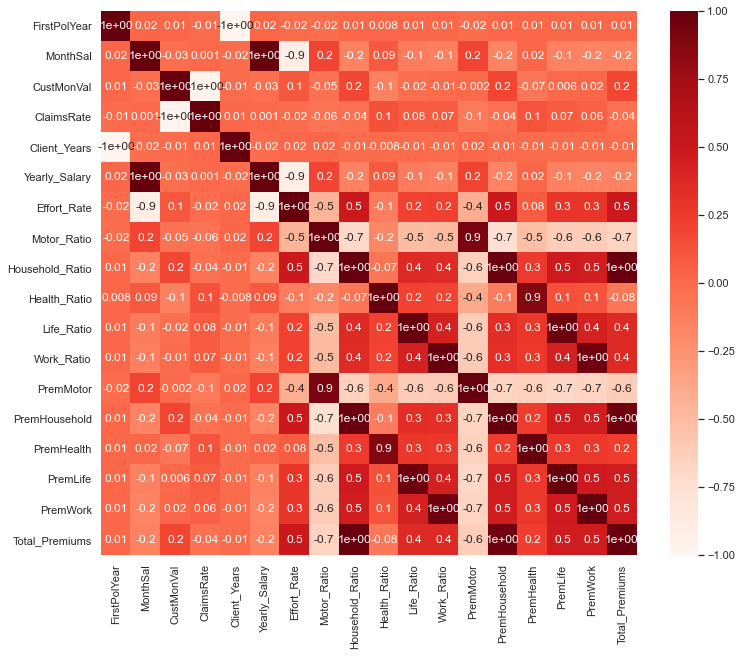

In [577]:
cor_heatmap(cor_spearman)

In [578]:
# # Create correlation matrix
# corr_matrix = data.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find features with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# # Drop features 
# data.drop(to_drop, axis=1, inplace=True)

In [579]:
# features_after_corr = data.columns.values.tolist()

In [580]:
# list_difference = []
# for item in original_features:
#     if item not in features_after_corr:
#         list_difference.append(item)

# print('The features that were dropped because of their high correlation were',list_difference[0],', ',list_difference[1],' and ', list_difference[2])

In [581]:
#Low Correlated Features

In [582]:
# metric_features = update_metric_feat(data)[0]
# non_metric_features = update_metric_feat(data)[1]

In [583]:
# # using the percentile 90 of the correlations of the feature 
# # if 90 % of the correlation is bellow 0.05, the variable will be dropped
# corr = data.corr().abs()
# low_corr=[]
# for feature in metric_features:
#     if (corr[feature].quantile(0.90)<0.05):
#         low_corr.append(feature)
# data.drop(columns=low_corr, inplace=True)
# print('The following',len(low_corr),'variables were dropped due to their low correlation with the other variables:\n',low_corr)

In [584]:
df_backup1 = data.copy()

# Scaling

In [585]:
# metric_features = update_metric_feat(data)[0]
# non_metric_features = update_metric_feat(data)[1]

#df_scaled = data.copy()
# scaler = StandardScaler()
# scaled_feat = scaler.fit_transform(df_scaled[metric_features])
# scaled_feat

In [586]:
# df_scaled[metric_features] = scaled_feat
# df_scaled.head()

In [587]:
#data = df_scaled.copy()

In [588]:
# Kmeans for Feature Selection

In [589]:
# df_pca = data.copy()

# # Use PCA to reduce dimensionality of data
# pca = PCA()
# pca_feat = pca.fit_transform(df_pca[metric_features]) 

# var_explained = pca.explained_variance_ratio_.cumsum()

# pca.explained_variance_ratio_[:10].sum()

# var_explained = var_explained*100 #percentage

# # Covariance Matrix
# cov_matrix = df_pca[metric_features].cov()
# cov_matrix

In [590]:
# df_pca = pd.DataFrame(df_pca[metric_features].values @ pca.components_.T, 
#              index=df_pca.index,
#              columns=[f"PC{i}" for i in range(pca.n_components_)])

In [591]:
# pd.DataFrame(
#     {"Eigenvalue": pca.explained_variance_,
#      "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
#      "Proportion": pca.explained_variance_ratio_,
#      "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
#     index=range(1, pca.n_components_ + 1)
# ).head(57)
# #kaiser rule: keep 6
# #pearson rule: keep 5
# #final : keep 6

In [592]:
# # Defining the number of clusters:
# range_clusters = range(1, 11)
# inertia = []
# for n_clus in range_clusters:  # iterate over desired ncluster range
#     kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
#     kmclust.fit(df_pca.iloc[:,:6]) #df_pca.iloc[:,:45] is the dataframe that contains the first 45 principal components
#     inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution
    
# # The figure:
# plt.figure(figsize=(9,5))
# #This following step is to make sure that we plot the correct x axis´labels:
# plot_df=pd.DataFrame(columns=['x','y'])
# plot_df['x']=range(1, 11)
# plot_df['y']=inertia

# # The inertia plot:
# plt.plot('x', 'y',data = plot_df)
# plt.ylabel("Inertia: SSw")
# plt.xlabel("Number of clusters")
# plt.title("Inertia plot over clusters", size=15)
# plt.show()

# # By looking at the plot we conclude that the best number of clusters would be 3

In [593]:
# number_clusters = 3
# kmclust = KMeans(n_clusters=number_clusters, init='k-means++', n_init=15, random_state=0)
# km_labels = kmclust.fit_predict(df_pca.iloc[:,:6])

# # Data Frame with the original variables where we will store the clusters we obtained applying the kmeans on the Principal 
# # components
# df_concat = data.copy() 
# df_concat['labels']=km_labels
# df_concat

In [594]:
#Separating the cluster label variable from the independent numeric variables

In [595]:
# df = df_concat[metric_features]
# target = df_concat.iloc[:,-1]

In [596]:
#Random Forest for feature selection

In [597]:
# # Splitting the data into 30% test and 70% training (we are doing this step in order to check the accuracy score before and 
# # after removing the features)
# X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=0, stratify=target)

# # Create a random forest classifier
# clf = RandomForestClassifier(n_estimators=500, random_state=0, n_jobs=-1)

# # Training the classifier
# clf.fit(X_train, y_train)
    
# # Checking the attribute gini importance
# gini_importance = clf.feature_importances_
# zippy = pd.DataFrame(gini_importance, columns =['gini'])
# zippy['col'] = df.columns
# tidy = zippy.melt(id_vars='col').rename(columns=str.title)
# tidy.sort_values(['Value'], ascending = False, inplace = True)

# # Plotting
# plt.figure(figsize=(15,5))
# sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)
# plt.axvline(x=0.02, color='red', linestyle=(0,(5,5)))

In [598]:
# # We are going to select the features that have an importance of more than 0.006
# sfm = SelectFromModel(clf,threshold=0.02)

# sfm.fit(X_train, y_train)

# # which features are important:
# selected_feat= df.columns[(sfm.get_support())]
# print('The following ',len(selected_feat),'features were selected according to the random forest:')

# # get the name of the features selected:
# print(selected_feat)

# # Dropped features:
# print('\nThe following ',len(df.columns[~(sfm.get_support())]),'features should be dropped according to the random forest:')
# print(df.columns[~(sfm.get_support())])

# # Clusters prediction using all the features and checking its Accuracy score using the random forest
# y_pred = clf.predict(X_test)
# print('Score of the Random Forest using all features:',accuracy_score(y_test, y_pred))

In [599]:
# ExtraTrees for feature selection

In [600]:
# rtree_dr = ExtraTreesClassifier(n_estimators=500, random_state=0, n_jobs=-1)
# rtree_dr = rtree_dr.fit(X_train, y_train)

# # Checking the attribute gini importance
# gini_importance = rtree_dr.feature_importances_
# zippy = pd.DataFrame(gini_importance, columns =['gini'])
# zippy['col'] = df.columns
# tidy = zippy.melt(id_vars='col').rename(columns=str.title)
# tidy.sort_values(['Value'], ascending = False, inplace = True)

# # Plotting
# plt.figure(figsize=(15,5))
# sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)
# plt.axvline(x=0.02, color='red', linestyle=(0,(5,5)))

In [601]:
# model2 = SelectFromModel(rtree_dr,threshold=0.02)
# model2.fit(X_train, y_train)

# # which features are important:
# selected_feat2= df.columns[(model2.get_support())]
# print('The following ',len(selected_feat2),'features were selected according to the ExtraTrees:\n', selected_feat2)

# # Dropped features:
# print('\nThe following ',len(df.columns[~(model2.get_support())]),'features should be dropped according to the ExtraTrees:')
# print(df.columns[~(model2.get_support())])

# # ExtraTreesClassifier Clusters prediction using all the features and checking its Accuracy score
# y_pred = rtree_dr.predict(X_test)
# print('Score using all features:',accuracy_score(y_test, y_pred))

In [602]:
#Drop variables

In [603]:
# # Merging Random Forest and extraTrees results:
# final_selected_feat = set(set(selected_feat2)|set(selected_feat))
# variables_dropped = set(set(df.columns[~(sfm.get_support())])&set(df.columns[~(model2.get_support())]))
# print(' The following', len(final_selected_feat),' variables were the final selected variables merging the 2 methods:\n',\
#      final_selected_feat)

# # Train and test Datasets that only contain the most important features:
# X_important_train = X_train[final_selected_feat].copy()
# X_important_test = X_test[final_selected_feat].copy()

# # Score of the Random Forest using the final_selected_feat:
# # Create a new random forest classifier for the most important features
# clf_important = RandomForestClassifier(n_estimators=200, random_state=0, n_jobs=-1)
# clf_important.fit(X_important_train, y_train)
# y_important_pred = clf_important.predict(X_important_test)# Clusters prediction using only the selected features 
# print('\nRANDOM FOREST Score using the final selected features:',accuracy_score(y_test, y_important_pred))

# # Score of the ExtraTreesClassifier using the final_selected_feat:
# # Create a new ExtraTreesClassifier for the most important features
# clf2_important = ExtraTreesClassifier(n_estimators=200, random_state=0, n_jobs=-1)
# clf2_important.fit(X_important_train, y_train)
# y_important_pred2 = clf2_important.predict(X_important_test)
# print('\nEXTRA TREES Score using the final selected features:',accuracy_score(y_test, y_important_pred2))

# # Dropping the non important features:
# data = data.drop(columns=variables_dropped)

# #updating metric features list:
# metric_features = update_metric_feat(data)[0]

# # dropped variables print:
# print('\The following', len(variables_dropped),'variables were removed:', variables_dropped)

# Dimensionality Reduction

## PCA

In [604]:
# df_pca = data.copy()

# # Use PCA to reduce dimensionality of data
# pca = PCA()
# pca_feat = pca.fit_transform(df_pca[metric_features])  

# var_explained = pca.explained_variance_ratio_.cumsum()

# pca.explained_variance_ratio_[:10].sum()

# var_explained = var_explained*100 #percentage

# fig, ax = plt.subplots(figsize=(8,8))
# plt.bar(range(len(var_explained)), var_explained, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)
# plt.title("Around 80% of variance is explained by the first 4 principal components ");

In [605]:
# cov_matrix = df_pca[metric_features].cov()
# # cov_matrix

In [606]:
# # Obtaining the projected observations on the principal components axes (linear combinations)
# pd.DataFrame(df_pca[metric_features].values @ pca.components_.T, 
#              index=df_pca.index,
#              columns=[f"PC{i}" for i in range(pca.n_components_)])

In [607]:
# # Output PCA table
# pd.DataFrame(
#     {"Eigenvalue": pca.explained_variance_,
#      "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
#      "Proportion": pca.explained_variance_ratio_,
#      "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
#     index=range(1, pca.n_components_ + 1)
# ).head(11)
# # By kaiser´s rule (keep eigenvalue>1) ->>>> we should keep 5 PC
# # By pearson´s rule (retain 80% of the variance) ->>>> we should keep 4 PC
# # By merging these 2 rules , we decided to keep 5 PC´s

In [608]:
# # figure and axes
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

# # draw plots
# ax1.plot(pca.explained_variance_, marker=".", markersize=12)
# ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
# ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# # customizations
# ax2.legend()
# ax1.set_title("Scree Plot", fontsize=14)
# ax2.set_title("Variance Explained", fontsize=14)
# ax1.set_ylabel("Eigenvalue")
# ax2.set_ylabel("Proportion")
# ax1.set_xlabel("Components")
# ax2.set_xlabel("Components")
# ax1.set_xticks(range(0, 15, 2))
# ax1.set_xlim([0,14])
# ax1.set_xticklabels(range(1, 16, 2))
# ax2.set_xticks(range(0, 15, 2))
# ax2.set_xticklabels(range(1, 16, 2))
# ax2.set_xlim([0,14])
# plt.show()

In [609]:
# # Perform PCA again with the number of principal components you want to retain
# pca = PCA(n_components=5)
# pca_feat = pca.fit_transform(df_pca[metric_features])
# pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
# pca_df = pd.DataFrame(pca_feat, index=df_pca.index, columns=pca_feat_names)  
# pca_df

In [610]:
# # merging our PC´s to our variables
# df_pca = pd.concat([df_pca, pca_df], axis=1)
# df_pca

In [611]:
# def _color_red_or_green(val):
#     if val < -0.50:
#         color = 'background-color: red'
#     elif val > 0.50:
#         color = 'background-color: green'
#     else:
#         color = ''
#     return color

# #Interpreting each Principal Component
# loadings = df_pca[metric_features + pca_feat_names].corr().loc[metric_features, pca_feat_names]
# loadings.style.applymap(_color_red_or_green)

# Categorical Features

### Remove the variables that for one category have more than 90% of the observations

In [612]:
to_drop=[]
for feature in non_metric_features:
    for proportion in data[feature].value_counts()/len(data):
        if proportion > 0.90:
            to_drop.append(feature)
            break

print('The non metric features that have more than 90% in one of their categories/unique values (to be dropped because \
of their redundancy) are the following:\n',to_drop)

data.drop(columns=to_drop, inplace=True)

# updating non metric features list:
non_metric_features = update_metric_feat(data)[1]

The non metric features that have more than 90% in one of their categories/unique values (to be dropped because of their redundancy) are the following:
 []


### Drop the categorical features with high variability , in case none of its categories have more than 10%

In [613]:
to_drop=[]
for feature in non_metric_features:
    aux =[]
    for proportion in data[feature].value_counts()/len(data):
        if proportion < 0.10:
            aux.append(proportion)
    if len(aux)==len(data[feature].value_counts()): # if all categories have less than 10%;
        to_drop.append(feature)

print('The non metric features that have less than 10% in all of their categories/unique values (to be dropped because \
of their redundancy) are the following:\n',to_drop)

data.drop(columns=to_drop, inplace=True)

# updating non metric features list:
non_metric_features = update_metric_feat(data)[1]

The non metric features that have less than 10% in all of their categories/unique values (to be dropped because of their redundancy) are the following:
 []


# One Hot Encoding

In [366]:
# df_ohc = data.copy()

In [367]:
# df_ohc.head()

MonthSal  Effort_Rate  Motor_Ratio  Household_Ratio  Health_Ratio  \
CustID                                                                      
1.0    -0.324926    -0.256958     0.536261        -0.563771     -0.060485   
2.0    -1.850378     2.650206    -1.358088         1.233442     -0.875090   
3.0    -0.223229    -0.202361    -0.594616         0.414740     -0.519120   
4.0    -1.421218     0.416382    -0.494173        -0.815135      2.584706   
5.0    -0.745951    -0.113843     0.431326        -0.794919      0.563008   

        Life_Ratio  Work_Ratio EducDeg GeoLivArea Children Cancelled  \
CustID                                                                 
1.0       0.325069   -0.460730     2.0        1.0      1.0       0.0   
2.0       2.824609    1.156303     2.0        4.0      1.0       0.0   
3.0       1.129265    1.461498     1.0        3.0      0.0       0.0   
4.0       0.118625   -0.073841     3.0        4.0      1.0       0.0   
5.0      -0.388569    0.257870     3.0        4.0      1.0       0.0   

        PremMotor  PremHealth  PremLife  PremWork  Total_Premiums  
CustID                                                             
1.0      0.567728   -0.281172  0.120749 -0.504158       -0.326472  
2.0     -1.587492   -0.677515  3.231901  1.403317        0.833394  
3.0     -0.657986   -0.572118  0.950699  1.251343        0.028200  
4.0     -0.828951    1.920419 -0.125451 -0.259418       -0.633123  
5.0      0.298822    0.202801 -0.474815  0.020804       -0.498136

In [368]:
# non_metric_features_ohc = ['GeoLivArea']

In [369]:
# #We are only doing OHC for GeoLivArea because it is the only variable that we have no information about. The others are either binary or ordinal (EducDeg)
# ohc = OneHotEncoder(sparse=False, drop="first")
# ohc_feat = ohc.fit_transform(df_ohc[non_metric_features_ohc])
# ohc_feat_names = ohc.get_feature_names()
# ohc_df = pd.DataFrame(ohc_feat, index=df_ohc.index, columns=ohc_feat_names)  

# ohc_df

x0_2.0  x0_3.0  x0_4.0
CustID                         
1.0         0.0     0.0     0.0
2.0         0.0     0.0     1.0
3.0         0.0     1.0     0.0
4.0         0.0     0.0     1.0
5.0         0.0     0.0     1.0
...         ...     ...     ...
10291.0     0.0     1.0     0.0
10292.0     1.0     0.0     0.0
10294.0     0.0     0.0     0.0
10295.0     1.0     0.0     0.0
10296.0     0.0     0.0     0.0

[10042 rows x 3 columns]

In [370]:
# ohc_df = pd.concat([ohc_df, df_ohc['EducDeg'], df_ohc['Children'], df_ohc['Cancelled']], axis = 1)

In [371]:
# df_ohc = pd.concat([df_ohc.drop(columns=non_metric_features),ohc_df],axis=1)

In [372]:
# df_ohc

MonthSal  Effort_Rate  Motor_Ratio  Household_Ratio  Health_Ratio  \
CustID                                                                       
1.0     -0.324926    -0.256958     0.536261        -0.563771     -0.060485   
2.0     -1.850378     2.650206    -1.358088         1.233442     -0.875090   
3.0     -0.223229    -0.202361    -0.594616         0.414740     -0.519120   
4.0     -1.421218     0.416382    -0.494173        -0.815135      2.584706   
5.0     -0.745951    -0.113843     0.431326        -0.794919      0.563008   
...           ...          ...          ...              ...           ...   
10291.0 -1.902244     4.706649    -1.673006         2.391280     -1.309282   
10292.0  0.703230    -0.549060     0.729812        -0.788992      0.392139   
10294.0  0.428648    -0.444612     0.595561        -0.183752     -0.198841   
10295.0 -0.534421    -0.012507    -0.732791         0.251515      0.259668   
10296.0  0.323900    -0.446702     0.748425        -0.448275     -0.139858   

         Life_Ratio  Work_Ratio  PremMotor  PremHealth  PremLife  PremWork  \
CustID                                                                       
1.0        0.325069   -0.460730   0.567728   -0.281172  0.120749 -0.504158   
2.0        2.824609    1.156303  -1.587492   -0.677515  3.231901  1.403317   
3.0        1.129265    1.461498  -0.657986   -0.572118  0.950699  1.251343   
4.0        0.118625   -0.073841  -0.828951    1.920419 -0.125451 -0.259418   
5.0       -0.388569    0.257870   0.298822    0.202801 -0.474815  0.020804   
...             ...         ...        ...         ...       ...       ...   
10291.0    0.607106    1.830243  -2.097207   -0.858654  1.513352  3.436688   
10292.0   -0.644048   -0.502245   0.696944    0.085515 -0.664687 -0.549258   
10294.0   -0.592369   -0.786415   0.768378   -0.336075 -0.603717 -0.760654   
10295.0    0.532019    1.674490  -0.784819    0.413596  0.477075  1.548237   
10296.0   -0.730723   -0.569430   0.843856   -0.349434 -0.725657 -0.589656   

         Total_Premiums  x0_2.0  x0_3.0  x0_4.0 EducDeg Children Cancelled  
CustID                                                                      
1.0           -0.326472     0.0     0.0     0.0     2.0      1.0       0.0  
2.0            0.833394     0.0     0.0     1.0     2.0      1.0       0.0  
3.0            0.028200     0.0     1.0     0.0     1.0      0.0       0.0  
4.0           -0.633123     0.0     0.0     1.0     3.0      1.0       0.0  
5.0           -0.498136     0.0     0.0     1.0     3.0      1.0       0.0  
...                 ...     ...     ...     ...     ...      ...       ...  
10291.0        2.685398     0.0     1.0     0.0     1.0      1.0       0.0  
10292.0       -0.439906     1.0     0.0     0.0     4.0      0.0       0.0  
10294.0       -0.181465     0.0     0.0     0.0     3.0      1.0       0.0  
10295.0        0.190411     1.0     0.0     0.0     1.0      1.0       0.0  
10296.0       -0.307566     0.0     0.0     0.0     4.0      1.0       0.0  

[10042 rows x 18 columns]

In [373]:
# data = df_ohc.copy()

In [374]:
# df = pd.concat([pca_df, data], join='inner', axis=1)

In [375]:
# df.head()

PC0       PC1       PC2       PC3       PC4  MonthSal  \
CustID                                                               
1.0    -0.939331  0.204204  0.345477 -0.684257  0.503107 -0.324926   
2.0     5.278320  2.298295  1.463143 -1.710314  1.180659 -1.850378   
3.0     1.906377  0.631515  1.715499  0.250165 -0.486937 -0.223229   
4.0     0.819253 -2.724889 -0.501043  0.032646  2.481025 -1.421218   
5.0    -0.705614 -0.435765  0.247812  0.640912  1.110868 -0.745951   

        Effort_Rate  Motor_Ratio  Household_Ratio  Health_Ratio  ...  \
CustID                                                           ...   
1.0       -0.256958     0.536261        -0.563771     -0.060485  ...   
2.0        2.650206    -1.358088         1.233442     -0.875090  ...   
3.0       -0.202361    -0.594616         0.414740     -0.519120  ...   
4.0        0.416382    -0.494173        -0.815135      2.584706  ...   
5.0       -0.113843     0.431326        -0.794919      0.563008  ...   

        PremHealth  PremLife  PremWork  Total_Premiums  x0_2.0  x0_3.0  \
CustID                                                                   
1.0      -0.281172  0.120749 -0.504158       -0.326472     0.0     0.0   
2.0      -0.677515  3.231901  1.403317        0.833394     0.0     0.0   
3.0      -0.572118  0.950699  1.251343        0.028200     0.0     1.0   
4.0       1.920419 -0.125451 -0.259418       -0.633123     0.0     0.0   
5.0       0.202801 -0.474815  0.020804       -0.498136     0.0     0.0   

        x0_4.0  EducDeg  Children  Cancelled  
CustID                                        
1.0        0.0      2.0       1.0        0.0  
2.0        1.0      2.0       1.0        0.0  
3.0        0.0      1.0       0.0        0.0  
4.0        1.0      3.0       1.0        0.0  
5.0        1.0      3.0       1.0        0.0  

[5 rows x 23 columns]

# Boxplots

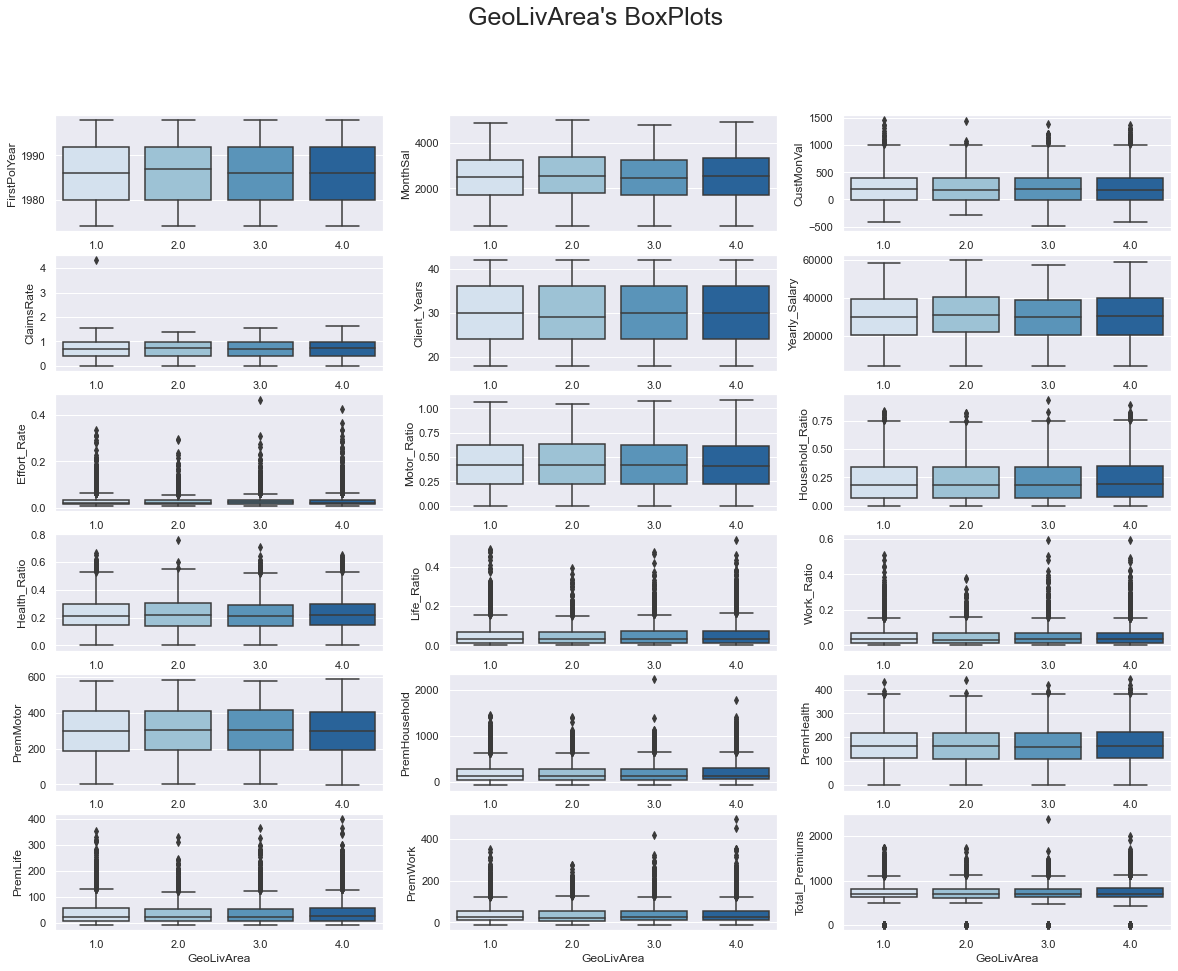

In [617]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(6,3, figsize=(20, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data["GeoLivArea"], y=data[feat], ax=ax, palette="Blues")
    
# Layout
# Add a centered title to the figure:
title = "GeoLivArea's BoxPlots"

plt.suptitle(title, fontsize=25)

plt.show()

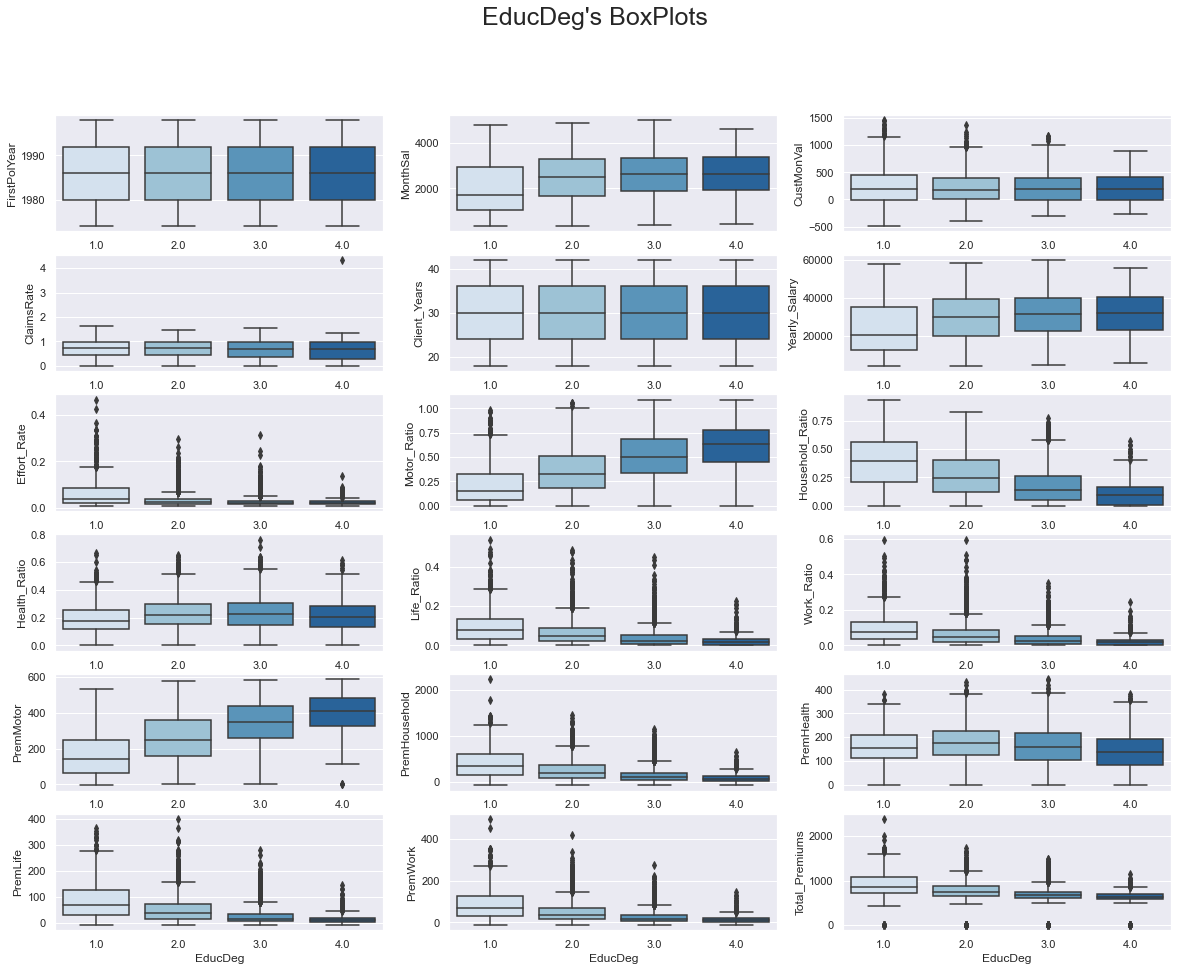

In [619]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(6,3, figsize=(20, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data["EducDeg"], y=data[feat], ax=ax, palette="Blues")
    
# Layout
# Add a centered title to the figure:
title = "EducDeg's BoxPlots"

plt.suptitle(title, fontsize=25)

plt.show()

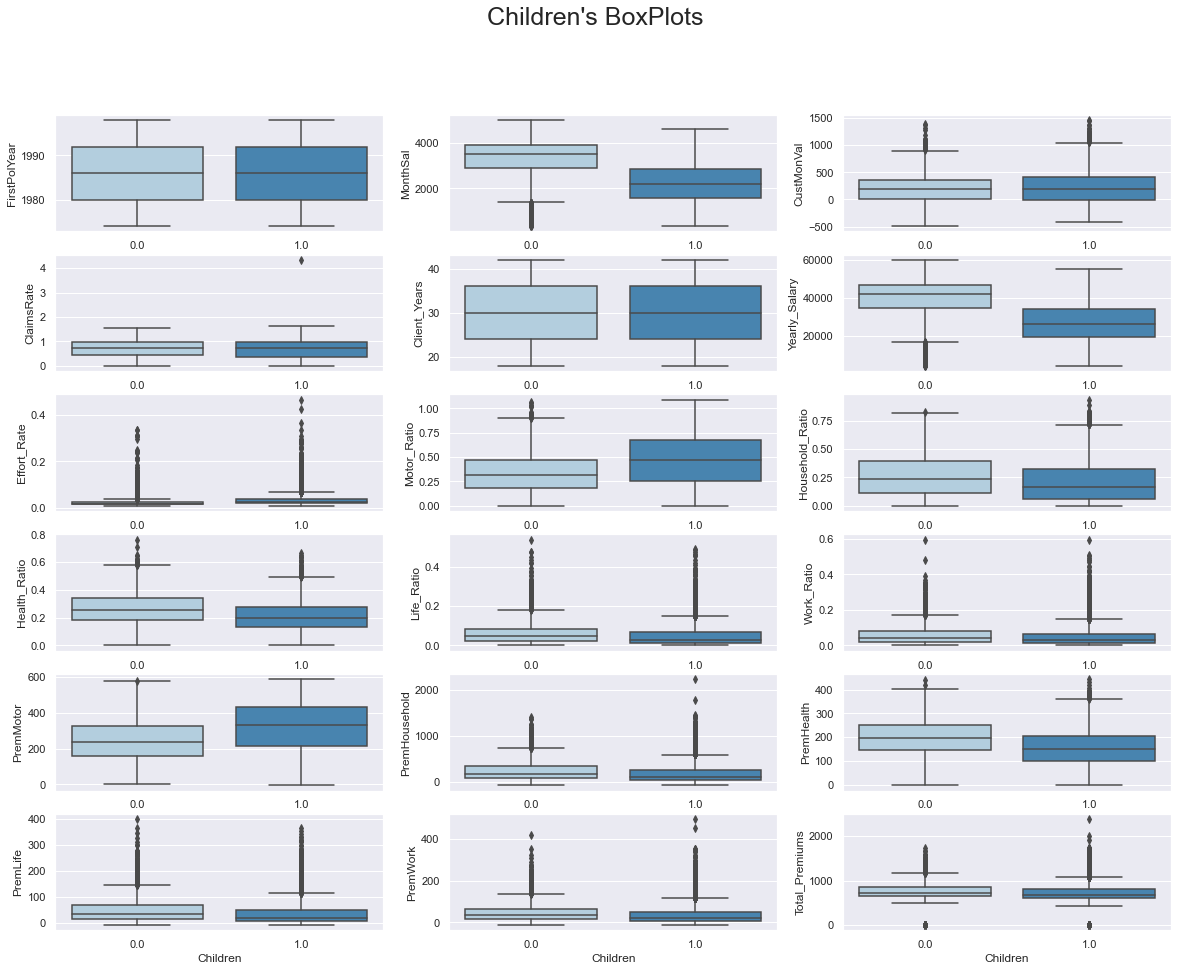

In [620]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(6,3, figsize=(20, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data["Children"], y=data[feat], ax=ax, palette="Blues")
    
# Layout
# Add a centered title to the figure:
title = "Children's BoxPlots"

plt.suptitle(title, fontsize=25)

plt.show()

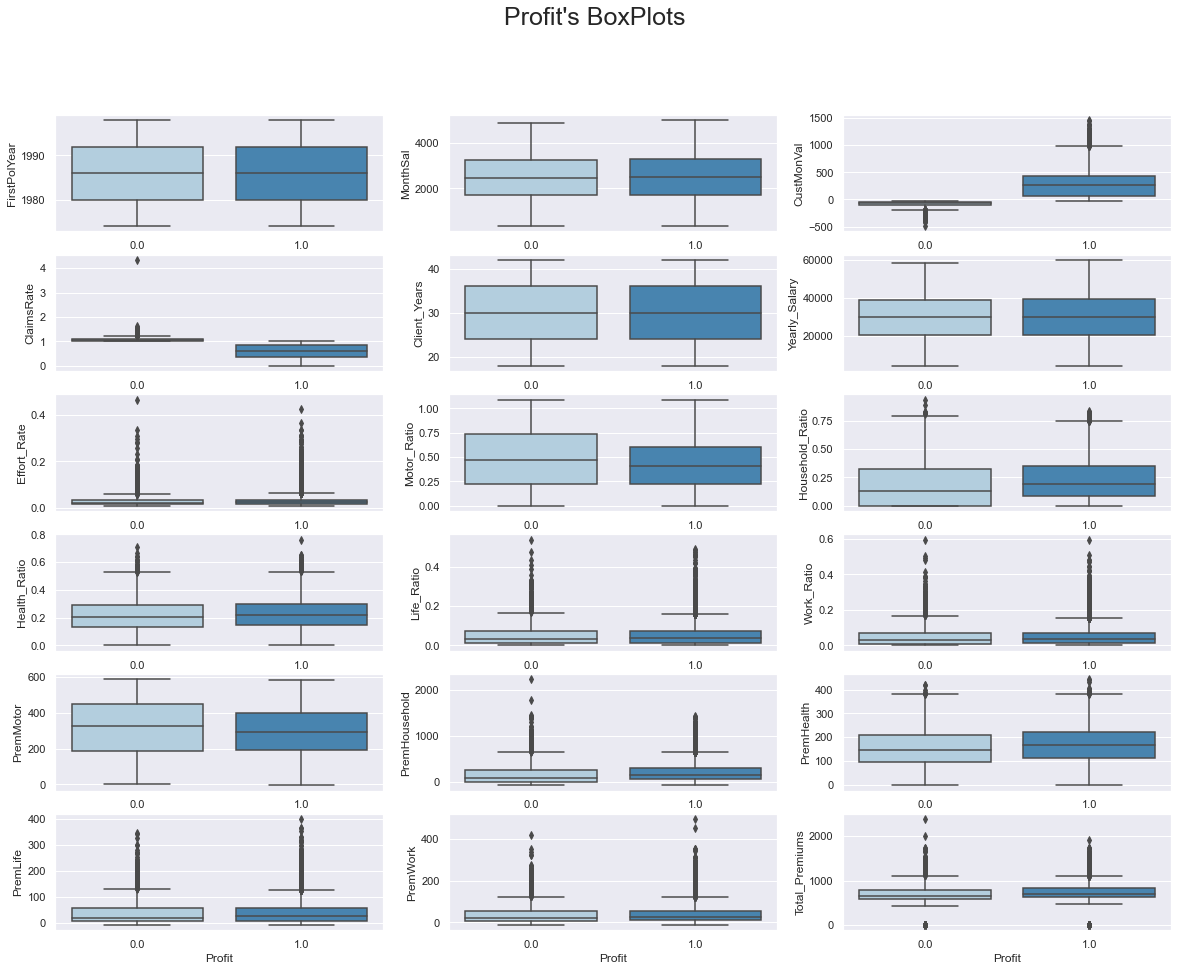

In [621]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(6,3, figsize=(20, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data["Profit"], y=data[feat], ax=ax, palette="Blues")
    
# Layout
# Add a centered title to the figure:
title = "Profit's BoxPlots"

plt.suptitle(title, fontsize=25)

plt.show()

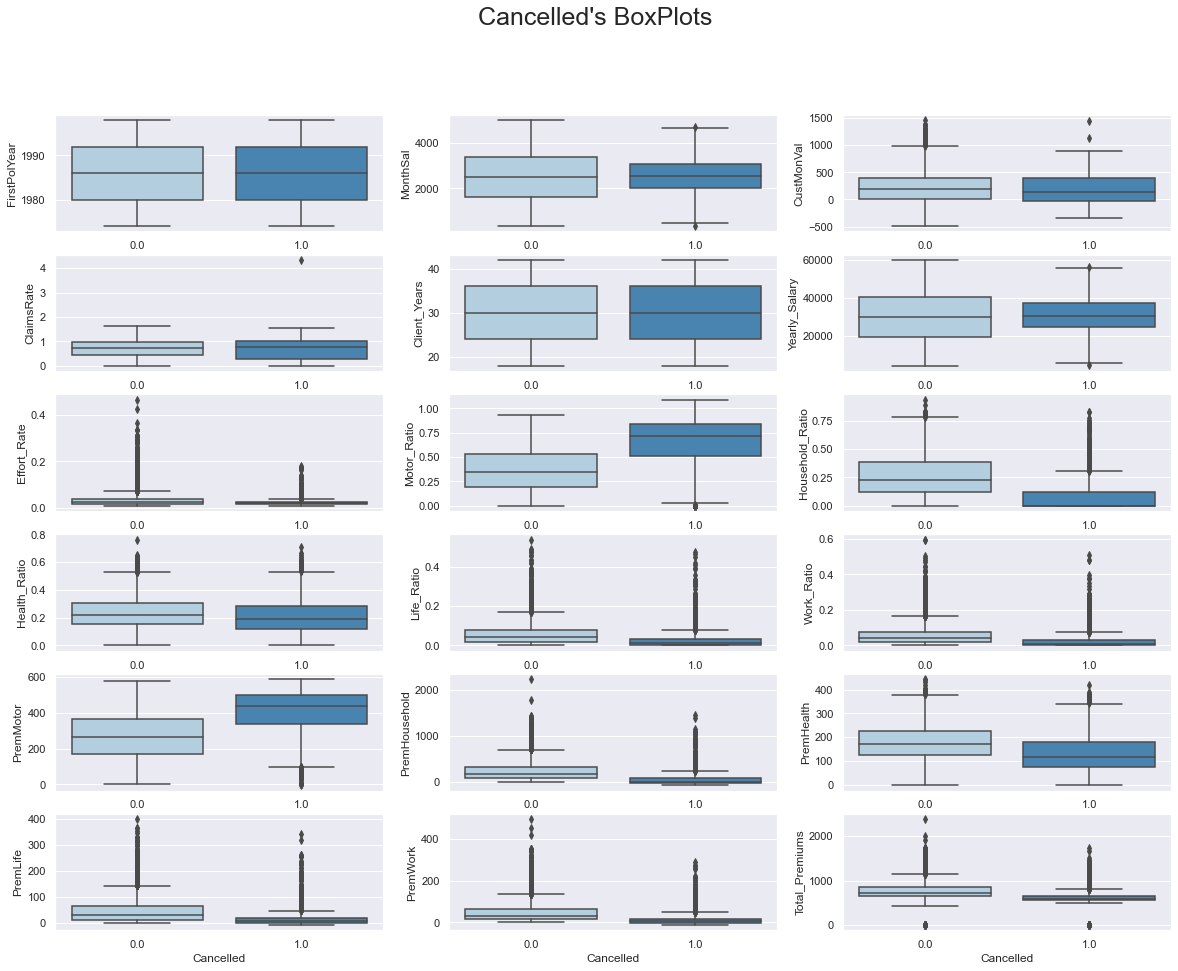

In [622]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(6,3, figsize=(20, 15))

# Plot data
# Iterate across axes objects and associate each box plot (hint: use the ax argument):
for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method
    sns.boxplot(x=data["Cancelled"], y=data[feat], ax=ax, palette="Blues")
    
# Layout
# Add a centered title to the figure:
title = "Cancelled's BoxPlots"

plt.suptitle(title, fontsize=25)

plt.show()

In [623]:
#The only categorical feature that does not have any impact in any other variable in GeoLivArea
data = data.drop(columns='GeoLivArea', axis=1)

# Clustering

In [627]:
#Creating new dataframes for segmentation
complete_df = data[['Client_Years', 'EducDeg', 'MonthSal', 'Children', 'CustMonVal', 'Effort_Rate', 'Cancelled', 'Profit', 'PremMotor','PremHousehold','PremHealth','PremLife','PremWork','Motor_Ratio','Household_Ratio','Health_Ratio','Life_Ratio','Work_Ratio']]
value_df = data[['Client_Years', 'EducDeg', 'MonthSal', 'Children', 'CustMonVal', 'Effort_Rate', 'Cancelled', 'Profit']]
cons_df = data[['PremMotor','PremHousehold','PremHealth','PremLife','PremWork','Motor_Ratio','Household_Ratio','Health_Ratio','Life_Ratio','Work_Ratio']]

In [628]:
scaler = StandardScaler()

In [632]:
cons_df_scaled = scaler.fit_transform(cons_df)
cons_df_scaled = pd.DataFrame(cons_df_scaled, columns = cons_df.columns)

### K-means

In [634]:
range_clusters = range(1, 11)

In [637]:
inertia = []
for n_clus in range_clusters:  # iterate over desired ncluster range
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(cons_df_scaled)
    inertia.append(kmclust.inertia_)  # save the inertia of the given cluster solution

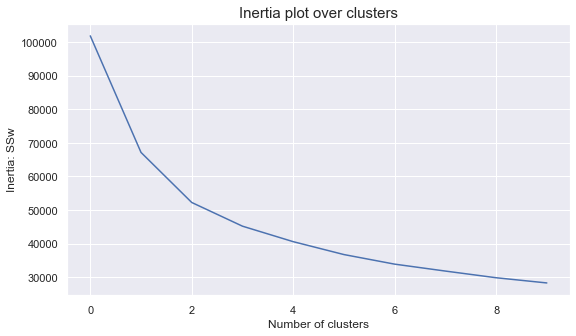

In [638]:
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(inertia)
plt.ylabel("Inertia: SSw")
plt.xlabel("Number of clusters")
plt.title("Inertia plot over clusters", size=15)
plt.show()

For n_clusters = 2, the average silhouette_score is : 0.3283799727930176
For n_clusters = 3, the average silhouette_score is : 0.2976466233866543
For n_clusters = 4, the average silhouette_score is : 0.30571890710226257
For n_clusters = 5, the average silhouette_score is : 0.24585623796804476
For n_clusters = 6, the average silhouette_score is : 0.24982014644670217
For n_clusters = 7, the average silhouette_score is : 0.23996202682427673
For n_clusters = 8, the average silhouette_score is : 0.23426140298645454
For n_clusters = 9, the average silhouette_score is : 0.25149559294184937
For n_clusters = 10, the average silhouette_score is : 0.2458480410339985


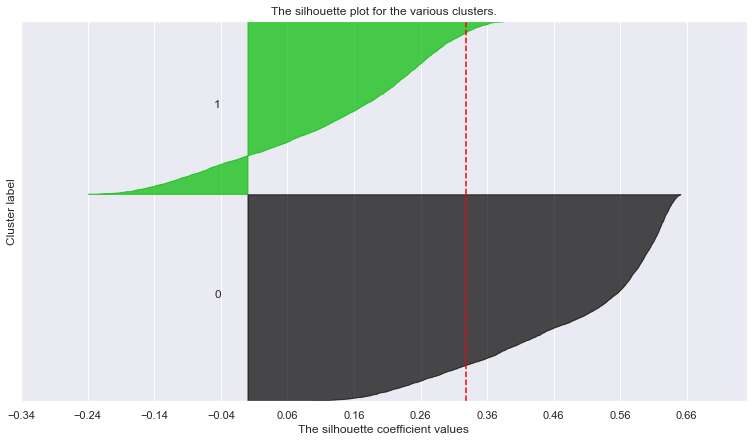

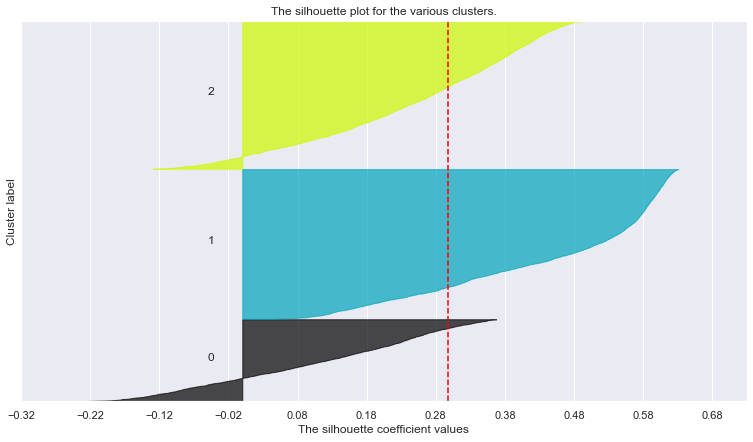

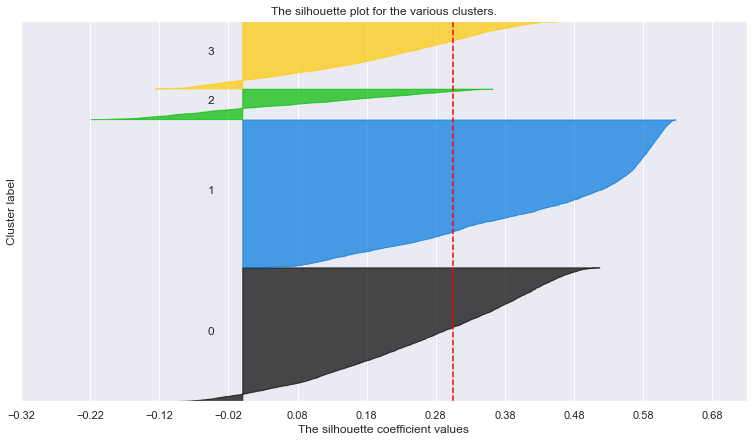

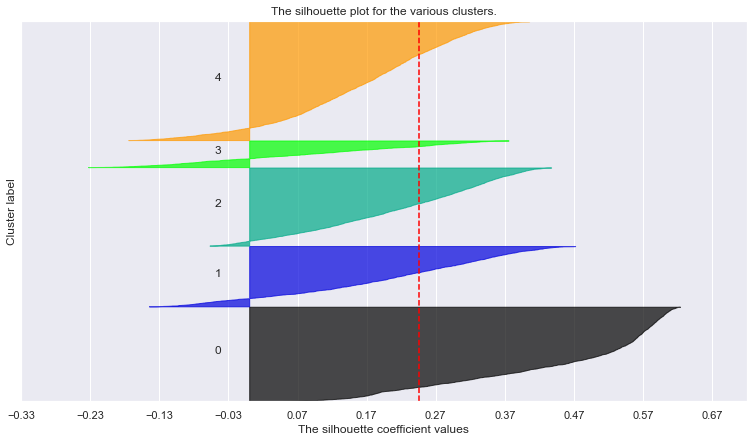

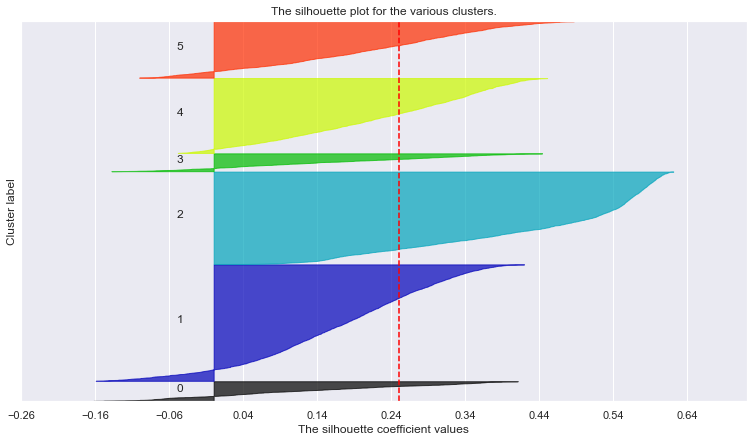

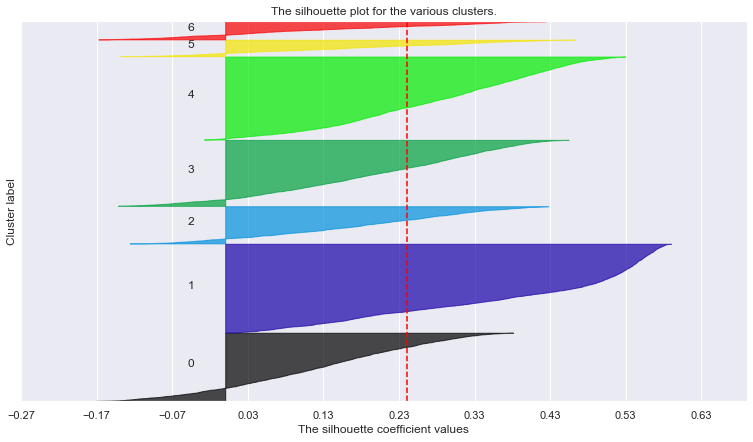

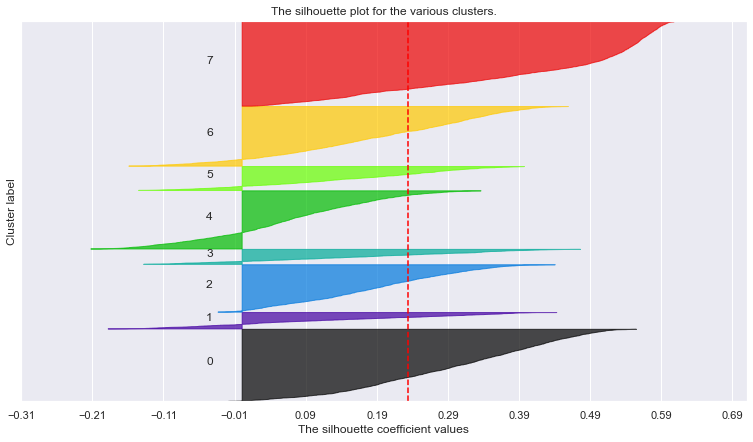

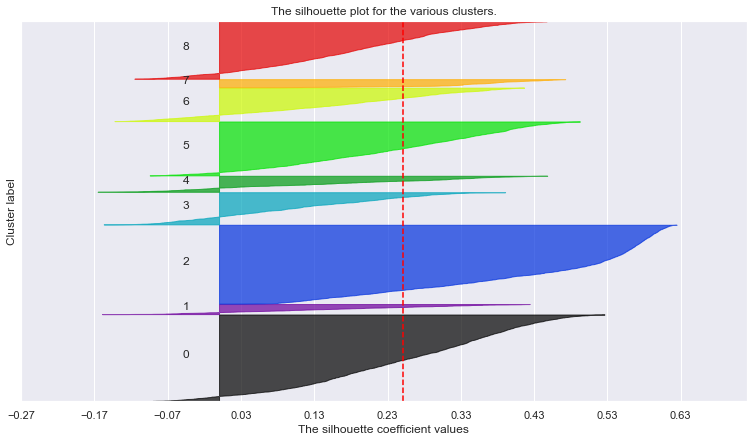

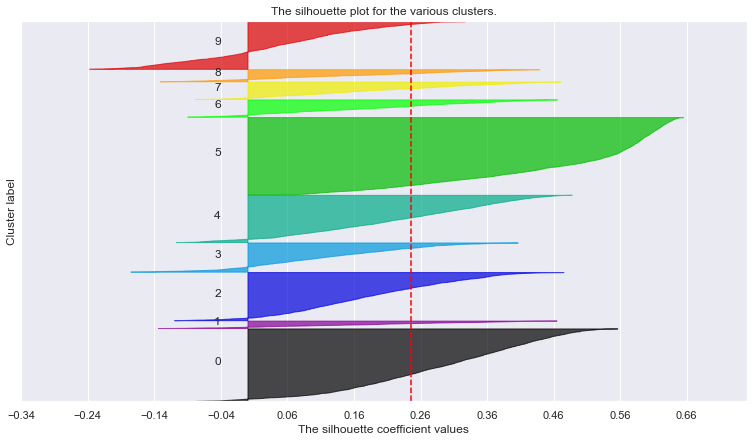

In [642]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(cons_df_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(cons_df_scaled, cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(cons_df_scaled, cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(cons_df_scaled) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

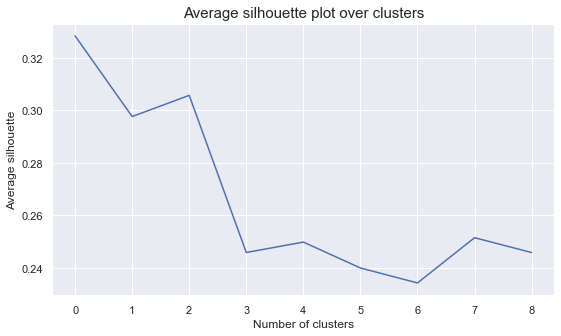

In [643]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))
plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

In [648]:
n_clusters = 2
kmeans = KMeans(n_clusters=2, random_state=1, init = 'k-means++').fit(cons_df_scaled)

In [649]:
# Check the Clusters (Centroids).
my_clusters=kmeans.cluster_centers_
my_clusters

array([[-0.88037735,  0.63147259,  0.51863864,  0.61105552,  0.60094538,
        -0.82566043,  0.68594917,  0.26750312,  0.55362825,  0.5403071 ],
       [ 0.74996885, -0.53793385, -0.44181376, -0.52054112, -0.51192857,
         0.70335704, -0.58434093, -0.22787843, -0.47162043, -0.46027251]])

In [650]:
# Invert the transformation for interpretability.
my_clusters=pd.DataFrame(scaler.inverse_transform(X=my_clusters),columns=cons_df.columns)

In [652]:
my_clusters

PremMotor  PremHousehold  PremHealth   PremLife   PremWork  Motor_Ratio  \
0  175.359981     342.504918  206.233446  70.250757  68.591555     0.219851   
1  401.081289      80.434669  134.334475  16.612575  16.526450     0.607024   

   Household_Ratio  Health_Ratio  Life_Ratio  Work_Ratio  
0         0.354064      0.256871    0.083695    0.081790  
1         0.115510      0.201039    0.025099    0.025403

### KModes

In [669]:
km = KModes(n_clusters=2, init='random', n_init=50, verbose=1)

In [670]:
value_cat = value_df[['EducDeg','Children','Cancelled','Profit']].astype('str')

In [671]:
clusters = km.fit_predict(value_cat)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 11339.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 10598.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 423, cost: 9392.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 8877.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 8877.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 10312.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 741, cost: 9770.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, iteration:

In [672]:
# Print the cluster centroids
print(km.cluster_centroids_)
cat_centroids = pd.DataFrame(km.cluster_centroids_,
                             columns = ['EducDeg','Children','Cancelled','Profit'])

[['2.0' '1.0' '0.0' '1.0']
 ['3.0' '1.0' '0.0' '1.0']]


In [673]:
unique, counts = np.unique(km.labels_, return_counts=True)

In [674]:
cat_counts = pd.DataFrame(np.asarray((unique, counts)).T, columns = ['Label','Number'])

In [675]:
cat_centroids = pd.concat([cat_centroids, cat_counts], axis = 1)

In [676]:
cat_centroids

EducDeg Children Cancelled Profit  Label  Number
0     2.0      1.0       0.0    1.0      0    5412
1     3.0      1.0       0.0    1.0      1    4777

### Hierarchical Clustering

In [681]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.count() - 1))
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        
        
        hclabels = cluster.fit_predict(df) #get cluster labels
        
        
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        
        
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        
        
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        
        
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

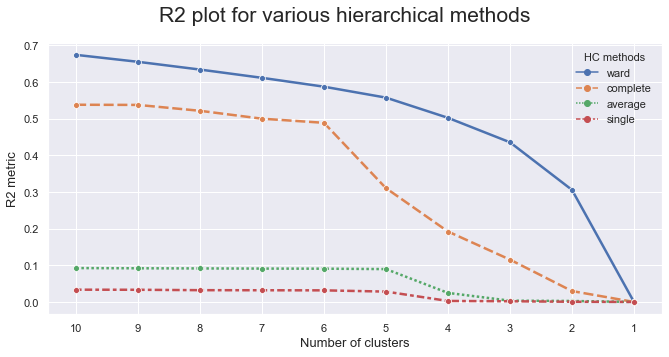

In [682]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack(
    [
        get_r2_hc(df=cons_df_scaled, link_method=link, max_nclus=max_nclus) 
        for link in hc_methods
    ]
).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

In [684]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit_predict(cons_df_scaled)

array([7353, 7039, 9347, ...,    3,    1,    0], dtype=int64)

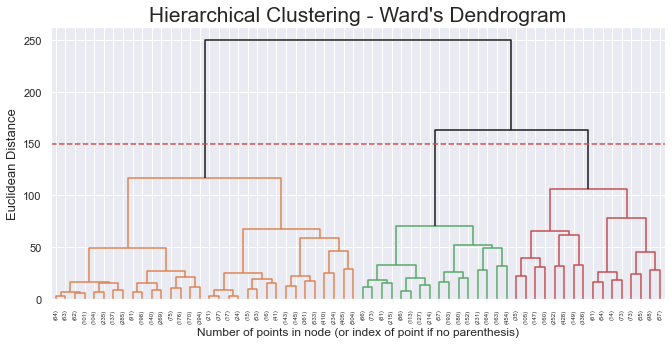

In [687]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 150
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [690]:
# 3 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc3clust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=3)
hc3_labels = hc3clust.fit_predict(cons_df_scaled)

In [711]:
# Characterizing the 3 clusters
df_concat = pd.concat((cons_df_scaled, pd.Series(hc3_labels, name='labels')), axis=1)
df_concat = df_concat.groupby('labels').mean()

In [712]:
# Invert the transformation for interpretability.
df_concat=pd.DataFrame(scaler.inverse_transform(X=df_concat),columns=cons_df.columns)

In [713]:
df_concat

PremMotor  PremHousehold  PremHealth    PremLife   PremWork  Motor_Ratio  \
0  396.867168     105.667228  131.142973   17.767201  17.641072     0.591009   
1  143.964411     486.291822  158.549041  100.949809  88.909242     0.162499   
2  208.201923     173.031549  252.605862   43.148186  50.036135     0.297931   

   Household_Ratio  Health_Ratio  Life_Ratio  Work_Ratio  
0         0.139327      0.188233    0.025314    0.025445  
1         0.456740      0.172087    0.112576    0.096815  
2         0.221000      0.354065    0.060137    0.069896

### DBScan

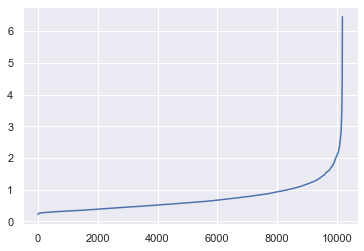

In [715]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(cons_df_scaled)
distances, _ = neigh.kneighbors(cons_df_scaled)
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [716]:
db = DBSCAN(eps= 1.8, #radius (euclidean distance)
            min_samples=20).fit(cons_df_scaled) # minimum number of points inside the radius.

In [717]:
labels = db.labels_

In [718]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [719]:
unique_clusters, counts_clusters = np.unique(db.labels_, return_counts = True)
print(np.asarray((unique_clusters, counts_clusters)))

[[  -1    0    1]
 [  97 9885  207]]


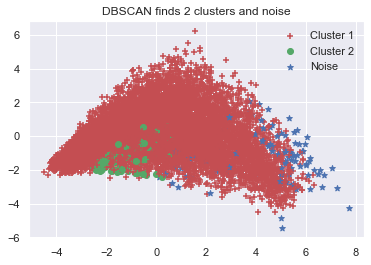

In [720]:
pca = PCA(n_components=2).fit(cons_df_scaled)
pca_2d = pca.transform(cons_df_scaled)
for i in range(0, pca_2d.shape[0]):
    if db.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif db.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif db.labels_[i] == 2:
        c4 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='k',marker='v')
    elif db.labels_[i] == 3:
        c5 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='y',marker='s')
    elif db.labels_[i] == 4:
        c6 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='m',marker='p')
    elif db.labels_[i] == 5:
        c7 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='c',marker='H')
    elif db.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

Text(0.5, 0, 'PCA 3')

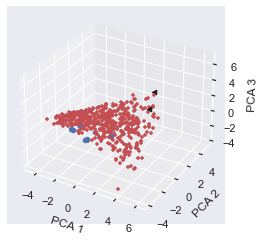

In [722]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(cons_df_scaled)
pca_3d = pca.transform(cons_df_scaled)
#Add my visuals
my_color=[]
my_marker=[]
#Load my visuals
for i in range(pca_3d.shape[0]):
    if labels[i] == 0:
        my_color.append('r')
        my_marker.append('+')
    elif labels[i] == 1:
        my_color.append('b')
        my_marker.append('o')
    elif labels[i] == 2:
        my_color.append('g')
        my_marker.append('*')
    elif labels[i] == -1:
        my_color.append('k')
        my_marker.append('<')
        
        

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(500):
#for i in range(pca_3d.shape[0]):
    ax.scatter(pca_3d[i,0], pca_3d[i,1], pca_3d[i,2], c=my_color[i], marker=my_marker[i])
    
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

### Mean Shift

In [724]:
to_MS = cons_df_scaled

In [725]:
my_bandwidth = estimate_bandwidth(to_MS,
                               quantile=0.2,
                               n_samples=1000)

In [726]:
ms = MeanShift(bandwidth=my_bandwidth,
               bin_seeding=True)

In [727]:
ms.fit(to_MS)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [728]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [729]:
#Values
scaler.inverse_transform(X=cluster_centers)

array([[ 3.93581953e+02,  9.53380645e+01,  1.39190090e+02,
         1.86478886e+01,  1.85576970e+01,  6.05066478e-01,
         1.36937111e-01,  2.09984644e-01,  2.79538240e-02,
         2.82219352e-02],
       [ 4.22043962e+02,  6.13012579e+01,  1.03914906e+02,
         7.97006289e+00,  1.12347170e+01,  1.66533454e-15,
        -2.77555756e-17, -7.77156117e-16, -2.08166817e-17,
        -2.08166817e-17],
       [ 9.21636842e+01,  1.09555263e+02,  1.47870000e+02,
         2.86738421e+02,  3.67789474e+01,  1.40675053e-01,
         1.54804973e-01,  2.24013651e-01,  4.28705871e-01,
         5.58741286e-02],
       [ 5.11750000e+01,  1.60300000e+02,  4.91750000e+01,
         3.63400000e+01,  4.34305000e+02,  6.93163268e-02,
         2.17470933e-01,  6.84817413e-02,  5.07952397e-02,
         5.93935759e-01],
       [ 1.56150000e+01,  2.00065000e+03,  4.33400000e+01,
         4.11750000e+01,  9.47400000e+01,  7.12278160e-03,
         9.09170023e-01,  2.01131616e-02,  1.90787863e-02,
         4.

In [730]:
#Count
unique, counts = np.unique(labels, return_counts=True)

In [731]:
print(np.asarray((unique, counts)).T)

[[   0 9302]
 [   1  225]
 [   2  259]
 [   3   49]
 [   4  195]
 [   5  119]
 [   6   40]]


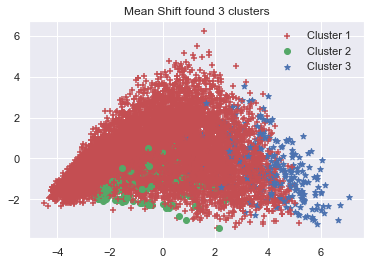

In [732]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(to_MS)
pca_2d = pca.transform(to_MS)
for i in range(0, pca_2d.shape[0]):
    if labels[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    elif labels[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    elif labels[i] == 2:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Cluster 3 '])
plt.title('Mean Shift found 3 clusters')
plt.show()


Text(0.5, 0, 'PCA 3')

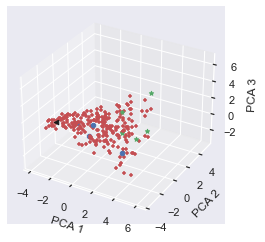

In [733]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3).fit(to_MS)
pca_3d = pca.transform(to_MS)
#Add my visuals
my_color=[]
my_marker=[]
#Load my visuals
for i in range(pca_3d.shape[0]):
    if labels[i] == 0:
        my_color.append('r')
        my_marker.append('+')
    elif labels[i] == 1:
        my_color.append('b')
        my_marker.append('o')
    elif labels[i] == 2:
        my_color.append('g')
        my_marker.append('*')
    elif labels[i] == 3:
        my_color.append('k')
        my_marker.append('<')
        
        
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#for i in range(pca_3d.shape[0]):
for i in range(250):
    ax.scatter(pca_3d[i,0],
               pca_3d[i,1], 
               pca_3d[i,2], c=my_color[i], marker=my_marker[i])
    
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

### GMM clustering

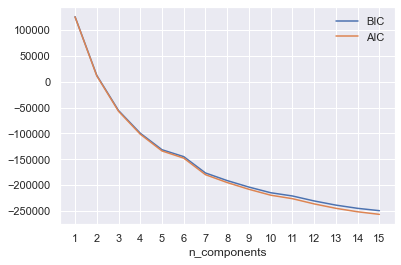

In [747]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(cons_df_scaled)
          for n in n_components]

bic_values = [m.bic(cons_df_scaled) for m in models]
aic_values = [m.aic(cons_df_scaled) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

In [748]:
# Performing GMM clustering
gmm = GaussianMixture(n_components=5, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(cons_df_scaled)

In [749]:
# Concatenating the labels to df
df_concat = pd.concat([cons_df_scaled, pd.Series(gmm_labels, index=cons_df_scaled.index, name="gmm_labels")], axis=1)
df_concat.head()

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  Motor_Ratio  \
0   0.567728      -0.542328   -0.281172  0.120749 -0.504158     0.536261   
1  -1.587492       0.960314   -0.677515  3.231901  1.403317    -1.358088   
2  -0.657986       0.104913   -0.572118  0.950699  1.251343    -0.594616   
3  -0.828951      -0.703413    1.920419 -0.125451 -0.259418    -0.494173   
4   0.298822      -0.683556    0.202801 -0.474815  0.020804     0.431326   

   Household_Ratio  Health_Ratio  Life_Ratio  Work_Ratio  gmm_labels  
0        -0.563771     -0.060485    0.325069   -0.460730           0  
1         1.233442     -0.875090    2.824609    1.156303           3  
2         0.414740     -0.519120    1.129265    1.461498           4  
3        -0.815135      2.584706    0.118625   -0.073841           0  
4        -0.794919      0.563008   -0.388569    0.257870           0

In [750]:
df_concat.groupby('gmm_labels').mean()

PremMotor  PremHousehold  PremHealth  PremLife  PremWork  \
gmm_labels                                                             
0            0.535653      -0.555555   -0.085384 -0.433976 -0.405859   
1            0.513194      -0.787879   -0.319789 -0.174475 -0.208167   
2            0.167305      -0.379712   -0.779220 -0.513936 -0.519234   
3           -1.088155       1.657357    0.073455  0.800871  0.801575   
4           -0.287803       0.146204    0.387705  0.117935  0.113472   

            Motor_Ratio  Household_Ratio  Health_Ratio  Life_Ratio  Work_Ratio  
gmm_labels                                                                      
0              0.572369        -0.588055      0.178863   -0.356597   -0.328005  
1              0.774357        -0.899099      0.111252    0.050218    0.023396  
2             -1.693892        -1.199428     -2.011653   -0.910771   -0.911046  
3             -1.108602         1.620183     -0.496466    0.427920    0.426256  
4             -0.381419         0.377313      0.229728    0.141922    0.132320

In [752]:
def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

In [753]:
# Computing the R^2 of the cluster solution
sst = get_ss(cons_df_scaled)  # get total sum of squares
ssw_labels = df_concat.groupby(by='gmm_labels').apply(get_ss)  # compute ssw for each cluster labels
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.3399


In [377]:
# Splitting feature names into groups
pc_features = df.columns[df.columns.str.startswith('PC')].tolist()

# non metric features as dummies:
non_metric_features = df.columns[(~df.columns.isin(metric_features)) & ~(df.columns.isin(pc_features))].tolist()

# non metric features in their categorical form:
non_metric_features_original = df_b.loc[:,~(df_b.columns.isin(metric_features))].columns.tolist()

In [378]:
df

PC0       PC1       PC2       PC3       PC4  MonthSal  \
CustID                                                                
1.0     -0.939331  0.204204  0.345477 -0.684257  0.503107 -0.324926   
2.0      5.278320  2.298295  1.463143 -1.710314  1.180659 -1.850378   
3.0      1.906377  0.631515  1.715499  0.250165 -0.486937 -0.223229   
4.0      0.819253 -2.724889 -0.501043  0.032646  2.481025 -1.421218   
5.0     -0.705614 -0.435765  0.247812  0.640912  1.110868 -0.745951   
...           ...       ...       ...       ...       ...       ...   
10291.0  6.714526  3.762801 -0.715540  1.629507  0.762376 -1.902244   
10292.0 -1.883613 -0.682275 -0.117941  0.132224 -0.101523  0.703230   
10294.0 -1.736643  0.166956 -0.523161 -0.192597 -0.303295  0.428648   
10295.0  2.166614 -0.321849  1.119479  1.103126  0.083844 -0.534421   
10296.0 -1.892718  0.137876 -0.308016  0.142613 -0.096925  0.323900   

         Effort_Rate  Motor_Ratio  Household_Ratio  Health_Ratio  ...  \
CustID                                                            ...   
1.0        -0.256958     0.536261        -0.563771     -0.060485  ...   
2.0         2.650206    -1.358088         1.233442     -0.875090  ...   
3.0        -0.202361    -0.594616         0.414740     -0.519120  ...   
4.0         0.416382    -0.494173        -0.815135      2.584706  ...   
5.0        -0.113843     0.431326        -0.794919      0.563008  ...   
...              ...          ...              ...           ...  ...   
10291.0     4.706649    -1.673006         2.391280     -1.309282  ...   
10292.0    -0.549060     0.729812        -0.788992      0.392139  ...   
10294.0    -0.444612     0.595561        -0.183752     -0.198841  ...   
10295.0    -0.012507    -0.732791         0.251515      0.259668  ...   
10296.0    -0.446702     0.748425        -0.448275     -0.139858  ...   

         PremHealth  PremLife  PremWork  Total_Premiums  x0_2.0  x0_3.0  \
CustID                                                                    
1.0       -0.281172  0.120749 -0.504158       -0.326472     0.0     0.0   
2.0       -0.677515  3.231901  1.403317        0.833394     0.0     0.0   
3.0       -0.572118  0.950699  1.251343        0.028200     0.0     1.0   
4.0        1.920419 -0.125451 -0.259418       -0.633123     0.0     0.0   
5.0        0.202801 -0.474815  0.020804       -0.498136     0.0     0.0   
...             ...       ...       ...             ...     ...     ...   
10291.0   -0.858654  1.513352  3.436688        2.685398     0.0     1.0   
10292.0    0.085515 -0.664687 -0.549258       -0.439906     1.0     0.0   
10294.0   -0.336075 -0.603717 -0.760654       -0.181465     0.0     0.0   
10295.0    0.413596  0.477075  1.548237        0.190411     1.0     0.0   
10296.0   -0.349434 -0.725657 -0.589656       -0.307566     0.0     0.0   

         x0_4.0  EducDeg  Children  Cancelled  
CustID                                         
1.0         0.0      2.0       1.0        0.0  
2.0         1.0      2.0       1.0        0.0  
3.0         0.0      1.0       0.0        0.0  
4.0         1.0      3.0       1.0        0.0  
5.0         1.0      3.0       1.0        0.0  
...         ...      ...       ...        ...  
10291.0     0.0      1.0       1.0        0.0  
10292.0     0.0      4.0       0.0        0.0  
10294.0     0.0      3.0       1.0        0.0  
10295.0     0.0      1.0       1.0        0.0  
10296.0     0.0      4.0       1.0        0.0  

[10042 rows x 23 columns]

# Hierarchical Clustering / Kmeans

### Checking the optimal number of clusters using the kmeans silhouette analysis

For n_clusters = 2, the average silhouette_score is : 0.3110883429551677
For n_clusters = 3, the average silhouette_score is : 0.28479806568744276
For n_clusters = 4, the average silhouette_score is : 0.27443257415525973
For n_clusters = 5, the average silhouette_score is : 0.27433917667882995
For n_clusters = 6, the average silhouette_score is : 0.21406214991584552
For n_clusters = 7, the average silhouette_score is : 0.21229245830210272
For n_clusters = 8, the average silhouette_score is : 0.21601635097134594
For n_clusters = 9, the average silhouette_score is : 0.21492019465161838
For n_clusters = 10, the average silhouette_score is : 0.2145020218257598


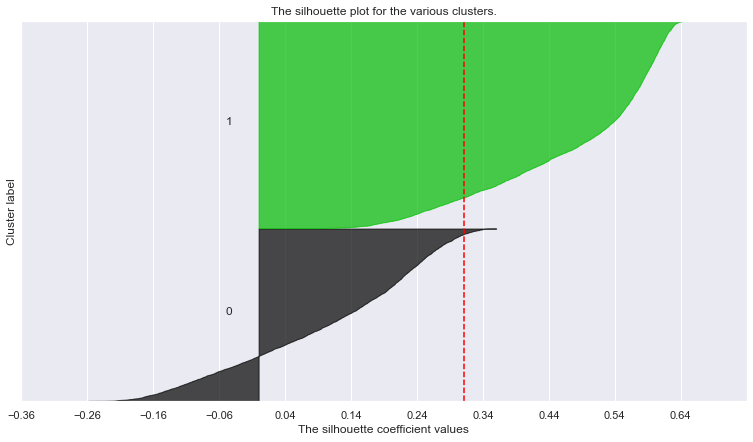

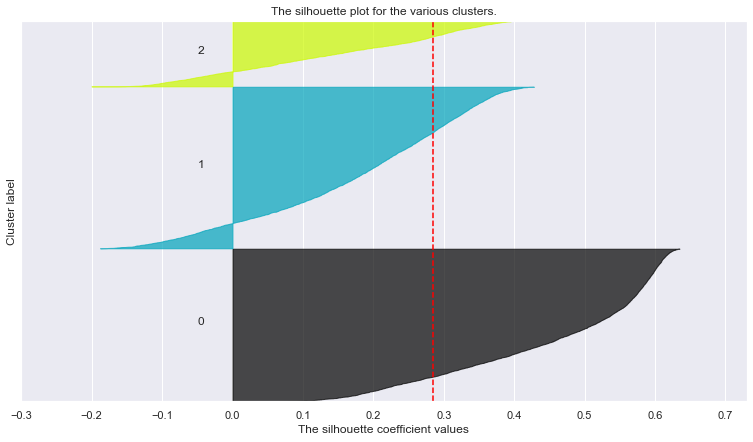

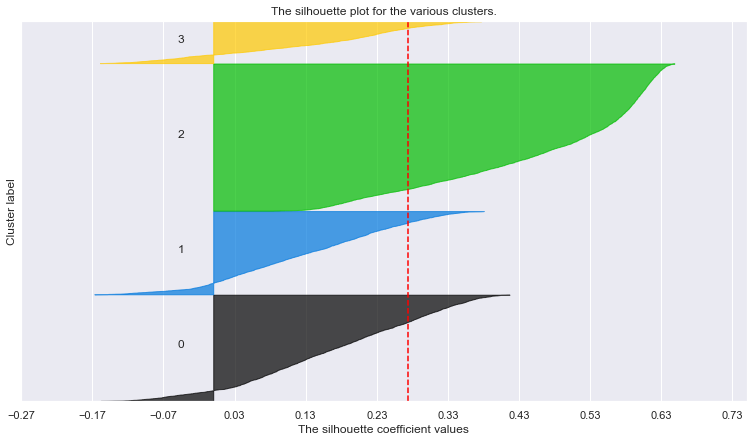

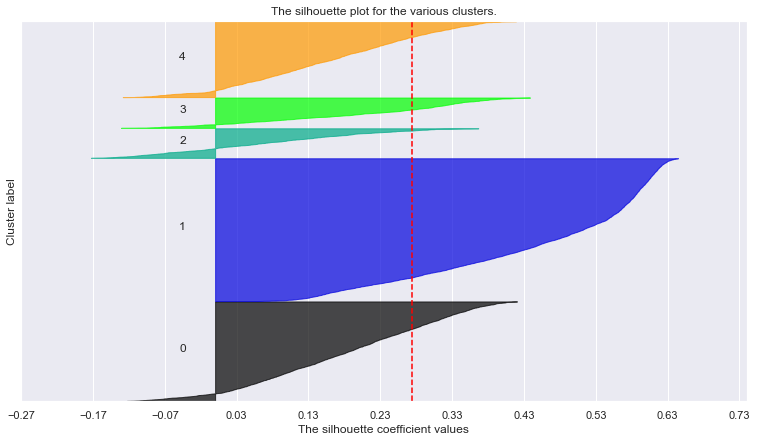

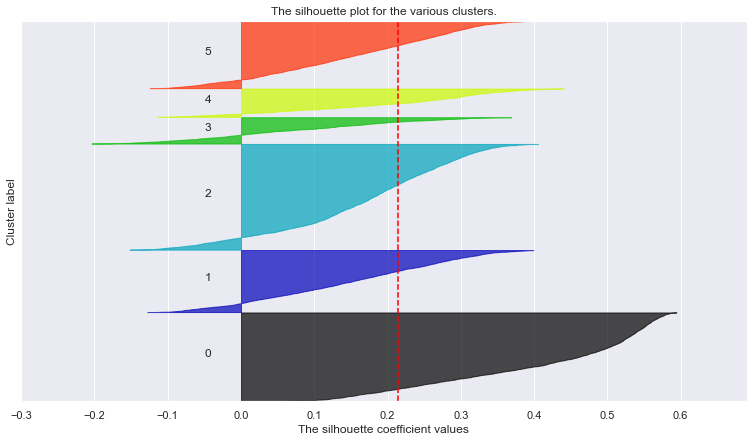

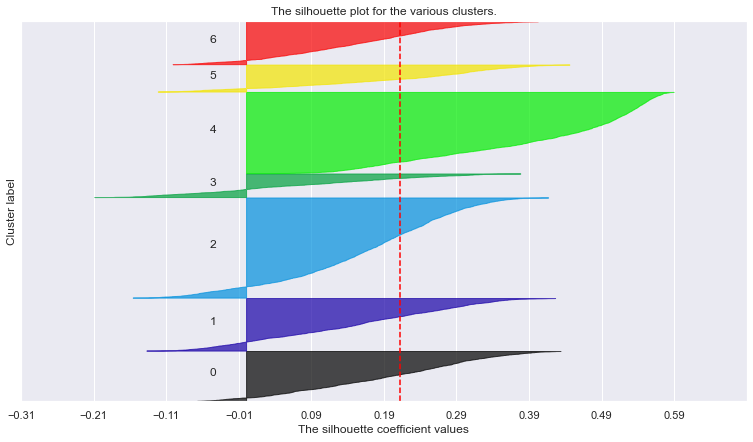

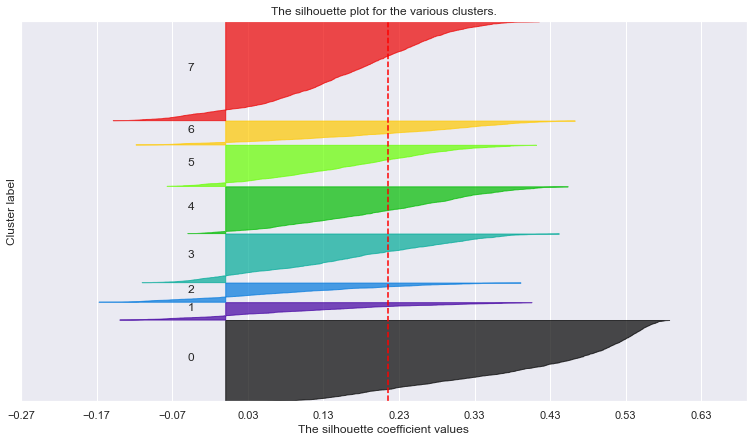

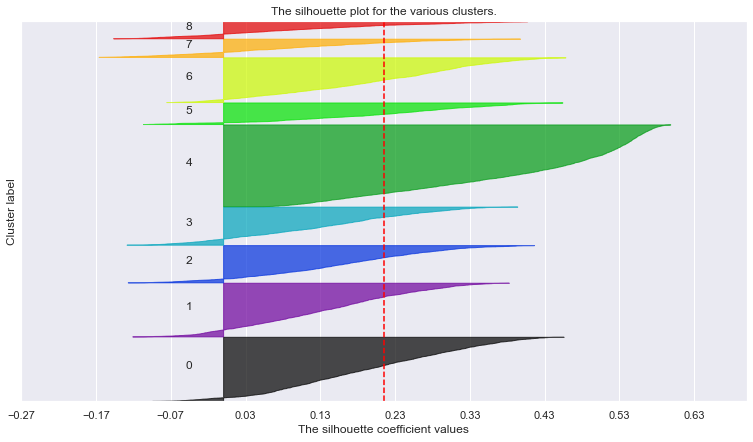

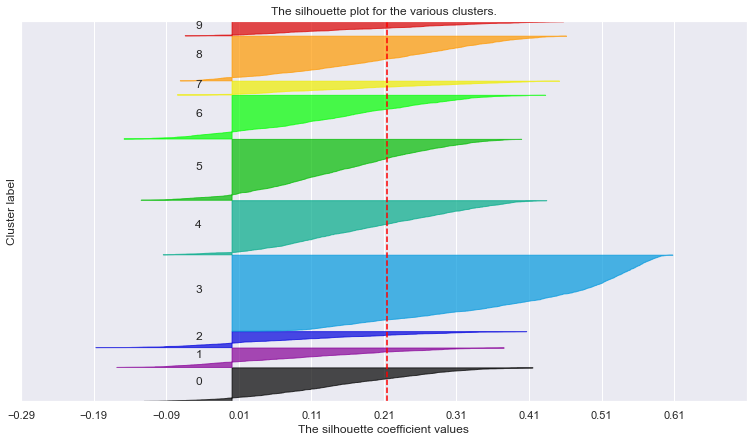

In [148]:
# Storing average silhouette metric
avg_silhouette = []
for nclus in range_clusters:
    # Skip nclus == 1
    if nclus == 1:
        continue
    
    # Create a figure
    fig = plt.figure(figsize=(13, 7))

    # Initialize the KMeans object with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[pc_features])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(df[pc_features], cluster_labels, random_state=0)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df[pc_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        # Get y_upper to demarcate silhouette y range size
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        # Filling the silhouette
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    # The silhouette coefficient can range from -1, 1
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    # The (nclus+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    plt.ylim([0, len(df[pc_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

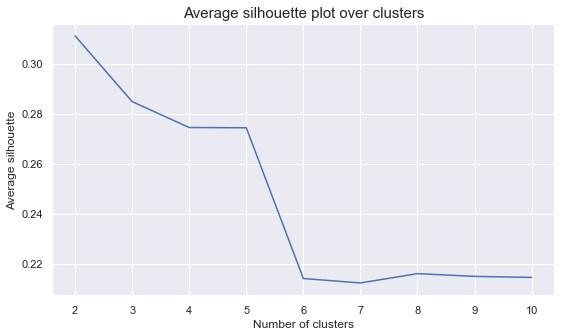

In [149]:
# The average silhouette plot
# The inertia plot
plt.figure(figsize=(9,5))

#This following step is to make sure that we plot the correct x axis´labels:
plot_df=pd.DataFrame(columns=['x','y'])
plot_df['x']=range(2, 11)
plot_df['y']=avg_silhouette

# The inertia plot:
plt.plot('x', 'y',data = plot_df)#inertia
# plt.plot(avg_silhouette)
plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

#We decided to choose 2 clusters, because the average silhouette score is max for this value as we can observe by looking at the plot

In [150]:
### Defining Kmeans

In [151]:
kmclust = KMeans(n_clusters=2, init='k-means++', n_init=20, random_state=1) 
kmeans_labels = kmclust.fit_predict(df[pc_features])
kmeans_labels

array([1, 0, 0, ..., 1, 0, 1])

In [152]:
df_concat = df.copy()
df_concat['k_means_labels'] = kmeans_labels

df_final_kmeans = df_not_standardized.loc[df_concat.index,:]
df_final_kmeans = pd.concat([df[pc_features],df_final_kmeans],axis=1)

df_final_kmeans['k_means_labels']=kmeans_labels

#we also want to compare the clusters with the population:
aux_merge=df_final_kmeans[metric_features].mean()
aux_merge.name='Population'

pd.concat([df_final_kmeans[metric_features+['k_means_labels']].groupby('k_means_labels').mean(),pd.DataFrame(aux_merge).T]).T

0            1   Population
MonthSal         2319.377520  2677.153888  2514.547700
Effort_Rate         0.043297     0.022542     0.031975
Motor_Ratio         0.226471     0.606335     0.433690
Household_Ratio     0.355327     0.114795     0.224115
Health_Ratio        0.261973     0.198603     0.227404
Life_Ratio          0.079354     0.025169     0.049796
Work_Ratio          0.077336     0.025370     0.048988
PremMotor         180.133854   400.775431   300.495790
PremHealth        209.401299   133.271537   167.871839
PremLife           66.886722    16.917156    39.627881
PremWork           65.260210    16.627035    38.730382
Total_Premiums    861.099682   626.040690   732.872919

In [153]:
df_final_kmeans['k_means_labels'].value_counts()

1    5478
0    4564
Name: k_means_labels, dtype: int64

In [154]:
variables_to_interpret=[]
for pc in loadings.columns: 
    top10 = abs(loadings[pc]).sort_values(ascending=False)[:10]
    variables_to_interpret.extend(top10[top10>0.55].index)


print('The following', len(set(variables_to_interpret)), 'variables will be used to interpret the clusters\n',variables_to_interpret)

The following 12 variables will be used to interpret the clusters
 ['PremMotor', 'Motor_Ratio', 'Household_Ratio', 'PremLife', 'PremWork', 'Total_Premiums', 'Life_Ratio', 'Effort_Rate', 'Work_Ratio', 'Health_Ratio', 'PremHealth', 'PremLife', 'MonthSal']


### Visual Analysis of the metric features´ results 

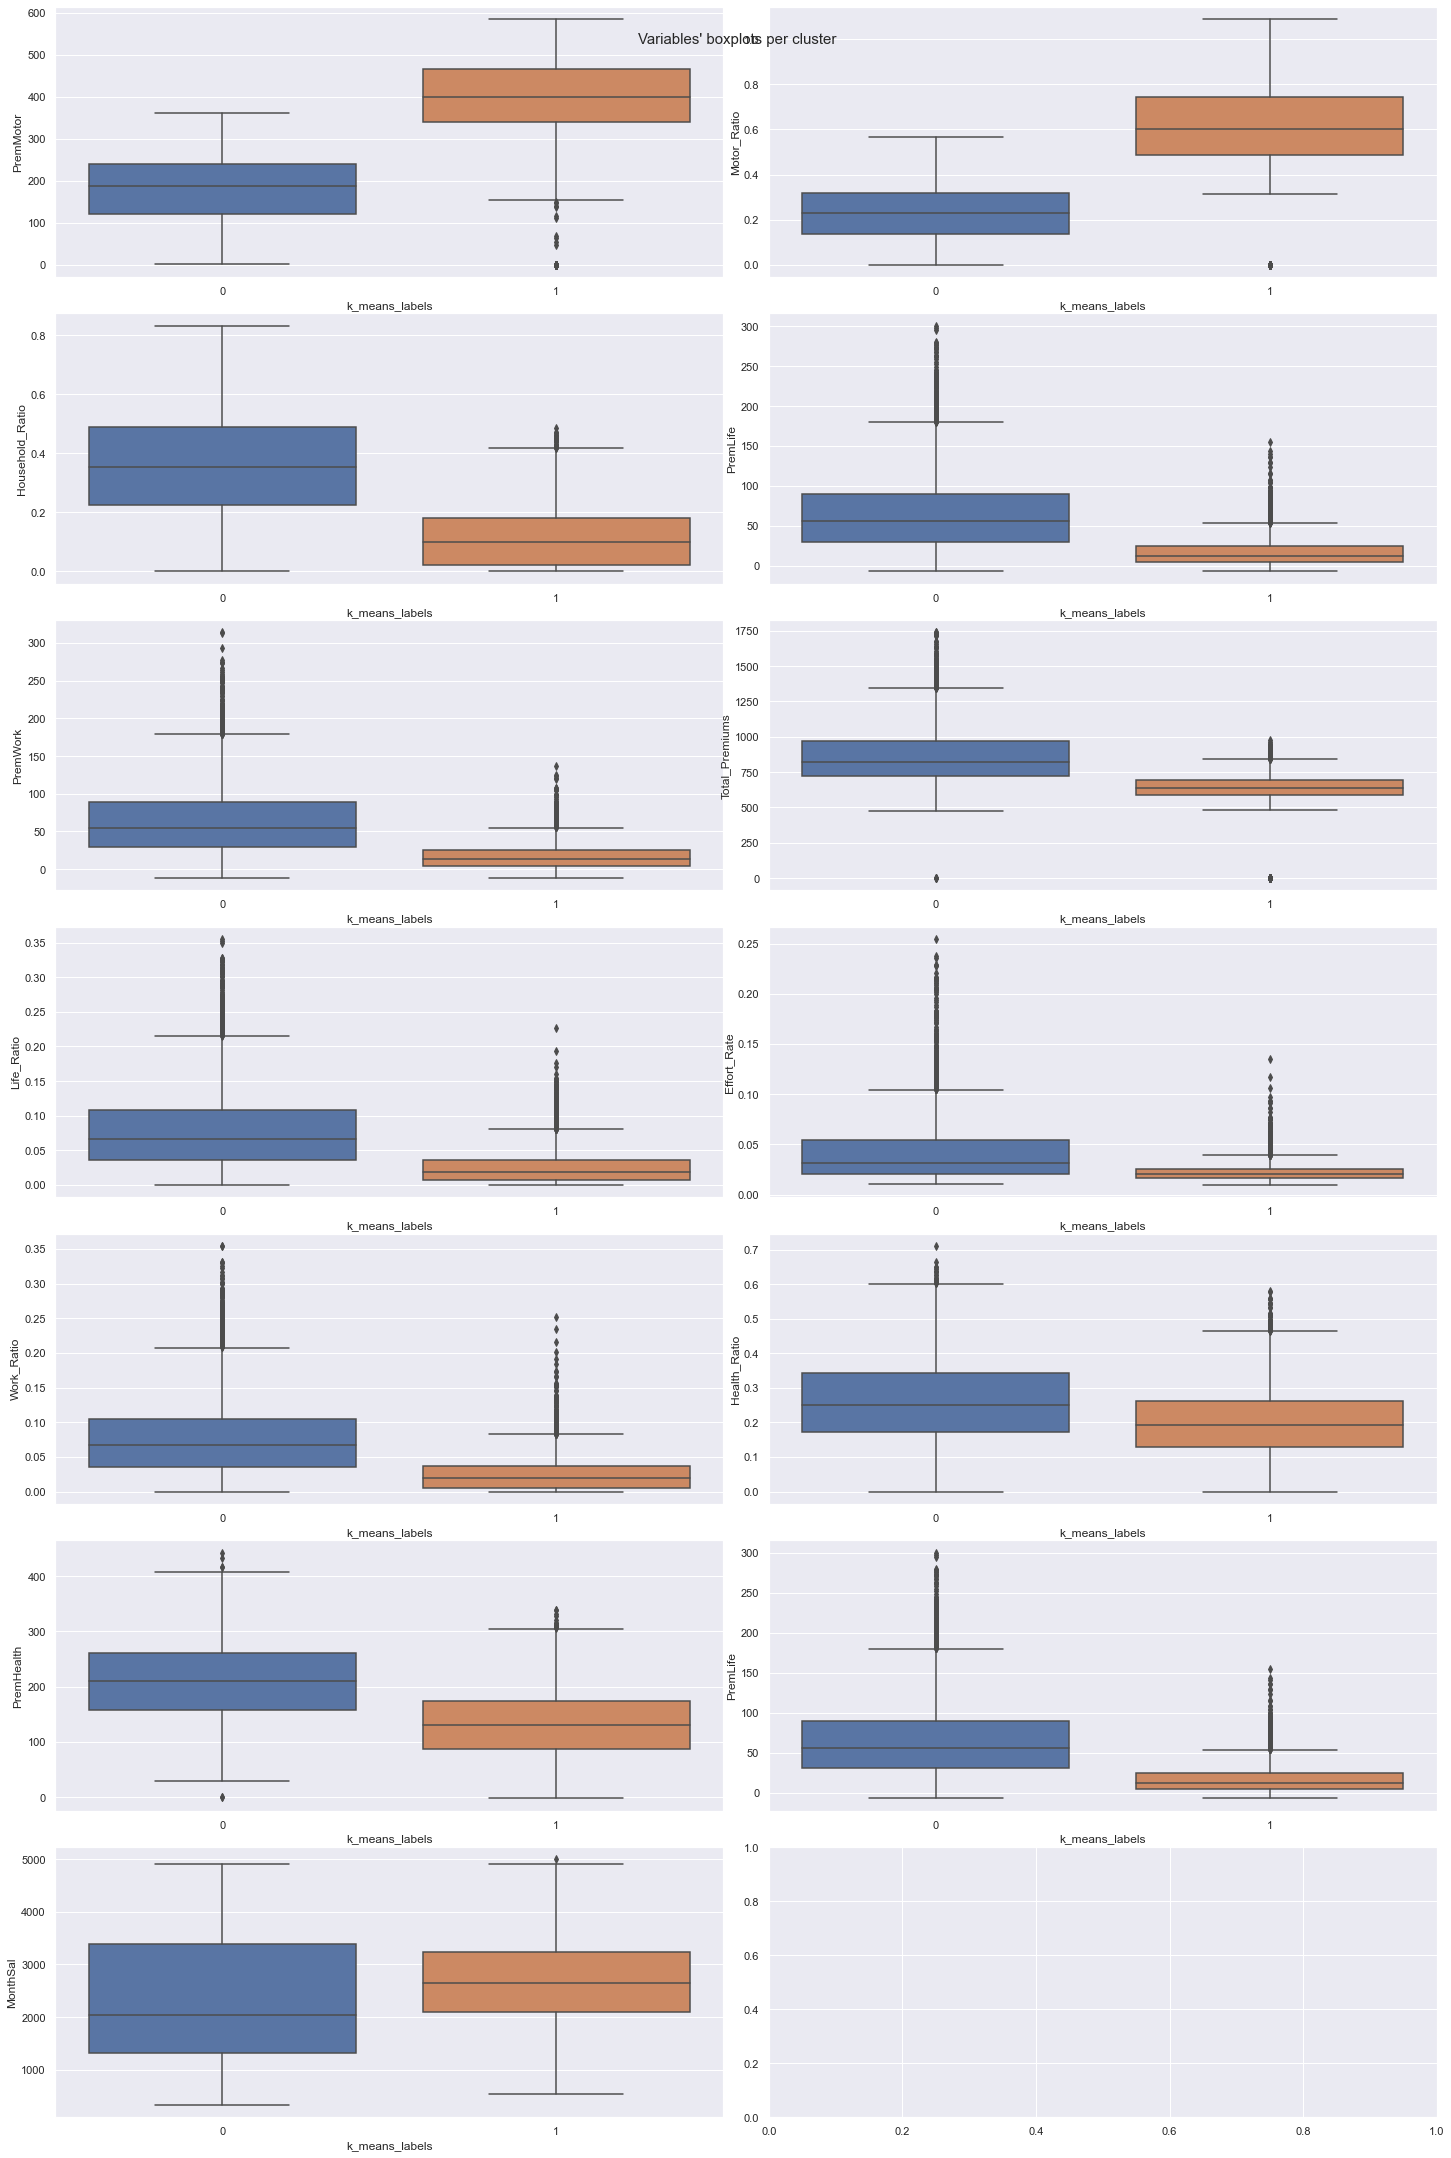

In [155]:
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(7,2, figsize=(20,30))
fig.tight_layout()
# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), variables_to_interpret):
    ax.set_title
    sns.boxplot(x="k_means_labels", y=feat, data=df_final_kmeans,ax=ax)

# Layout
# Add a centered title to the figure:

title = "Variables' boxplots per cluster"
plt.suptitle(title, fontsize=15)
plt.show()

### Kmeans Clustering solution interpretation for the Categorical Variables

In [156]:
aux_df2=df_b[non_metric_features_original].copy()
aux_df2['k_means_labels']=df_final_kmeans['k_means_labels'].copy()

### Contingency table: Categories vs Clusters and Chi-square test of independence

In [157]:
not_important=[]
for feature in non_metric_features_original:
    # Contingency table
    contingency = pd.crosstab(aux_df2[feature], aux_df2['k_means_labels'])

    # Chi-square test of independence: null hypothesis the categorical feature is independent from the cluster
    # ->if we reject then the feature is important for our model
    c, p, dof, expected = chi2_contingency(contingency)
    
    if p>0.05:
        not_important.append(feature)
        
print('The following variables were dropped according to the Chi-square test of independence:\n',not_important)

non_metric_features_original=[i for i in non_metric_features_original if i not in not_important]

for feature in non_metric_features:
    for var in not_important:
        if var in feature:
            non_metric_features.remove(feature)

The following variables were dropped according to the Chi-square test of independence:
 ['GeoLivArea']


### Frequency and Proportion barcharts of the categorical features and clusters obtained before

In [158]:
df_final_kmeans['Children'] = df_final_kmeans['Children'].apply(lambda x: float(x))
final_df['Children'] = final_df['Children'].apply(lambda x: float(x)) 

df_final_kmeans['EducDeg'] = df_final_kmeans['EducDeg'].apply(lambda x: float(x))
final_df['EducDeg'] = final_df['EducDeg'].apply(lambda x: float(x)) 

df_final_kmeans['Cancelled'] = df_final_kmeans['Cancelled'].apply(lambda x: float(x))
final_df['Cancelled'] = final_df['Cancelled'].apply(lambda x: float(x)) 

In [159]:
# Proportions of the categories of the categorical features among donors
aux_df3=final_df[non_metric_features].copy()
aux_df3['k_means_labels']=df_final_kmeans['k_means_labels'].copy()

aux_merge2=aux_df3.mean()
aux_merge2.name='Population'

pd.concat([aux_df3[non_metric_features+['k_means_labels']].groupby('k_means_labels').mean()*100,pd.DataFrame(aux_merge2).T]).T.iloc[:-1,:]

0           1  Population
x0_2.0       9.969325   10.259219    0.101275
x0_3.0      19.675723   20.408908    0.200757
x0_4.0      40.950920   39.631252    0.402310
EducDeg    216.695881  277.656079    2.499502
Children    61.963190   78.568821    0.710217
Cancelled    6.310254   34.958014    0.219379

In [160]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)

#     print(cont_tab)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    
   # p3 = plt.bar(categories, cont_tab.iloc[:-1, 2].values, 0.55, bottom=cont_tab.iloc[:-1, 0]+cont_tab.iloc[:-1, 1], color="blue")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart\n"+feature.upper())
    plt.xticks(rotation=90 )
    plt.ylabel("$Frequency$")

    
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart\n" + feature.upper())
    plt.xticks(rotation=90 )
    plt.ylabel("$p$")

    plt.show()


VARIABLE: EDUCDEG


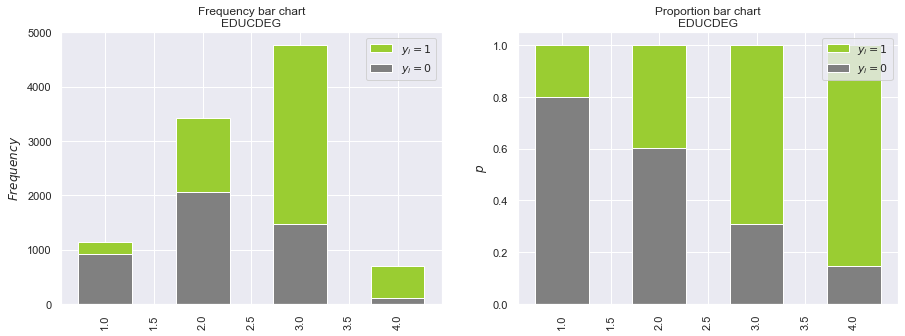

VARIABLE: CHILDREN


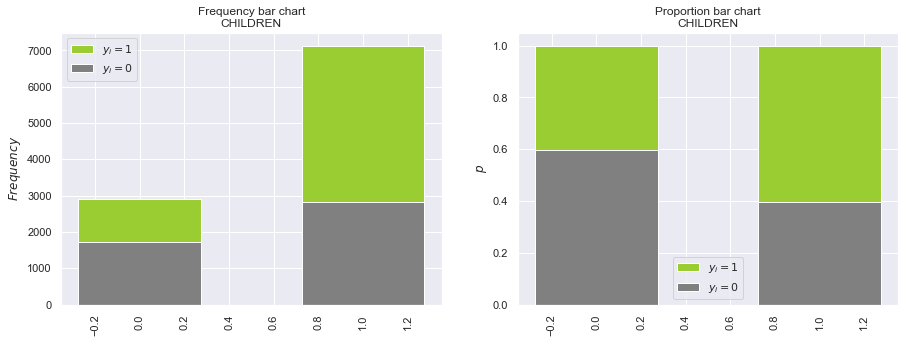

VARIABLE: CANCELLED


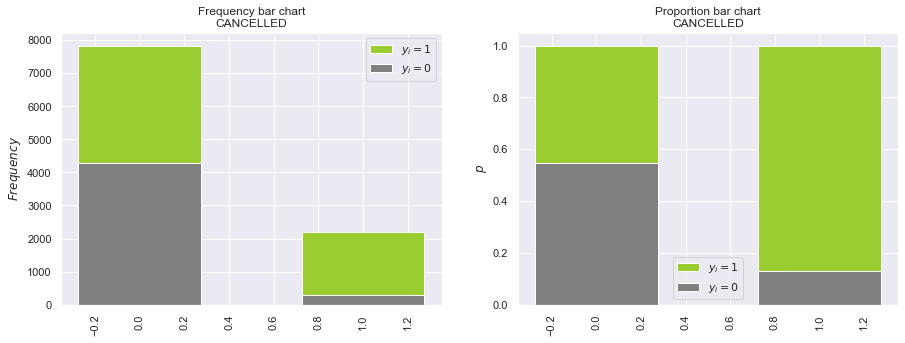

In [161]:
for feature in non_metric_features_original:
    print('VARIABLE:',feature.upper())
    
    bar_charts_categorical(aux_df2, feature, 'k_means_labels')

In [162]:
aux_df2['k_means_labels'].value_counts()

1    5478
0    4564
Name: k_means_labels, dtype: int64

### Visual representation of the choosen categorical features

In [163]:
#we are choosing to interpret the features that are not proportional
categorical_features_to_interpret = ['EducDeg','Cancelled','Children']

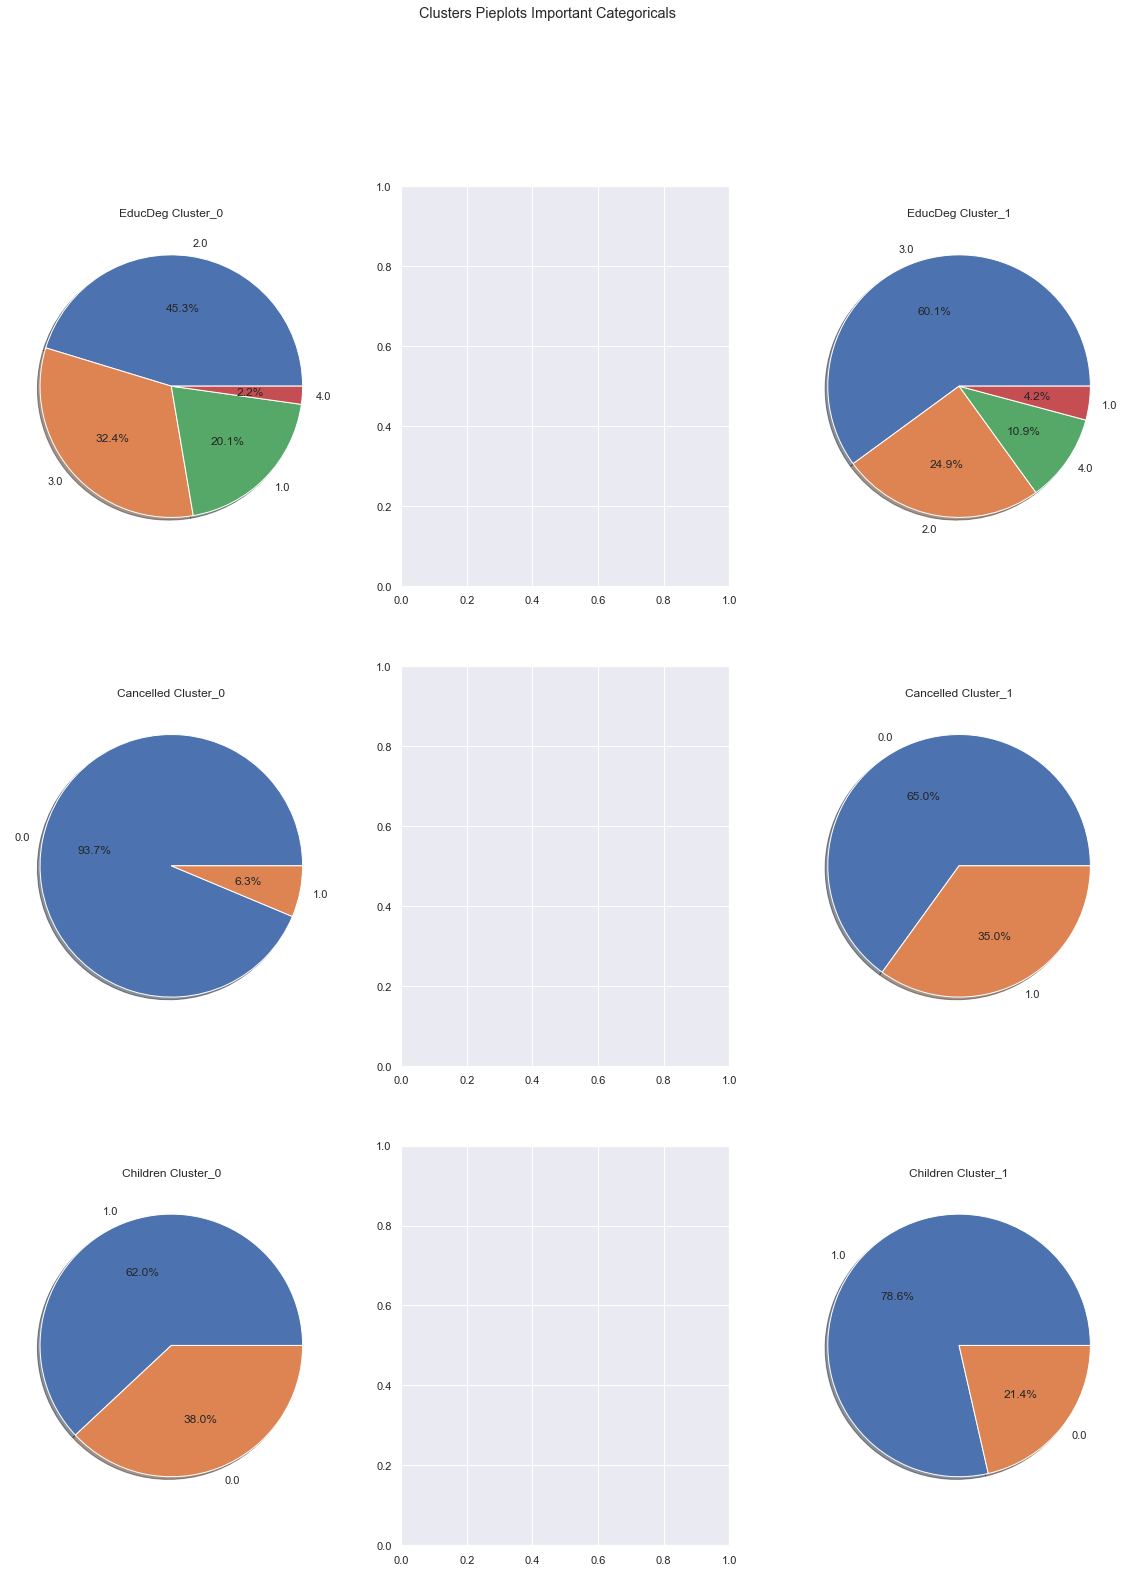

In [164]:
sns.set()


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(3, 3, figsize=(20, 25))


# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten("F"), categorical_features_to_interpret): # Notice the zip() function and flatten() method
    ax.pie(aux_df2[aux_df2["k_means_labels"]==0][feat].value_counts(), labels = aux_df2[aux_df2["k_means_labels"]==0][feat].value_counts().index, autopct='%1.1f%%', shadow=True, radius=1)
    ax.set_title(feat + " Cluster_0")
for ax, feat in zip(axes.flatten("F")[6:], categorical_features_to_interpret): # Notice the zip() function and flatten() method
    ax.pie(aux_df2[aux_df2["k_means_labels"]==1][feat].value_counts(), labels = aux_df2[aux_df2["k_means_labels"]==1][feat].value_counts().index, autopct='%1.1f%%', shadow=True, radius=1)
    ax.set_title(feat + " Cluster_1")


# fig.tight_layout()
# Layout
# Add a centered title to the figure:
title = "Clusters Pieplots Important Categoricals"
plt.suptitle(title)
plt.show()

### R^2

In [165]:
def get_ss(df):
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

sst = get_ss(df_concat[pc_features])  # get total sum of squares
ssw_labels = get_ss(df_concat[pc_features + ["k_means_labels"]].groupby(by='k_means_labels'))
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.3291140736883574

### Visual Representation of the clusters

<AxesSubplot:xlabel='PC0', ylabel='PC1'>

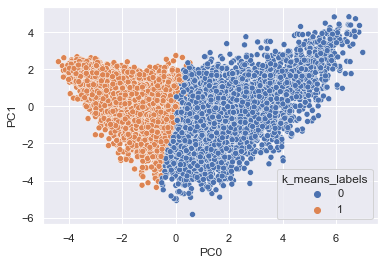

In [166]:
# representation of the clusters on the first 2 PC´s:
sns.scatterplot(x="PC0", y="PC1",hue="k_means_labels",data=df_final_kmeans)

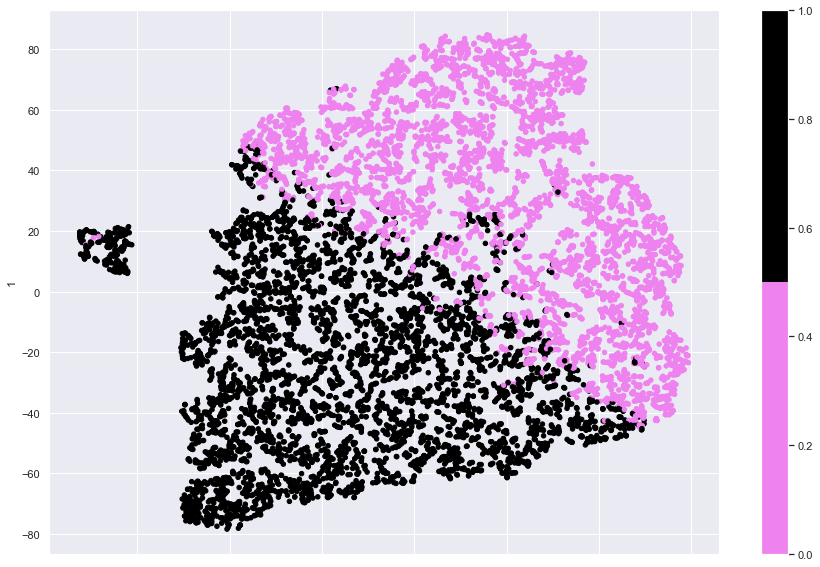

In [167]:
# Cluster visualization using t-SNE
two_dim = TSNE(random_state=42, n_jobs=-1).fit_transform(df_concat[metric_features])#2d representation-> how well our cluster solution
#  fits the intrinsic distribution of our data

# colors:
from matplotlib import colors
cmap = colors.ListedColormap(['violet','black'])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_concat['k_means_labels'], colormap=cmap, figsize=(15,10))

plt.show()

### Visualizing the removed outliers in the clustering solution

In [168]:
scaler2 = StandardScaler()
scaler2.fit(df_final_kmeans[metric_features])
scaled_feat2 = scaler2.transform(df_final_kmeans[metric_features])
df_final_kmeans[metric_features]=scaled_feat2
df_final_kmeans[metric_features]

MonthSal  Effort_Rate  Motor_Ratio  Household_Ratio  Health_Ratio  \
CustID                                                                       
1.0     -0.347778    -0.255698     0.520446        -0.561231     -0.066590   
2.0     -1.893242     3.154141    -1.384941         1.247218     -0.881845   
3.0     -0.244748    -0.191659    -0.617019         0.423398     -0.525591   
4.0     -1.458452     0.534069    -0.515992        -0.814167      2.580715   
5.0     -0.774326    -0.087836     0.414900        -0.793824      0.557401   
...           ...          ...          ...              ...           ...   
10291.0 -1.945788     5.566162    -1.701693         2.412296     -1.316384   
10292.0  0.693864    -0.598306     0.715125        -0.787860      0.386396   
10294.0  0.415681    -0.475799     0.580092        -0.178836     -0.205057   
10295.0 -0.560022     0.031021    -0.756000         0.259152      0.253819   
10296.0  0.309559    -0.478250     0.733847        -0.445012     -0.146026   

         Life_Ratio  Work_Ratio  PremMotor  PremHealth  PremLife  PremWork  \
CustID                                                                       
1.0        0.404286   -0.473342   0.551386   -0.287142  0.167621 -0.509455   
2.0        3.176110    1.353524  -1.632011   -0.683179  3.516126  1.572182   
3.0        1.296086    1.698321  -0.690353   -0.577863  1.060889  1.406333   
4.0        0.175354   -0.036249  -0.863552    1.912755 -0.097362 -0.242369   
5.0       -0.387091    0.338506   0.278965    0.196459 -0.473379  0.063439   
...             ...         ...        ...         ...       ...       ...   
10291.0    0.717047    2.114916  -2.148390   -0.864179  1.666467  3.791212   
10292.0   -0.670400   -0.520244   0.682292    0.079263 -0.677736 -0.558673   
10294.0   -0.613091   -0.841290   0.754660   -0.342002 -0.612115 -0.789370   
10295.0    0.633780    1.938952  -0.818844    0.407092  0.551131  1.730335   
10296.0   -0.766517   -0.596147   0.831125   -0.355350 -0.743358 -0.602760   

         Total_Premiums  
CustID                   
1.0           -0.322134  
2.0            0.852256  
3.0            0.036979  
4.0           -0.632624  
5.0           -0.495947  
...                 ...  
10291.0        2.727452  
10292.0       -0.436988  
10294.0       -0.175311  
10295.0        0.201221  
10296.0       -0.302991  

[10042 rows x 12 columns]

In [169]:
outliers_backup = outliers_df.copy()

In [170]:
# scalling our outliers based on our data, because they were removed before scalling
scaled_outliers = scaler2.transform(outliers_df[metric_features])
outliers_df[metric_features] = scaled_outliers

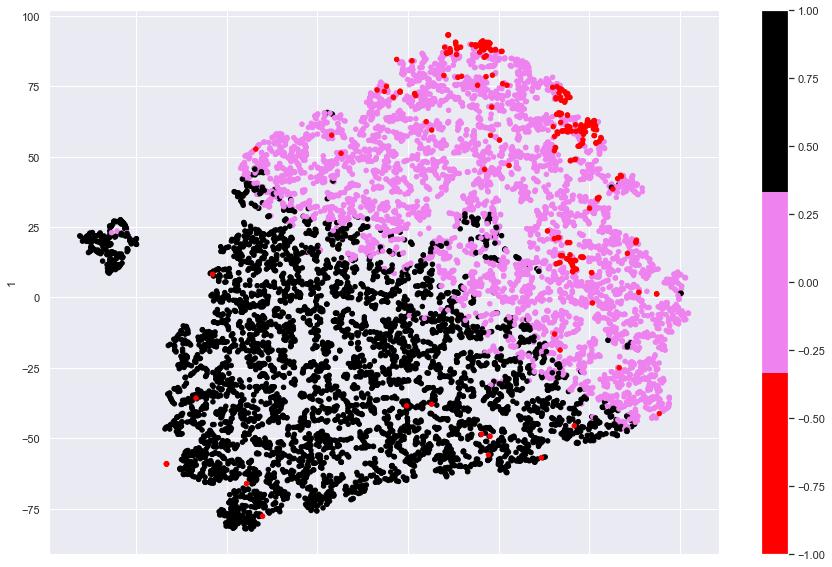

In [171]:
# Cluster visualization using t-SNE

outliers_df['k_means_labels']=-1 # assigning the outliers to a new group, so that when plotting we can distinguish them........
df_merged = pd.concat([df_final_kmeans[metric_features+['k_means_labels']],outliers_df[metric_features+['k_means_labels']]])


two_dim = TSNE(random_state=42, n_jobs=-1).fit_transform(df_merged[metric_features])#2d representation-> how well our cluster solution
#  fits the intrinsic distribution of our data

# colors:
from matplotlib import colors
cmap2 = colors.ListedColormap(['red', 'violet','black'])

# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=df_merged['k_means_labels'], colormap=cmap2, figsize=(15,10))

plt.show()

### Labelling our Clusters

In [172]:
# Getting the variables with their non-scaled values
df_final_kmeans[metric_features]= scaler2.inverse_transform(df_final_kmeans[metric_features]) 

labels_dictionary = {0:'Cluster 0 ', 
                 1:'Cluster 1 '}

df_final_kmeans['K MEANS LABELS'] = df_final_kmeans['k_means_labels'].map(labels_dictionary)

df_final_kmeans[['K MEANS LABELS']+metric_features+non_metric_features_original]

K MEANS LABELS  MonthSal  Effort_Rate  Motor_Ratio  Household_Ratio  \
CustID                                                                        
1.0         Cluster 1     2177.0     0.025477     0.564712         0.119373   
2.0         Cluster 0      677.0     0.112132     0.085031         0.456881   
3.0         Cluster 0     2277.0     0.027104     0.278355         0.303133   
4.0         Cluster 0     1099.0     0.045547     0.303789         0.072168   
5.0         Cluster 1     1763.0     0.029743     0.538141         0.075965   
...                ...       ...          ...          ...              ...   
10291.0     Cluster 0      626.0     0.173429     0.005289         0.674317   
10292.0     Cluster 1     3188.0     0.016770     0.613723         0.077078   
10294.0     Cluster 1     2918.0     0.019883     0.579728         0.190739   
10295.0     Cluster 0     1971.0     0.032763     0.243367         0.272480   
10296.0     Cluster 1     2815.0     0.019821     0.618436         0.141063   

         Health_Ratio  Life_Ratio  Work_Ratio  PremMotor  PremHealth  \
CustID                                                                 
1.0          0.219905    0.070632    0.025377     375.85      146.36   
2.0          0.128096    0.213489    0.116503      77.46      116.69   
3.0          0.168215    0.116595    0.133702     206.15      124.58   
4.0          0.518030    0.058833    0.047180     182.48      311.17   
5.0          0.290175    0.029846    0.065873     338.62      182.59   
...               ...         ...         ...        ...         ...   
10291.0      0.079160    0.086752    0.154483       6.89      103.13   
10292.0      0.270918    0.015244    0.023038     393.74      173.81   
10294.0      0.204312    0.018198    0.007023     403.63      142.25   
10295.0      0.255988    0.082460    0.145705     188.59      198.37   
10296.0      0.210959    0.010290    0.019251     414.08      141.25   

         PremLife  PremWork  Total_Premiums  EducDeg  Children  Cancelled  
CustID                                                                     
1.0         47.01     16.89          665.56      2.0       1.0        0.0  
2.0        194.48    106.13          910.96      2.0       1.0        0.0  
3.0         86.35     99.02          740.60      1.0       0.0        0.0  
4.0         35.34     28.34          600.68      3.0       1.0        0.0  
5.0         18.78     41.45          629.24      3.0       1.0        0.0  
...           ...       ...             ...      ...       ...        ...  
10291.0    113.02    201.26         1302.80      1.0       1.0        0.0  
10292.0      9.78     14.78          641.56      4.0       0.0        0.0  
10294.0     12.67      4.89          696.24      3.0       1.0        0.0  
10295.0     63.90    112.91          774.92      1.0       1.0        0.0  
10296.0      6.89     12.89          669.56      4.0       1.0        0.0  

[10042 rows x 16 columns]

### Other Clustering Solutions

In [173]:
# updating: non metric features as dummies:
non_metric_features = df.columns[(~df.columns.isin(metric_features)) & ~(df.columns.isin(pc_features))].tolist()

# updating: non metric features in their categorical form:
non_metric_features_original = df_b.loc[:,~(df_b.columns.isin(metric_features))].columns.tolist()

### Kmeans for a big k + Hierarchical Clustering

In [174]:
kmclust = KMeans(n_clusters=100, init='k-means++', n_init=15, random_state=1,n_jobs=-1) 
big_k_kmeans_labels = kmclust.fit_predict(df[pc_features])
big_k_kmeans_labels

array([ 9,  2, 49, ..., 46, 36, 46])

In [175]:
# Reduced Observations:
df_concat_big_k = df.copy()
df_concat_big_k['big_k_means_labels'] = big_k_kmeans_labels

reduced_obs_df = df_concat_big_k.groupby('big_k_means_labels').mean() # getting the clusters centers, which now are my new
                                                                    # observations to be used for the HC, same results as if I
                                                                    #were to use kmclust.cluster_centers_ to get them
reduced_obs_df # Df we are going to use for the hierarchical clustering

PC0       PC1       PC2       PC3       PC4  \
big_k_means_labels                                                     
0                   1.245600 -2.778717  1.385810 -0.014123 -0.299096   
1                  -0.952220  0.759873 -0.643948  0.010898 -0.971949   
2                   4.802348  1.517218  1.335876 -0.428243  0.383726   
3                  -2.065509  0.356509  0.142979  0.055262  1.365166   
4                   2.026042 -0.253115 -0.524195 -0.008382  0.267730   
...                      ...       ...       ...       ...       ...   
95                 -2.107867  0.717618  0.122703 -0.051722 -0.870517   
96                  2.326504 -0.348746  2.674712  3.408219 -1.444255   
97                 -1.531798  0.497324  1.138515  0.145601 -0.049718   
98                 -2.033578  1.338213 -0.082819  0.039093 -0.103585   
99                  2.347384 -1.796586  1.056133  1.994425  1.394396   

                    MonthSal  Effort_Rate  Motor_Ratio  Household_Ratio  \
big_k_means_labels                                                        
0                   1.116309    -0.596166    -0.656570        -0.681447   
1                   0.553378    -0.359477     0.185406         0.525507   
2                  -1.432054     1.494380    -1.377089         1.253367   
3                  -0.834543    -0.075041     0.823615        -1.125562   
4                  -0.799682     0.367288    -0.886059         0.900383   
...                      ...          ...          ...              ...   
95                  0.982974    -0.555906     0.882832        -0.362977   
96                  0.935546    -0.491406    -0.731672         0.016587   
97                  0.352070    -0.477310     0.390282        -0.951804   
98                 -0.036119    -0.317755     0.956816        -0.302173   
99                 -1.073762     0.349492    -0.855043        -0.433132   

                    Health_Ratio  Life_Ratio  Work_Ratio  PremMotor  \
big_k_means_labels                                                    
0                       1.765302    1.042195    1.023025  -0.958500   
1                      -0.662593   -0.518533   -0.446252   0.608398   
2                      -0.632907    1.967950    1.559740  -1.616066   
3                      -0.221686   -0.603867   -0.618211   0.849461   
4                       0.279774    0.366623    0.328409  -0.882104   
...                          ...         ...         ...        ...   
95                     -0.725073   -0.509860   -0.496572   1.053751   
96                     -0.069401   -0.044353    3.709366  -0.893462   
97                     -0.747820   -0.184667   -0.006113   0.413109   
98                     -0.923849   -0.602805   -0.533672   1.187696   
99                      1.620054    0.131940    2.242009  -1.158100   

                    PremHealth  PremLife  PremWork  Total_Premiums    x0_2.0  \
big_k_means_labels                                                             
0                     1.369353  0.622862  0.614635       -0.460203  0.120000   
1                    -0.612398 -0.495304 -0.419285        0.330971  0.078125   
2                    -0.317956  2.381051  1.942596        0.985394  0.114754   
3                    -0.361137 -0.639825 -0.654920       -1.128063  0.120253   
4                     0.731087  0.460141  0.425217        0.616904  0.109890   
...                        ...       ...       ...             ...       ...   
95                   -0.921704 -0.549957 -0.533352       -0.253355  0.087179   
96                   -0.129085 -0.095443  3.198190        0.013028  0.120000   
97                   -0.903993 -0.266532 -0.079175       -1.161092  0.120000   
98                   -1.111852 -0.622539 -0.562063       -0.213178  0.077236   
99                    1.377506 -0.036186  1.642671       -0.327927  0.146341   

                      x0_3.0    x0_4.0  
big_k_means_labels                      
0                   0.280000  0.320000  
1                   0.17

### Hierarchical Clustering

In [176]:
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    """This function computes the R2 for a set of cluster solutions given by the application of a hierarchical method.
    The R2 is a measure of the homogenity of a cluster solution. It is based on SSt = SSw + SSb and R2 = SSb/SSt. 
    
    Parameters:
    df (DataFrame): Dataset to apply clustering
    link_method (str): either "ward", "complete", "average", "single"
    max_nclus (int): maximum number of clusters to compare the methods
    min_nclus (int): minimum number of clusters to compare the methods. Defaults to 1.
    dist (str): distance to use to compute the clustering solution. Must be a valid distance. Defaults to "euclidean".
    
    Returns:
    ndarray: R2 values for the range of cluster solutions
    """
    def get_ss(df):
        ss = np.sum(df.var() * (df.shape[0] - 1))  # =some of squares total if we pass all data, and sum of squares wwithin if 
                                                                                                         # we pass the clusters
        return ss  # return sum of sum of squares of each df variable
    
    sst = get_ss(df)  # get total sum of squares
    
    r2 = []  # where we will store the R2 metrics for each cluster solution
    
    for i in range(min_nclus, max_nclus+1):  # iterate over desired ncluster range
        cluster = AgglomerativeClustering(n_clusters=i, affinity=dist, linkage=link_method)
        hclabels = cluster.fit_predict(df) #get cluster labels
        df_concat = pd.concat((df, pd.Series(hclabels, name='labels')), axis=1)  # concat df with labels
        ssw_labels = df_concat.groupby(by='labels').apply(get_ss)  # compute ssw for each cluster labels
        ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
        r2.append(ssb / sst)  # save the R2 of the given cluster solution
        
    return np.array(r2)

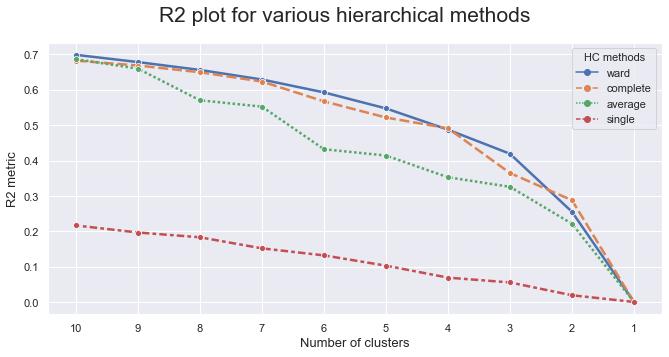

In [177]:
# Prepare input
hc_methods = ["ward", "complete", "average", "single"]
# Call function defined above to obtain the R2 statistic for each hc_method
max_nclus = 10
r2_hc_methods = np.vstack([get_r2_hc(df=reduced_obs_df[pc_features], link_method=link, max_nclus=max_nclus) for link in hc_methods]).T
r2_hc_methods = pd.DataFrame(r2_hc_methods, index=range(1, max_nclus + 1), columns=hc_methods)

sns.set()
# Plot data
fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

# Finalize the plot
fig.suptitle("R2 plot for various hierarchical methods", fontsize=21)
plt.gca().invert_xaxis()  # invert x axis
plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

plt.show()

# clearly by looking at the R^2 value for the different linkage methods the ward is the best one

In [178]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'
hclust = AgglomerativeClustering(linkage=linkage, affinity=distance, distance_threshold=0, n_clusters=None)
hclust.fit(reduced_obs_df[pc_features])
# hclust.fit_predict(reduced_obs_df[pc_features])

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

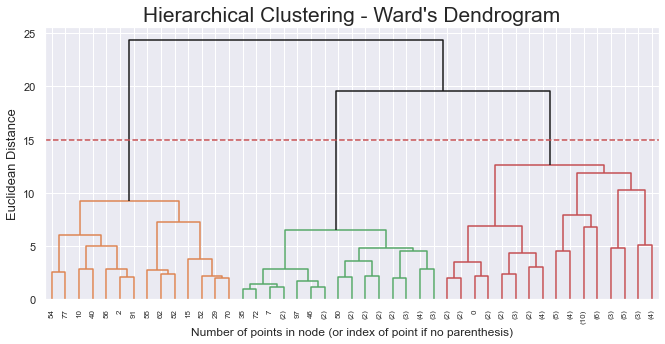

In [179]:
# create the counts of samples under each node (number of points being merged)
counts = np.zeros(hclust.children_.shape[0])
n_samples = len(hclust.labels_)

# hclust.children_ contains the observation ids that are being merged together
# At the i-th iteration, children[i][0] and children[i][1] are merged to form node n_samples + i
for i, merge in enumerate(hclust.children_):
    # track the number of observations in the current cluster being formed
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            # If this is True, then we are merging an observation
            current_count += 1  # leaf node
        else:
            # Otherwise, we are merging a previously formed cluster
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

# the hclust.children_ is used to indicate the two points/clusters being merged (dendrogram's u-joins)
# the hclust.distances_ indicates the distance between the two points/clusters (height of the u-joins)
# the counts indicate the number of points being merged (dendrogram's x-axis)
linkage_matrix = np.column_stack(
    [hclust.children_, hclust.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
# The Dendrogram parameters need to be tuned
y_threshold = 15
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering - {linkage.title()}\'s Dendrogram', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

In [180]:
# 3 cluster solution
linkage = 'ward'
distance = 'euclidean'
hc3lust = AgglomerativeClustering(linkage=linkage, affinity=distance, n_clusters=3)
hc3_labels = hc3lust.fit_predict(reduced_obs_df[pc_features])

In [181]:
# Characterizing the 3 clusters
df_concat = pd.concat((reduced_obs_df[metric_features], pd.Series(hc3_labels, name='labels')), axis=1)
df_concat.groupby('labels').mean()

MonthSal  Effort_Rate  Motor_Ratio  Household_Ratio  Health_Ratio  \
labels                                                                      
0      -0.078834     0.117045    -0.698958         0.418514      0.518494   
1      -1.463150     2.230205    -1.422385         1.809480     -0.870767   
2       0.108135    -0.293829     0.542029        -0.476014     -0.303149   

        Life_Ratio  Work_Ratio  PremMotor  PremHealth  PremLife  PremWork  \
labels                                                                      
0         0.501757    0.497156  -0.762677    0.679859  0.454004  0.444589   
1         1.173610    1.193443  -1.618771   -0.409929  1.759406  1.741838   
2        -0.352455   -0.399063   0.630264   -0.467957 -0.387738 -0.433398   

        Total_Premiums  
labels                  
0             0.336637  
1             1.856862  
2            -0.469771

In [182]:
aux_dictionary=df_concat['labels'].to_dict()
df_concat_big_k['labels']=df_concat_big_k['big_k_means_labels'].map(aux_dictionary)
df_concat_big_k['labels']

CustID
1.0        2
2.0        1
3.0        0
4.0        0
5.0        2
          ..
10291.0    1
10292.0    2
10294.0    2
10295.0    0
10296.0    2
Name: labels, Length: 10042, dtype: int64

In [183]:
df_concat_big_k['labels'].value_counts()

2    5065
0    4365
1     612
Name: labels, dtype: int64

In [184]:
# ANALYSING THE HC CLUSTERING SOLUTION FOR THE METRIC FEATURES:
df_final_hc = df_not_standardized.loc[df_concat_big_k.index,:] # getting the original values of our variables to interpret them
                                                            # and making sure the observations are the same
df_final_hc['labels']=df_concat_big_k['labels'].copy()
df_final_hc[variables_to_interpret+['labels']].groupby('labels').mean()

PremMotor  Motor_Ratio  Household_Ratio    PremLife    PremWork  \
labels                                                                     
0       206.182351     0.270772         0.302719   54.465196   53.146532   
1        74.941748     0.070194         0.569562  118.497794  123.527958   
2       409.028314     0.618013         0.114633   17.311343   16.060569   

        Total_Premiums  Life_Ratio  Effort_Rate  Work_Ratio  Health_Ratio  \
labels                                                                      
0           802.117400    0.069399     0.033383    0.068137      0.289647   
1          1131.234559    0.112383     0.098141    0.118409      0.129551   
2           625.064531    0.025339     0.022767    0.024097      0.185587   

        PremHealth    PremLife     MonthSal  
labels                                       
0       221.635281   54.465196  2566.792669  
1       138.742386  118.497794  1067.738562  
2       125.058375   17.311343  2644.339980

### Visual Analysis of the metric features´ results of the kmeans+HC

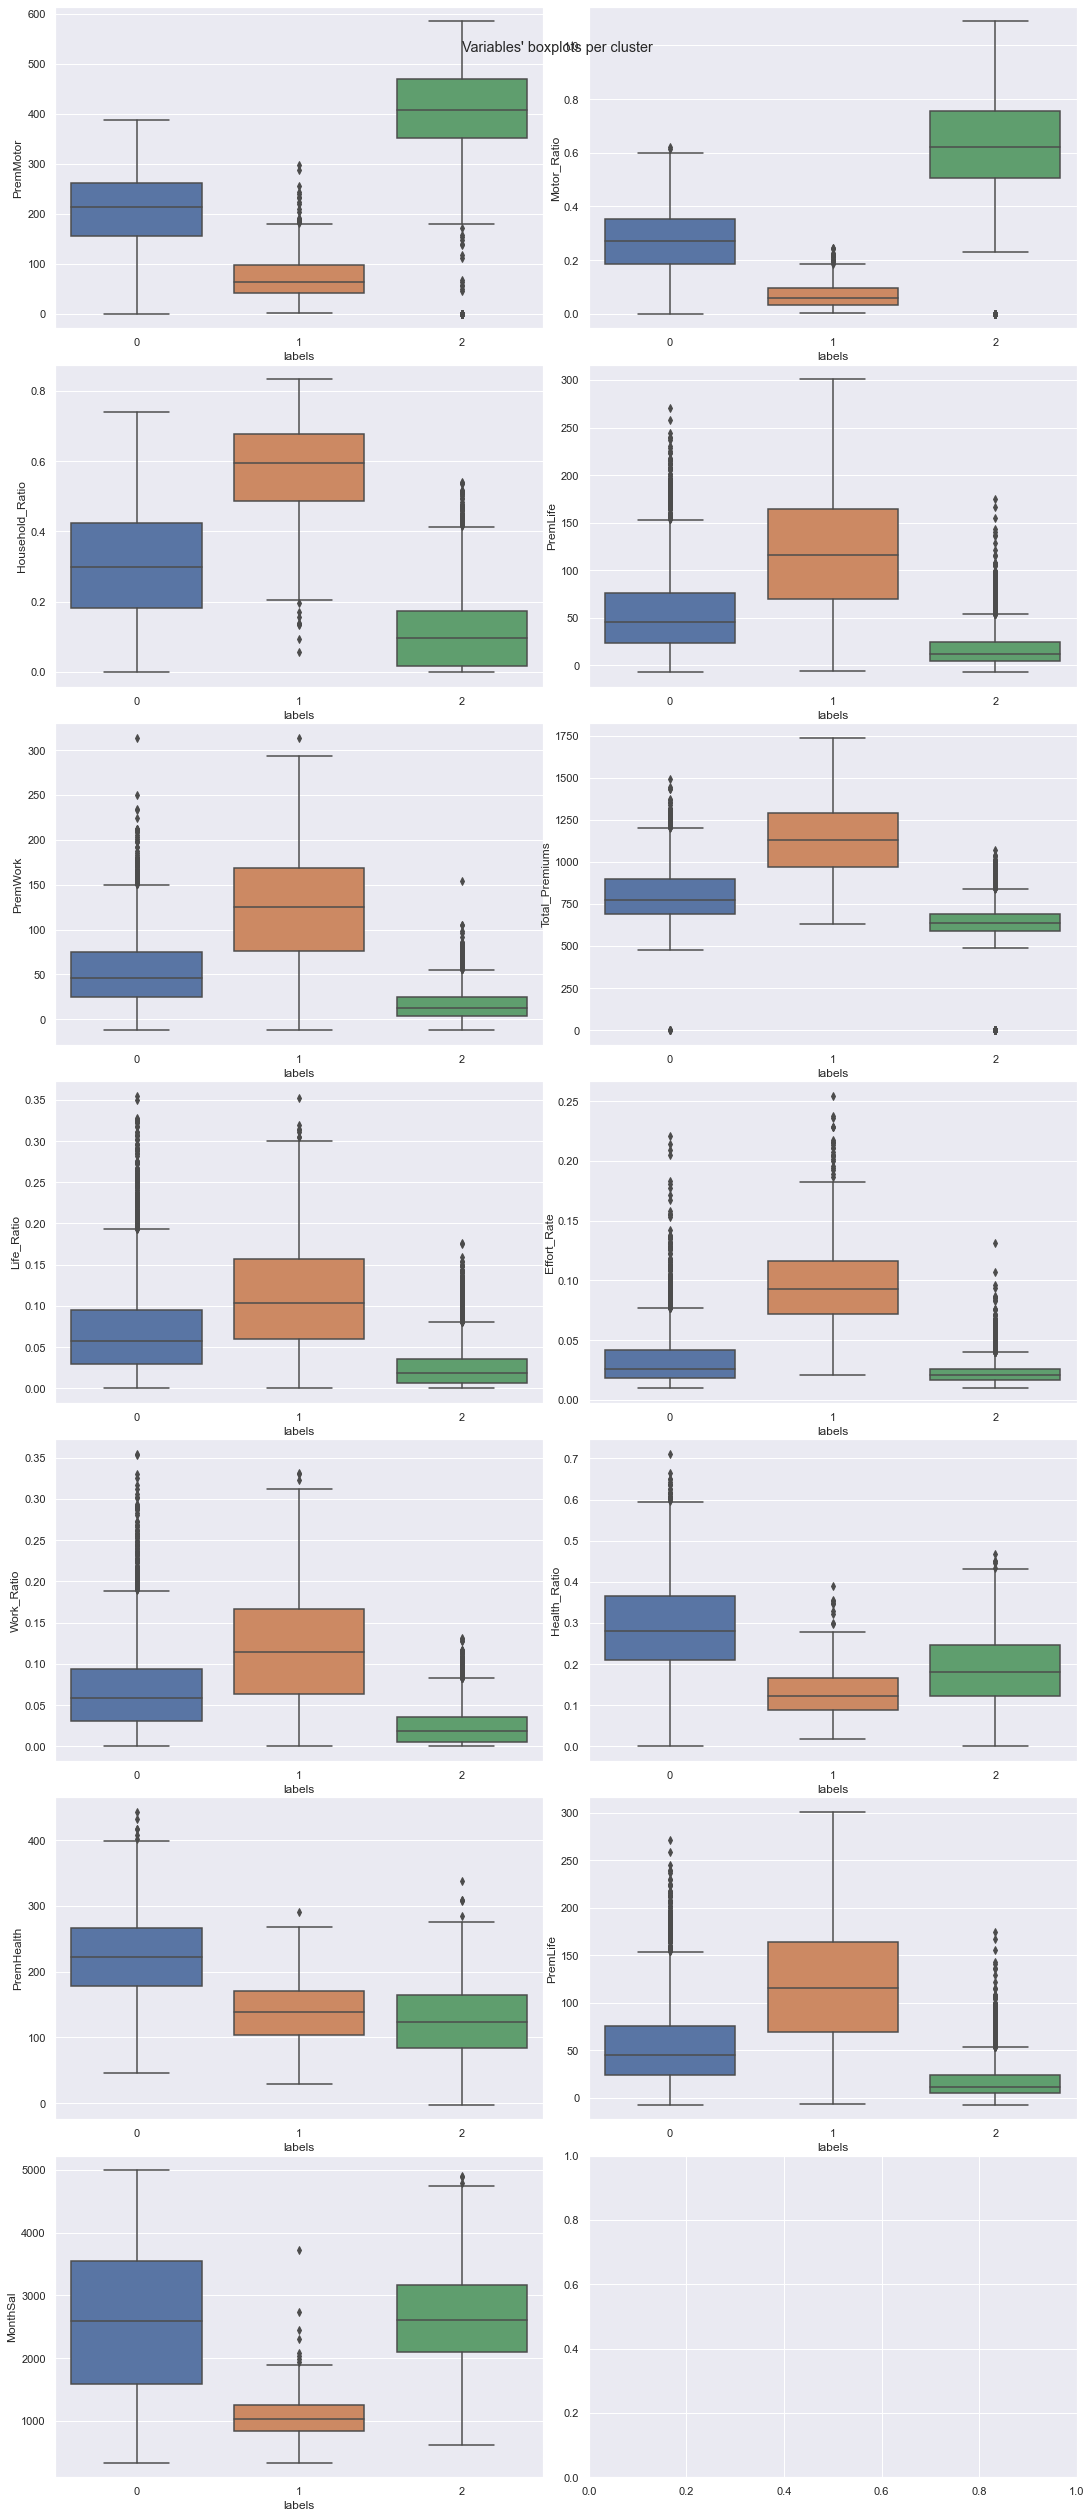

In [185]:
sns.set()

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(7,2, figsize=(15,35))
fig.tight_layout()
# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten(), variables_to_interpret):
    sns.boxplot(x="labels", y=feat, data=df_final_hc,ax=ax)

# Layout
# Add a centered title to the figure:
title = "Variables' boxplots per cluster"
plt.suptitle(title)
plt.show()

### Hierachical Clustering solution interpretation for the Categorical Variables

In [186]:
aux_df2=df_b[non_metric_features_original].copy()
aux_df2['labels']=df_final_hc['labels'].copy()

### Contingency table: Categories vs Clusters and Chi-square test of independence

In [187]:
not_important=[]
for feature in non_metric_features_original:
    # Contingency table
    contingency = pd.crosstab(aux_df2[feature], aux_df2['labels'])

    # Chi-square test of independence: null hypothesis the categorical feature is independent from the cluster
    # ->if we reject then the feature is important for our model
    c, p, dof, expected = chi2_contingency(contingency)
    
    if p>0.05:
        not_important.append(feature)
        
print('The following variables were dropped according to the Chi-square test of independence:\n',not_important)

non_metric_features_original=[i for i in non_metric_features_original if i not in not_important]

for feature in non_metric_features:
    for var in not_important:
        if var in feature:
            non_metric_features.remove(feature)

The following variables were dropped according to the Chi-square test of independence:
 ['GeoLivArea']


### Frequency and Proportion barcharts of the categorical features and clusters obtained before

In [188]:
# Proportions of the categories of the categorical features among donors
df_concat_big_k[non_metric_features+['labels']].groupby('labels').mean()*100

x0_2.0     x0_3.0     x0_4.0
labels                                 
0        9.690722  19.816724  41.191294
1       10.784314  21.078431  39.379085
2       10.424482  20.177690  39.506417

In [189]:
def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
#     print(cont_tab)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    
    p3 = plt.bar(categories, cont_tab.iloc[:-1, 2].values, 0.55, bottom=cont_tab.iloc[:-1, 0]+cont_tab.iloc[:-1, 1], color="blue")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="yellowgreen")
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gray")
    plt.legend((p3[0], p2[0], p1[0]), ('$y_i=2$','$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart\n"+feature.upper())
    plt.xticks(rotation=90 )
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 3].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 3].values),
                       np.divide(cont_tab.iloc[:-1, 2].values, cont_tab.iloc[:-1, 3].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gray")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="yellowgreen")
    p3 = plt.bar(categories, obs_pct[2], 0.55, bottom=obs_pct[0]+obs_pct[1], color="blue")
    plt.legend((p3[0],p2[0], p1[0]), ('$y_i=2$','$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart\n" + feature.upper())
    plt.xticks(rotation=90 )
    plt.ylabel("$p$")

    plt.show()

VARIABLE: EDUCDEG


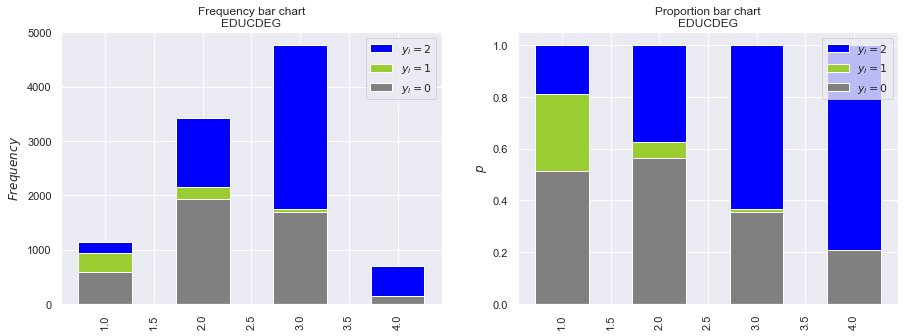

VARIABLE: CHILDREN


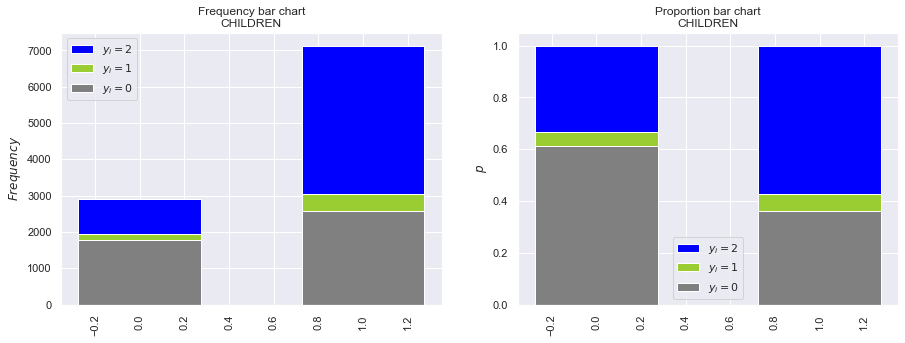

VARIABLE: CANCELLED


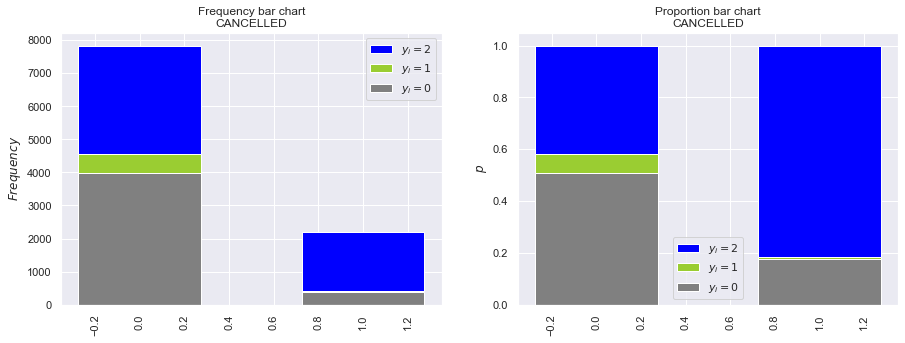

In [190]:
for feature in non_metric_features_original:
    print('VARIABLE:',feature.upper())
    
    bar_charts_categorical(aux_df2, feature, 'labels')

### Visual representation of the choosen categorical features

In [191]:
categorical_features_to_interpret = ['EducDeg', 'Cancelled', 'Children']

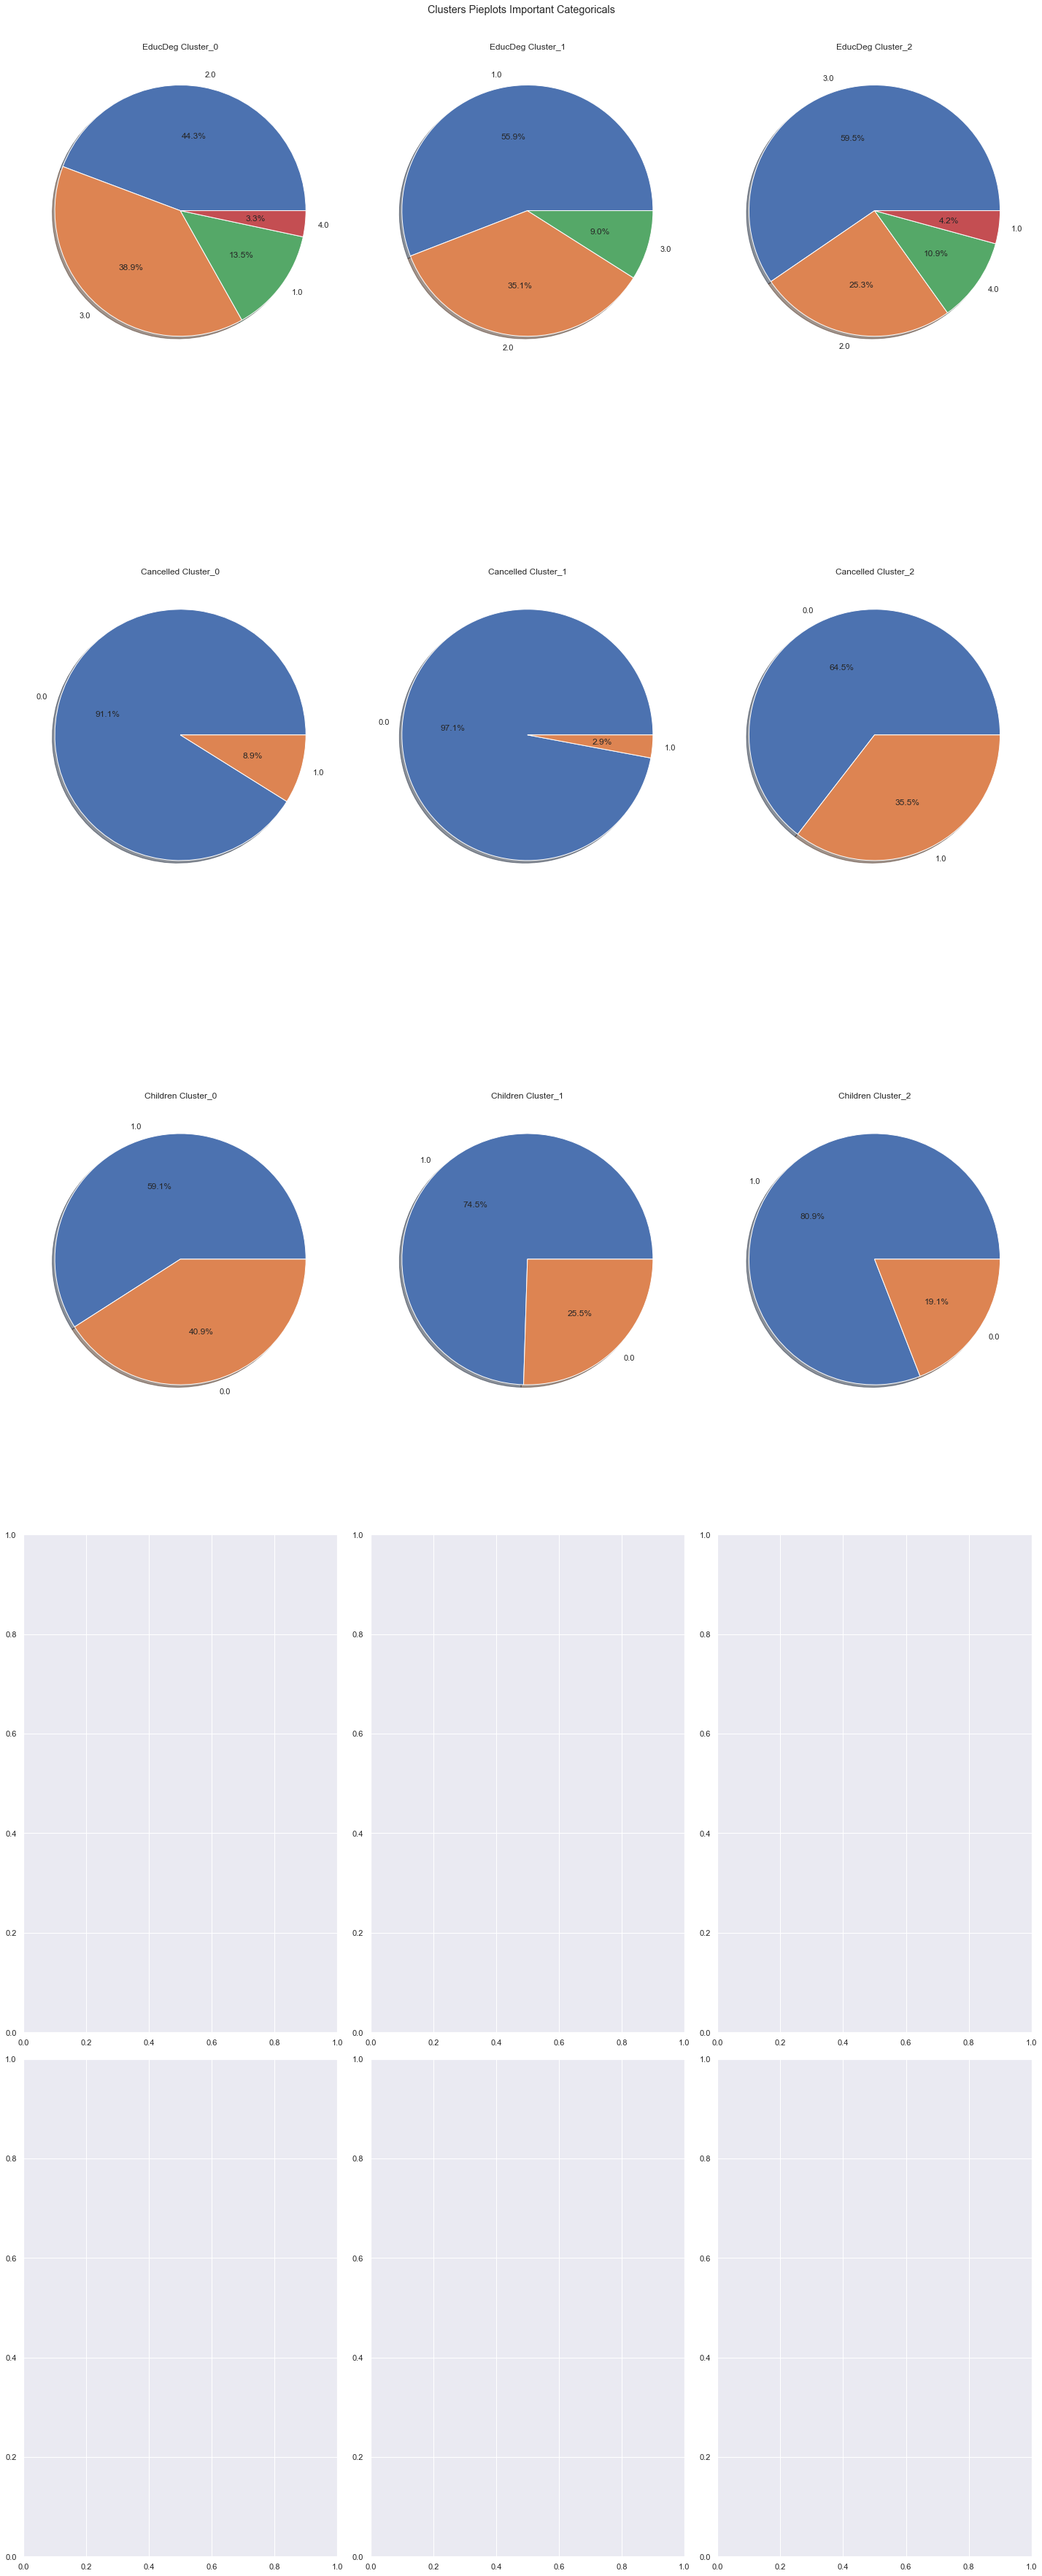

In [192]:
sns.set()


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(5, 3, figsize=(20, 50))


# Plot data
# Iterate across axes objects and associate each histogram:
for ax, feat in zip(axes.flatten("F"), categorical_features_to_interpret): # Notice the zip() function and flatten() method
    ax.pie(aux_df2[aux_df2["labels"]==0][feat].value_counts(), labels = aux_df2[aux_df2["labels"]==0][feat].value_counts().index, autopct='%1.1f%%', shadow=True, radius=1)
    ax.set_title(feat + " Cluster_0")
for ax, feat in zip(axes.flatten("F")[5:], categorical_features_to_interpret): # Notice the zip() function and flatten() method
    ax.pie(aux_df2[aux_df2["labels"]==1][feat].value_counts(), labels = aux_df2[aux_df2["labels"]==1][feat].value_counts().index, autopct='%1.1f%%', shadow=True, radius=1)
    ax.set_title(feat + " Cluster_1")
for ax, feat in zip(axes.flatten("F")[10:], categorical_features_to_interpret): # Notice the zip() function and flatten() method
    ax.pie(aux_df2[aux_df2["labels"]==2][feat].value_counts(), labels = aux_df2[aux_df2["labels"]==2][feat].value_counts().index, autopct='%1.1f%%', shadow=True, radius=1)
    ax.set_title(feat + " Cluster_2")

fig.tight_layout()
# Layout
# Add a centered title to the figure:
title = "Clusters Pieplots Important Categoricals"
plt.suptitle(title)
plt.show()

### R^2

In [193]:
# using R^2

sst = get_ss(df_concat_big_k[pc_features])  # get total sum of squares
ssw_labels = get_ss(df_concat_big_k[pc_features + ["labels"]].groupby(by='labels'))
ssb = sst - np.sum(ssw_labels)  # remember: SST = SSW + SSB
r2 = ssb / sst
r2

0.4271448589135981

### Visual Representation of the clusters

<AxesSubplot:xlabel='PC0', ylabel='PC1'>

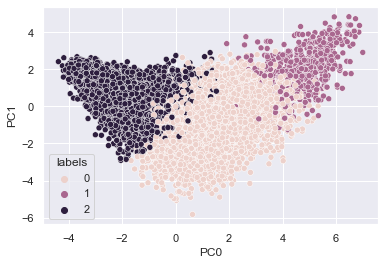

In [194]:
# representation of the clusters on the first 2 PC´s:
sns.scatterplot(x="PC0", y="PC1",hue="labels",data=df_concat_big_k)

### Density Based Clustering

### Mean Shift Clustering 

In [195]:
bandwidth = estimate_bandwidth(df[pc_features], quantile=0.02, random_state=1, n_jobs=-1)
bandwidth

1.5288254940277552

In [196]:
# Perform mean-shift clustering with bandwidth set using estimate_bandwidth
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
# bin_seeding if not set to true will take a lot of time to run
ms_labels = ms.fit_predict(df[pc_features])

ms_n_clusters = len(np.unique(ms_labels))
print("Number of estimated clusters : %d" % ms_n_clusters)

Number of estimated clusters : 77


In [197]:
# Characterizing the 6 clusters
df_concat_ms = df.copy()
df_concat_ms['ms_labels'] = ms_labels

df_final_ms = df_not_standardized.loc[df_concat_ms.index,:]
df_final_ms = pd.concat([df[pc_features],df_final_ms],axis=1)

df_final_ms['ms_labels']=ms_labels

#we also want to compare the clusters with the population:
aux_merge3=df_final_ms[metric_features].mean()
aux_merge3.name='Population'

pd.concat([df_final_ms[metric_features+['ms_labels']].groupby('ms_labels').mean(),pd.DataFrame(aux_merge3).T])[variables_to_interpret]

PremMotor  Motor_Ratio  Household_Ratio    PremLife    PremWork  \
0           407.958011     0.613375         0.122648   14.909308   15.915052   
1           187.878477     0.195098         0.502902   53.598551   53.428829   
2            78.901169     0.075358         0.564846  107.516623  133.890779   
3           113.367952     0.103786         0.591927   31.503976  137.199759   
4            81.120185     0.092894         0.414113  148.394074  155.549815   
...                ...          ...              ...         ...         ...   
73          197.260000     0.299223         0.133184  195.480000   31.340000   
74          135.525714     0.231087         0.040300   53.724286   52.100714   
75          173.700000     0.230630         0.303040   87.350000  212.375000   
76          189.326308     0.262943         0.244033   38.126462   21.037077   
Population  300.495790     0.433690         0.224115   39.627881   38.730382   

            Total_Premiums  Life_Ratio  Effort_Rate  Work_Ratio  Health_Ratio  \
0               632.366756    0.022084     0.022830    0.023808      0.188333   
1              1005.927965    0.052966     0.051998    0.053605      0.195539   
2              1087.812727    0.099287     0.092214    0.123540      0.136969   
3              1137.545783    0.028037     0.082769    0.121539      0.154763   
4               894.524815    0.167472     0.058027    0.175583      0.149938   
...                    ...         ...          ...         ...           ...   
73              659.240000    0.296523     0.109873    0.047540      0.223530   
74              595.241071    0.090884     0.021852    0.087947      0.573718   
75              771.420000    0.110590     0.024069    0.278193      0.077548   
76              739.786615    0.051557     0.048588    0.028796      0.413492   
Population      732.872919    0.049796     0.031975    0.048988      0.227404   

            PremHealth    PremLife     MonthSal  
0           128.278298   14.909308  2649.433307  
1           191.944656   53.598551  1875.591508  
2           147.604805  107.516623  1063.428571  
3           173.177108   31.503976  1293.048193  
4           131.531111  148.394074  1394.685185  
...                ...         ...          ...  
73          147.360000  195.480000   500.000000  
74          340.647500   53.724286  2736.392857  
75           59.345000   87.350000  2727.000000  
76          302.586962   38.126462  1415.488462  
Population  167.871839   39.627881  2514.547700  

[78 rows x 13 columns]

<AxesSubplot:xlabel='PC0', ylabel='PC1'>

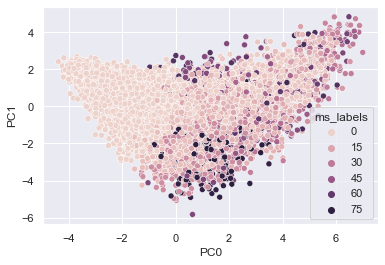

In [198]:
# representation of the clusters on the first 2 PC´s:
sns.scatterplot(x="PC0", y="PC1",hue="ms_labels",data=df_concat_ms)

### Visual Analysis of the metric features´ results

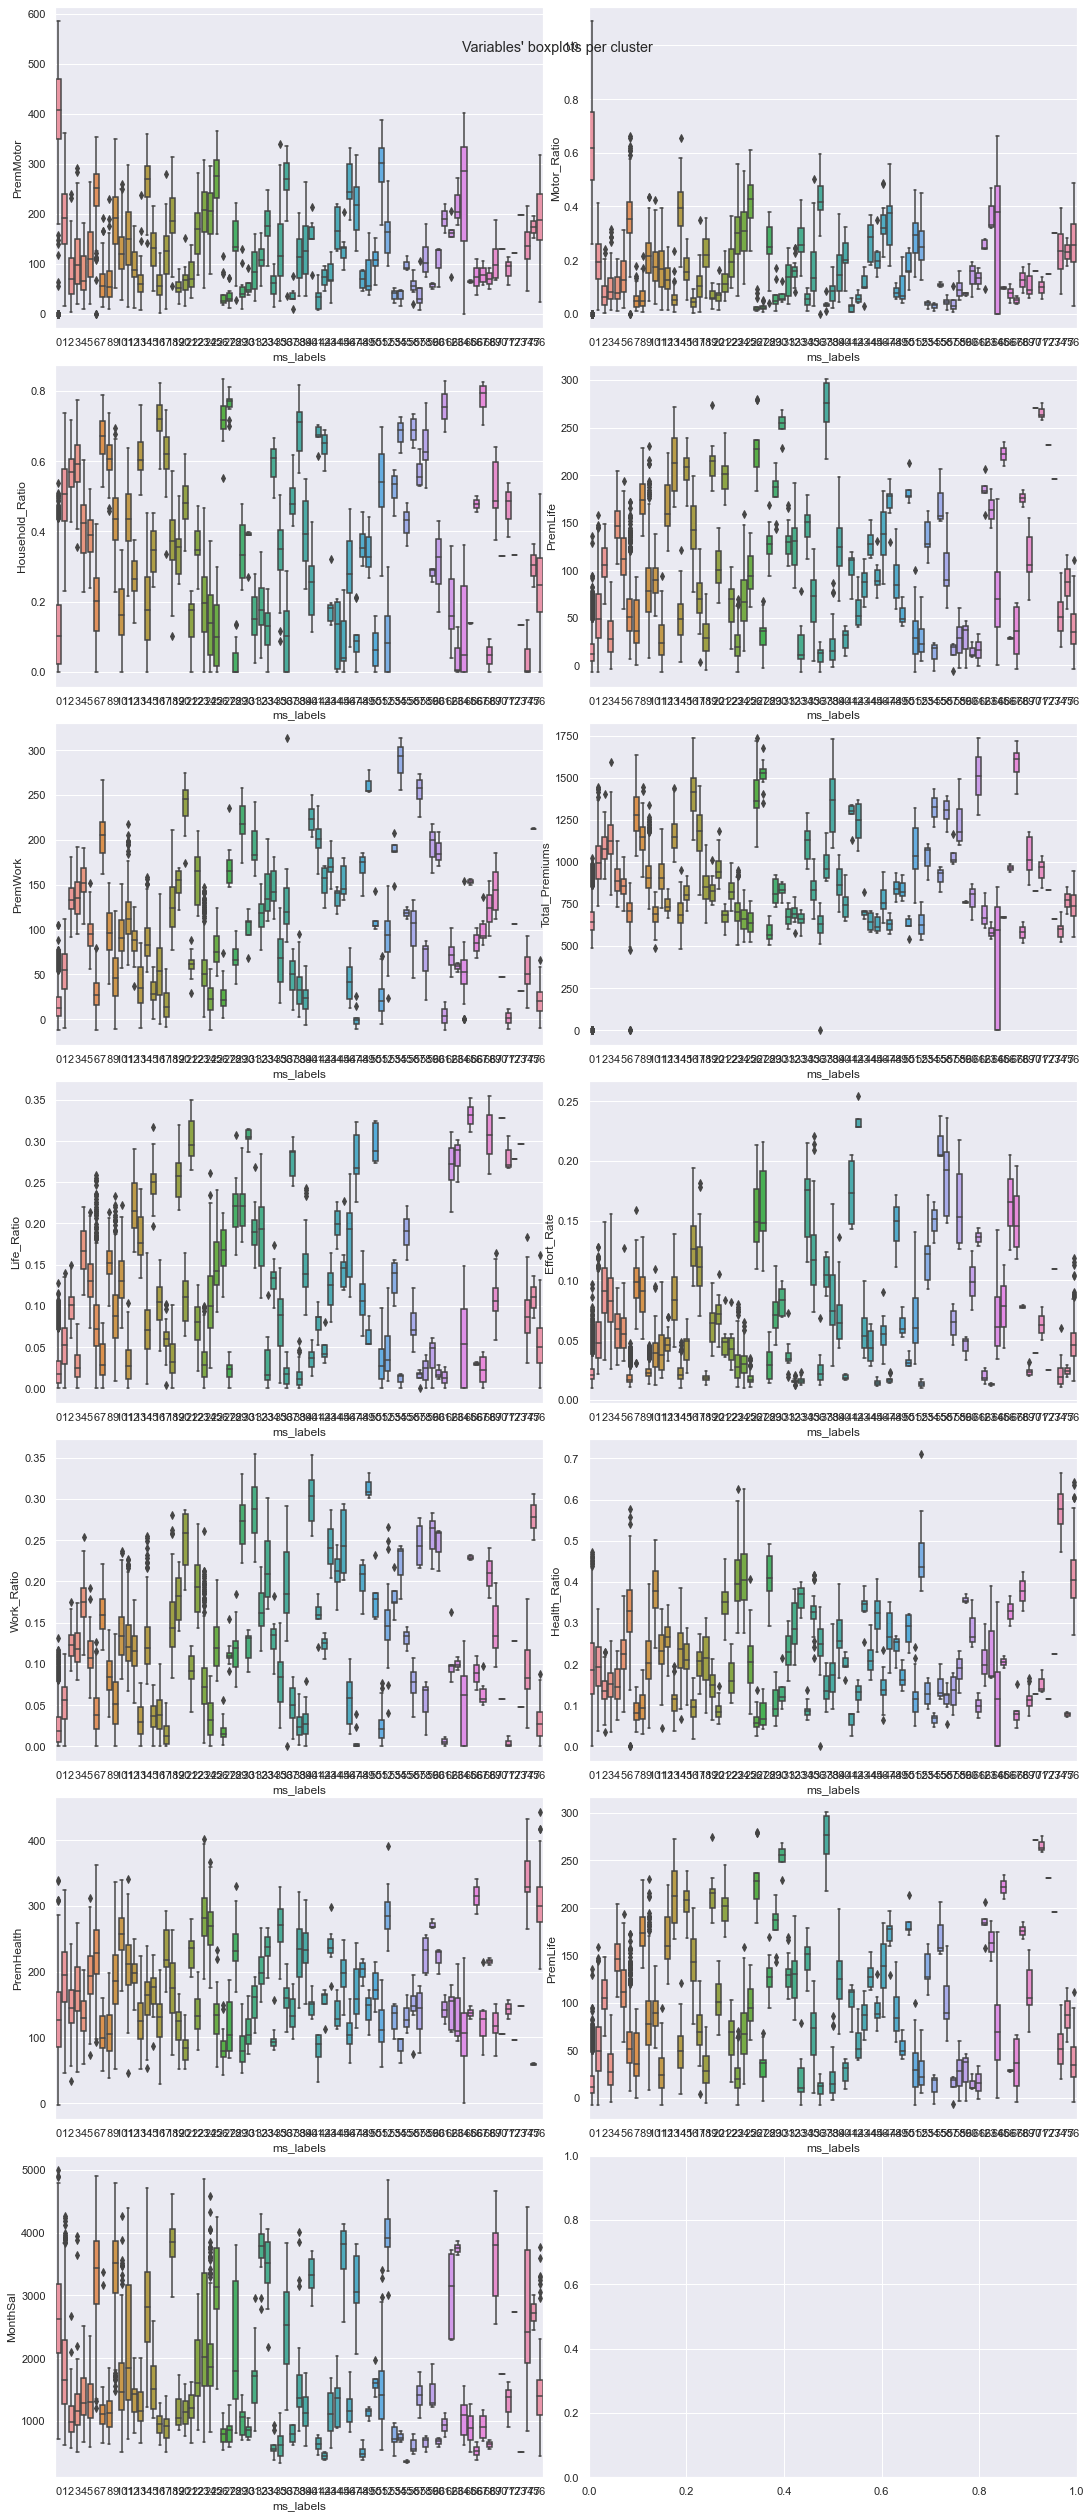

In [199]:
sns.set()

fig, axes = plt.subplots(7,2, figsize=(15,35))
fig.tight_layout()

for ax, feat in zip(axes.flatten(), variables_to_interpret):
    sns.boxplot(x="ms_labels", y=feat, data=df_final_ms,ax=ax)

title = "Variables' boxplots per cluster"
plt.suptitle(title)
plt.show()

### R^2

In [200]:
sst = get_ss(df_concat_ms[pc_features])
ssw_labels = get_ss(df_concat_ms[pc_features + ["ms_labels"]].groupby(by='ms_labels'))
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.6825


### DBSCAN (Density-based spatial clustering of applications with noise)

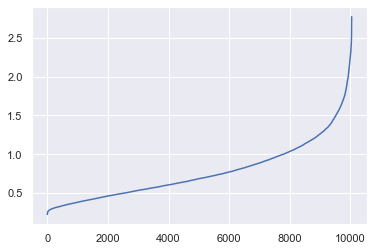

In [201]:
# K-distance graph to find out the right eps value
neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(df[pc_features])
distances, _ = neigh.kneighbors(df[pc_features])
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.show()

In [202]:
dbscan = DBSCAN(eps=1.5, min_samples=10, n_jobs=4) 
dbscan_labels = dbscan.fit_predict(df[pc_features])

dbscan_n_clusters = len(np.unique(dbscan_labels))
print("Number of estimated clusters : %d" % dbscan_n_clusters)

Number of estimated clusters : 2


In [203]:
# Characterizing the clusters
df_concat_dbscan = df.copy()
df_concat_dbscan['dbscan_labels'] = dbscan_labels

df_final_dbscan = df_not_standardized.loc[df_concat_dbscan.index,:]
df_final_dbscan = pd.concat([df[pc_features],df_final_dbscan],axis=1)

df_final_dbscan['dbscan_labels']=dbscan_labels

#we also want to compare the clusters with the population:
aux_merge4=df_final_dbscan[metric_features].mean()
aux_merge4.name='Population'

pd.concat([df_final_dbscan[metric_features+['dbscan_labels']].groupby('dbscan_labels').mean(),pd.DataFrame(aux_merge4).T])[variables_to_interpret]

PremMotor  Motor_Ratio  Household_Ratio    PremLife    PremWork  \
-1          109.684835     0.148673         0.312948  118.130714  129.781374   
0           304.017858     0.438951         0.222475   38.178843   37.049725   
Population  300.495790     0.433690         0.224115   39.627881   38.730382   

            Total_Premiums  Life_Ratio  Effort_Rate  Work_Ratio  Health_Ratio  \
-1              845.192692    0.148162     0.084709    0.164440      0.215999   
0               730.799673    0.047980     0.031002    0.046857      0.227615   
Population      732.872919    0.049796     0.031975    0.048988      0.227404   

            PremHealth    PremLife     MonthSal  
-1          161.369890  118.130714  1570.362637  
0           167.991855   38.178843  2531.975862  
Population  167.871839   39.627881  2514.547700

### Visual Analysis of the metric features´ results:

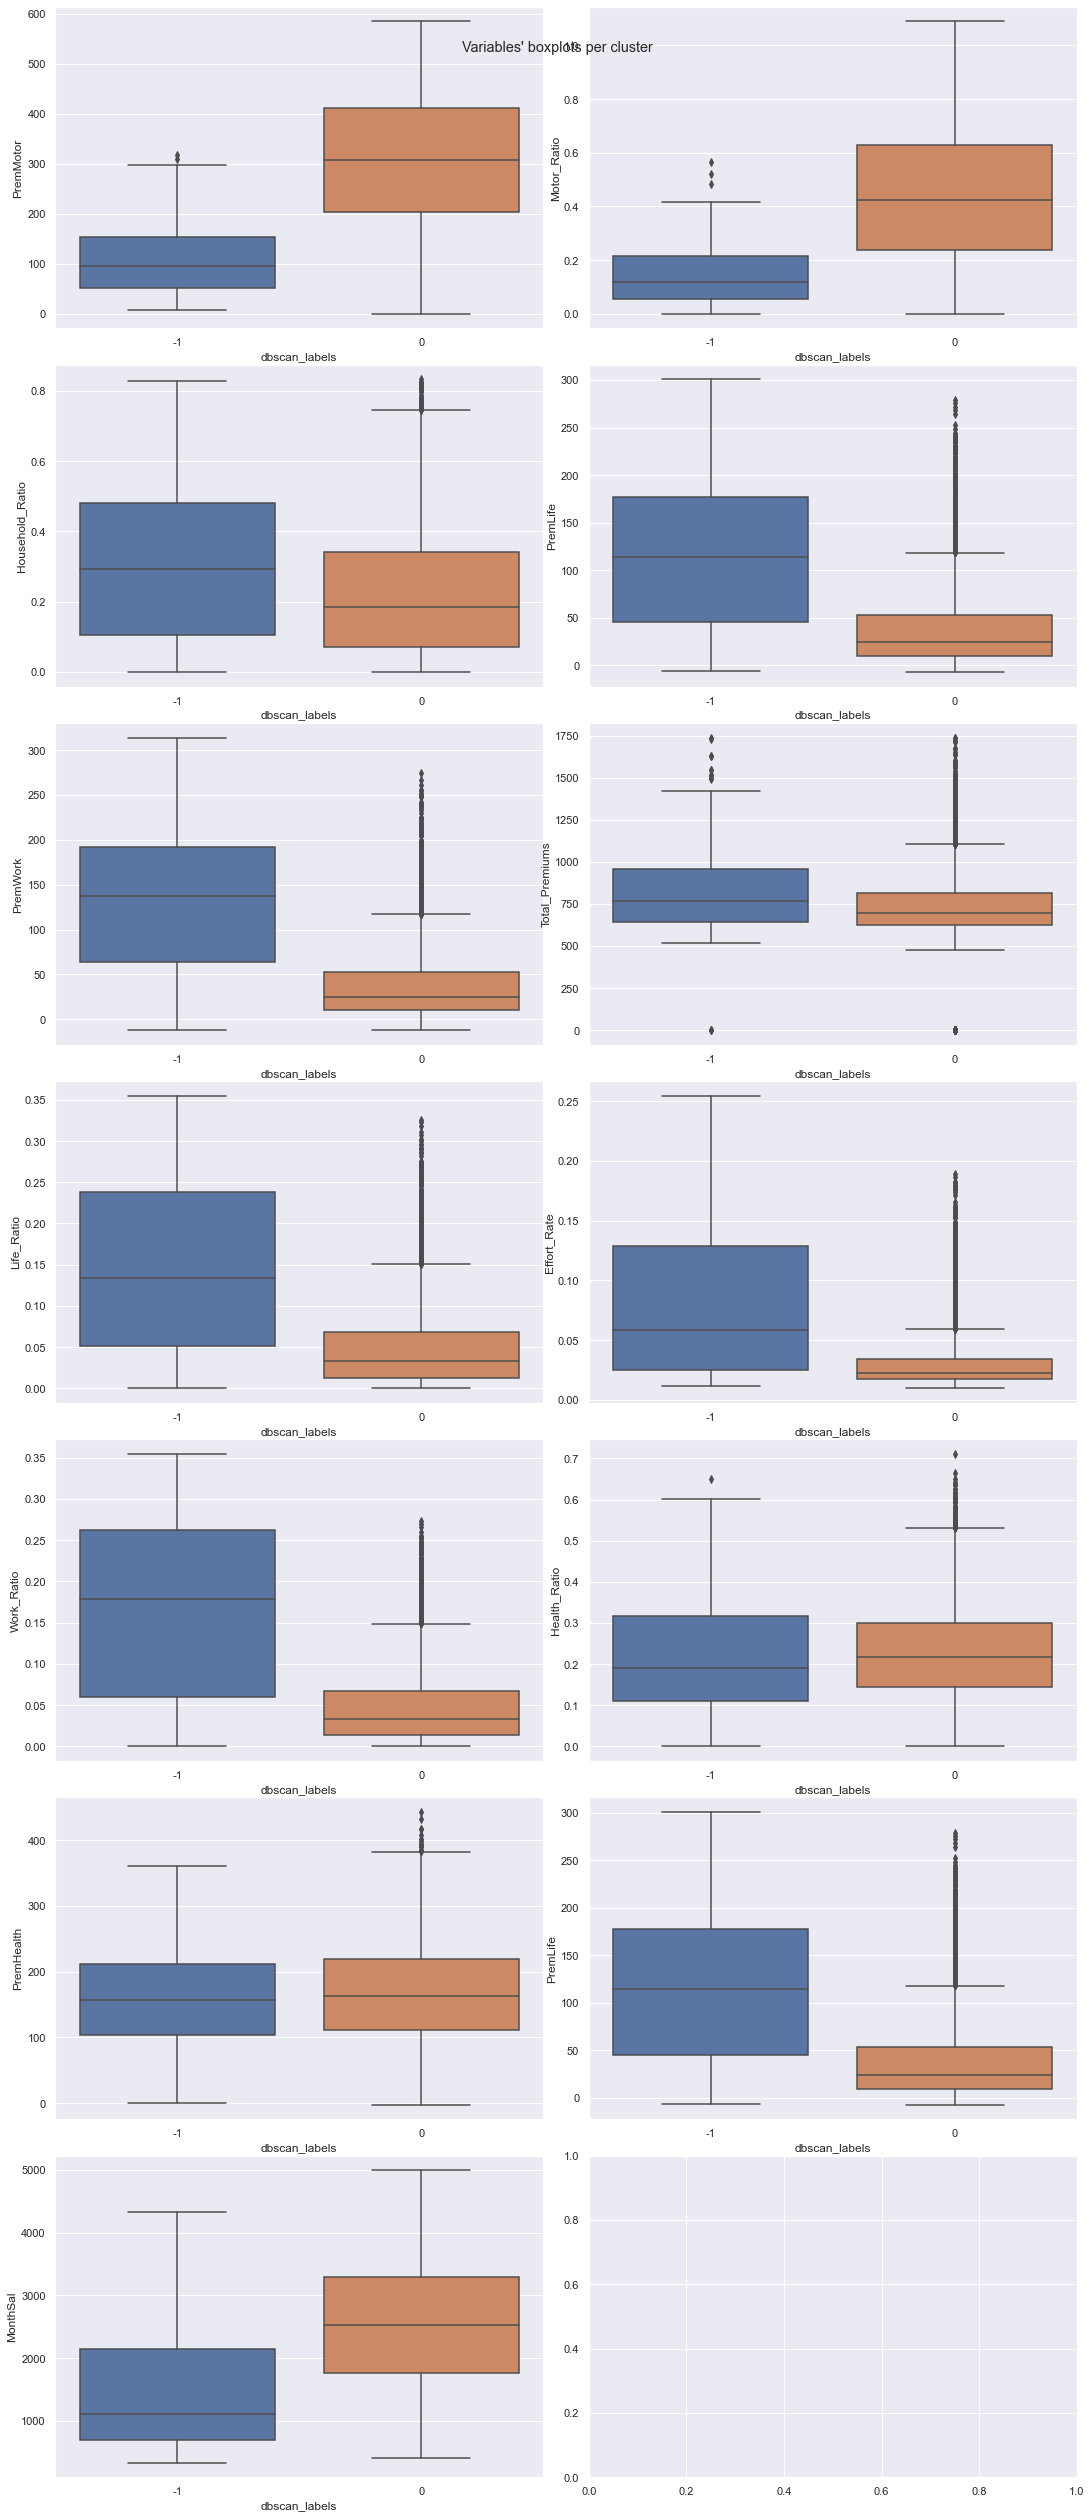

In [204]:
sns.set()

fig, axes = plt.subplots(7,2, figsize=(15,35))
fig.tight_layout()

for ax, feat in zip(axes.flatten(), variables_to_interpret):
    sns.boxplot(x="dbscan_labels", y=feat, data=df_final_dbscan,ax=ax)

title = "Variables' boxplots per cluster"
plt.suptitle(title)
plt.show()

<AxesSubplot:xlabel='PC0', ylabel='PC1'>

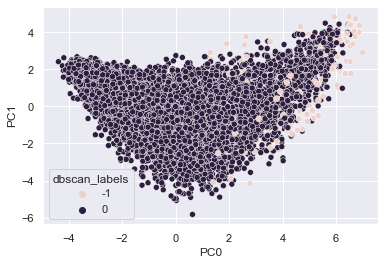

In [205]:
# representation of the clusters on the first 2 PC´s:
sns.scatterplot(x="PC0", y="PC1",hue="dbscan_labels",data=df_concat_dbscan)

### R^2

In [206]:
df_nonoise = df_concat_dbscan[df_concat_dbscan['dbscan_labels'] != -1]

sst = get_ss(df_concat_dbscan[pc_features])
ssw_labels = get_ss(df_nonoise[pc_features + ["dbscan_labels"]].groupby(by='dbscan_labels'))
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.0810


### Gaussian Mixture Model

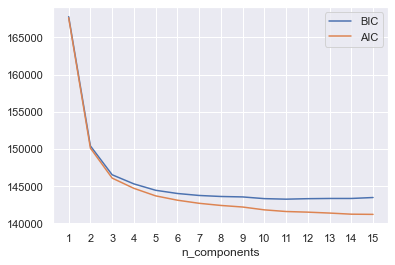

In [207]:
# Selecting number of components based on AIC and BIC
n_components = np.arange(1, 16)
models = [GaussianMixture(n, covariance_type='full', n_init=10, random_state=1).fit(df[pc_features])
          for n in n_components]

bic_values = [m.bic(df[pc_features]) for m in models]
aic_values = [m.aic(df[pc_features]) for m in models]
plt.plot(n_components, bic_values, label='BIC')
plt.plot(n_components, aic_values, label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')
plt.xticks(n_components)
plt.show()

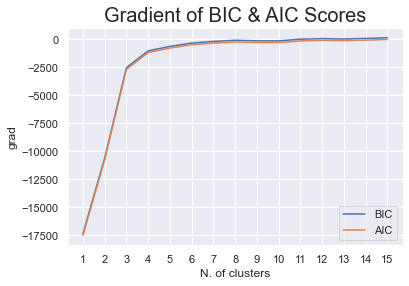

In [208]:
plt.errorbar(n_components, np.gradient(bic_values), label='BIC')
plt.errorbar(n_components, np.gradient(aic_values), label='AIC')
plt.title("Gradient of BIC & AIC Scores", fontsize=20)
plt.xticks(n_components)
plt.xlabel("N. of clusters")
plt.ylabel("grad")
plt.legend()

In [209]:
gmm = GaussianMixture(n_components=3, covariance_type='full', n_init=10, init_params='kmeans', random_state=1)
gmm_labels = gmm.fit_predict(df[pc_features])
df_concat_gmm = pd.concat([df[pc_features], pd.Series(gmm_labels, index=df.index, name="gmm_labels")], axis=1)

In [210]:
df_concat_gmm['gmm_labels'].value_counts()

0    4544
1    3535
2    1963
Name: gmm_labels, dtype: int64

In [211]:
# ANALYSING THE GMM CLUSTERING SOLUTION FOR THE METRIC FEATURES:
df_final_gmm = df_not_standardized.loc[df_concat_gmm.index,:]
df_final_gmm['gmm_labels']=df_concat_gmm['gmm_labels'].copy()
df_final_gmm[variables_to_interpret+['gmm_labels']].groupby('gmm_labels').mean()

PremMotor  Motor_Ratio  Household_Ratio   PremLife   PremWork  \
gmm_labels                                                                   
0           265.902302     0.362457         0.248588  37.995843  36.650689   
1           440.616478     0.680048         0.086481   9.691802   9.909813   
2           128.242185     0.154935         0.415316  97.315104  95.445023   

            Total_Premiums  Life_Ratio  Effort_Rate  Work_Ratio  Health_Ratio  \
gmm_labels                                                                      
0               741.446349    0.050121     0.027598    0.048550      0.273133   
1               607.733542    0.015622     0.021851    0.016499      0.177098   
2               938.379812    0.110582     0.060339    0.108508      0.212141   

            PremHealth   PremLife     MonthSal  
gmm_labels                                      
0           202.517678  37.995843  2720.817121  
1           116.192611   9.691802  2615.625743  
2           180.737545  97.315104  1855.047376

<AxesSubplot:xlabel='PC0', ylabel='PC1'>

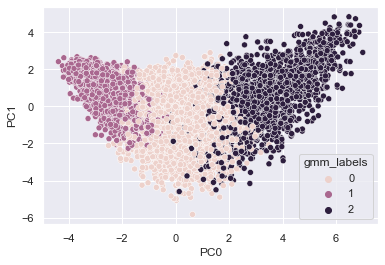

In [212]:
sns.scatterplot(x="PC0", y="PC1",hue="gmm_labels",data=df_concat_gmm)

### Visual Analysis of the metric features´ results

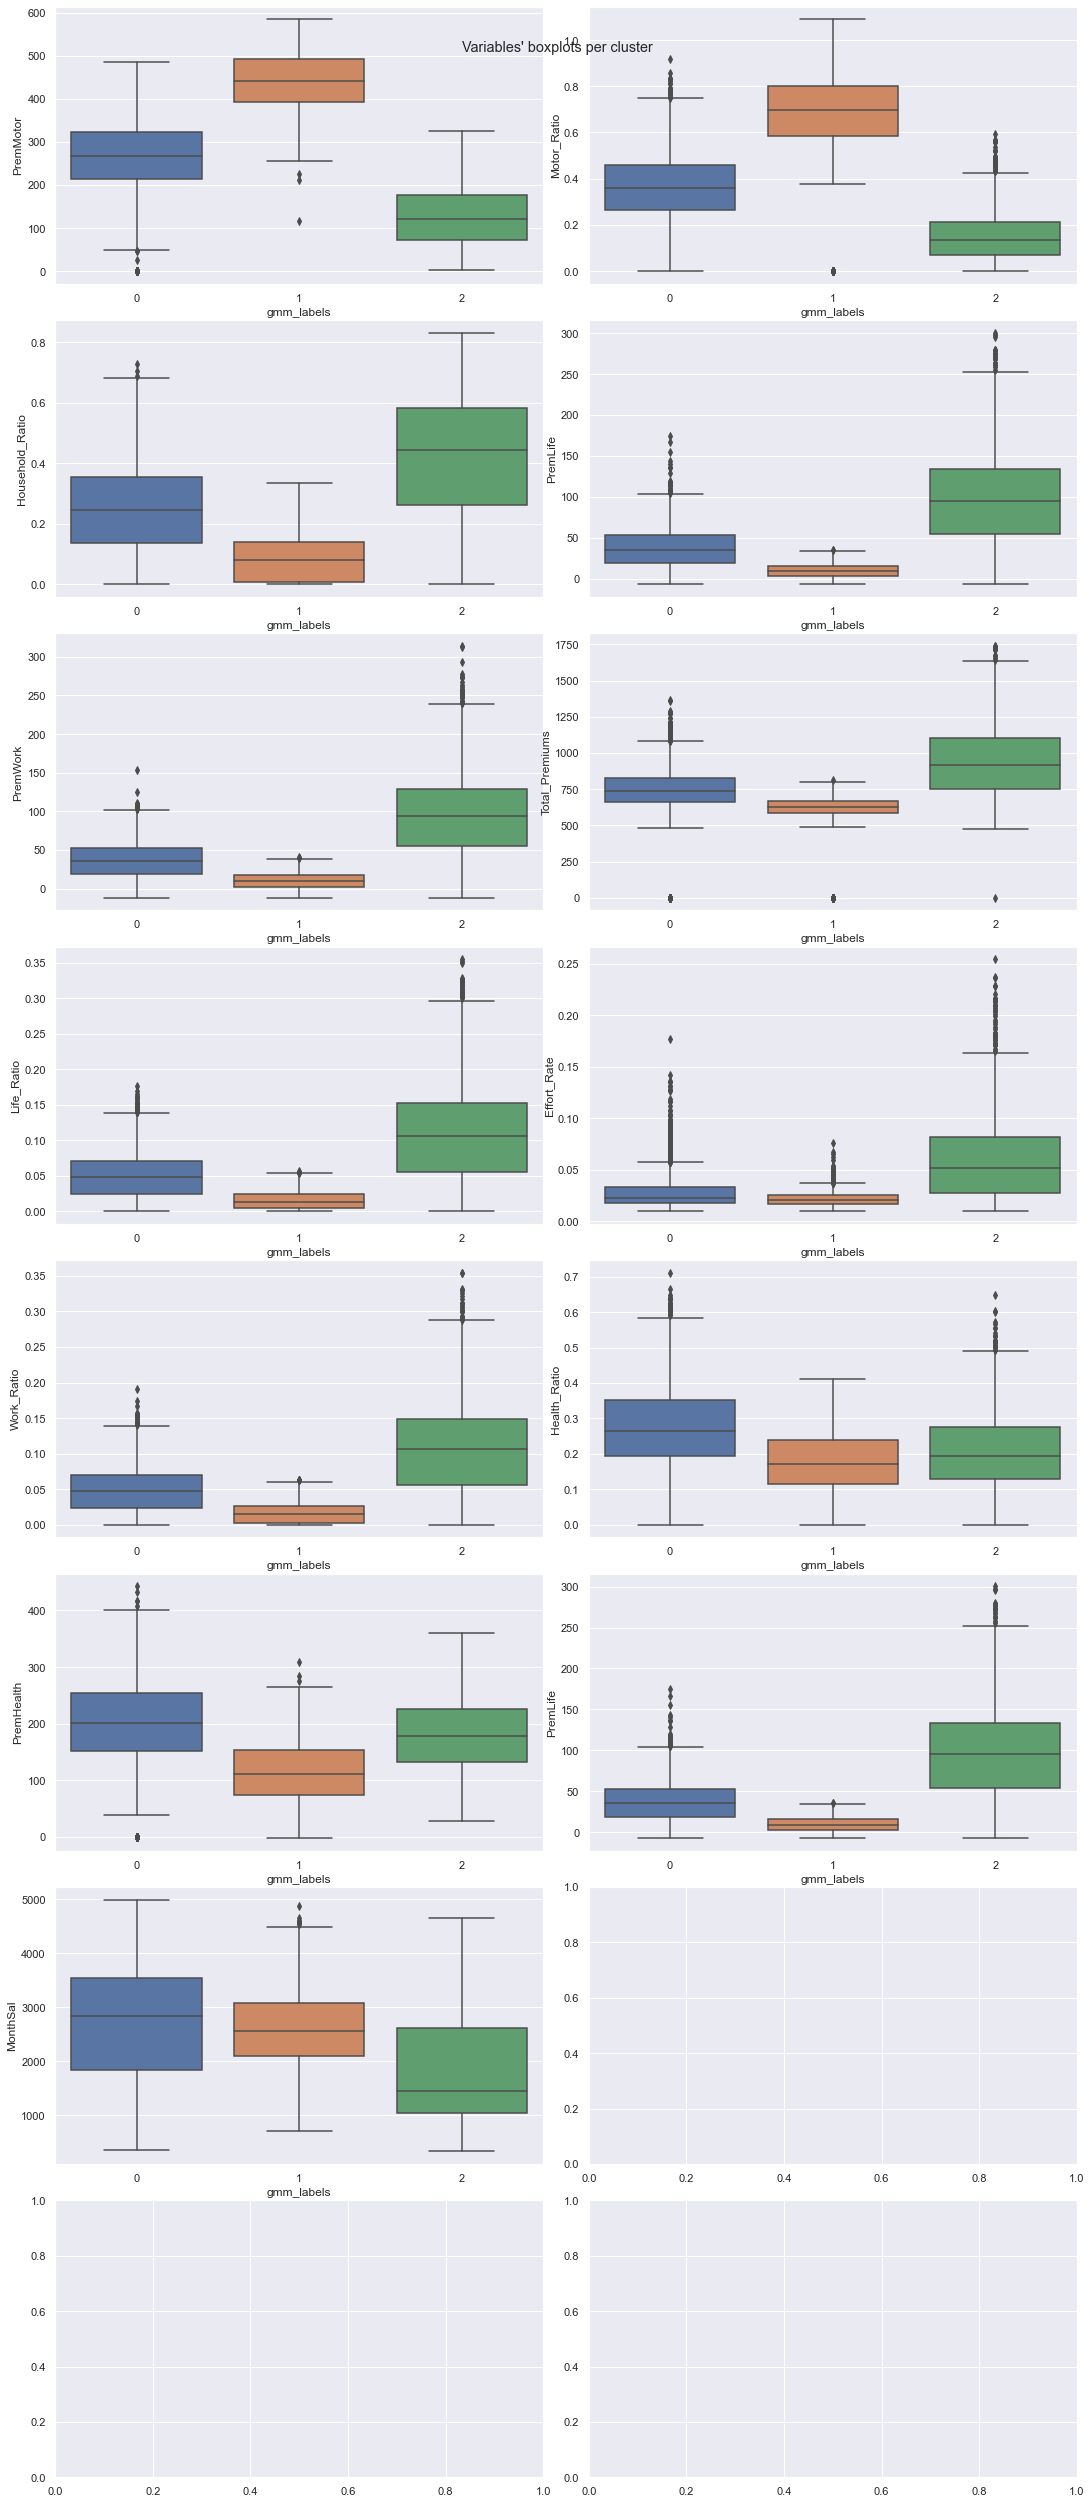

In [213]:
sns.set()

fig, axes = plt.subplots(8,2, figsize=(15,35))
fig.tight_layout()

for ax, feat in zip(axes.flatten(), variables_to_interpret):
    sns.boxplot(x="gmm_labels", y=feat, data=df_final_gmm,ax=ax)

title = "Variables' boxplots per cluster"
plt.suptitle(title)
plt.show()

### R^2

In [214]:
sst = get_ss(df[pc_features])
ssw_labels = get_ss(df_concat_gmm.groupby(by='gmm_labels'))
ssb = sst - np.sum(ssw_labels)
r2 = ssb / sst
print("Cluster solution with R^2 of %0.4f" % r2)

Cluster solution with R^2 of 0.4200


### SOM (Self Organizing Maps)

In [215]:
import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

In [216]:
np.random.seed(42)

sm = sompy.SOMFactory().build(
    df[pc_features].values, 
    mapsize=[50, 50], 
    initialization='random',
    neighborhood='gaussian',
    training='batch',
    lattice='hexa',
    component_names=pc_features
)
sm.train(n_job=-1, verbose='info', train_rough_len=100, train_finetune_len=100)

 Training...
 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 17.000000 , radius_final: 2.833333, trainlen: 100

 epoch: 1 ---> elapsed time:  0.251000, quantization error: 1.105257

 epoch: 2 ---> elapsed time:  0.236000, quantization error: 2.034026

 epoch: 3 ---> elapsed time:  0.229000, quantization error: 2.012370

 epoch: 4 ---> elapsed time:  0.292000, quantization error: 2.008073

 epoch: 5 ---> elapsed time:  0.285000, quantization error: 2.005725

 epoch: 6 ---> elapsed time:  0.260000, quantization error: 2.004203

 epoch: 7 ---> elapsed time:  0.302000, quantization error: 2.003171

 epoch: 8 ---> elapsed time:  0.235000, quantization error: 2.002313

 epoch: 9 ---> elapsed time:  0.250000, quantization error: 2.001534

 epoch: 10 ---> elapsed time:  0.242000, quantization error: 2.000758

 epoch: 11 ---> elapsed time:  0.333000, quantization error: 1.999978

 epoch: 12 ---> elapsed time:  0.335000, quantization error: 1.999199

 epoch: 13 --->

 epoch: 14 ---> elapsed time:  0.317000, quantization error: 1.465288

 epoch: 15 ---> elapsed time:  0.291000, quantization error: 1.458893

 epoch: 16 ---> elapsed time:  0.248000, quantization error: 1.452456

 epoch: 17 ---> elapsed time:  0.241000, quantization error: 1.445905

 epoch: 18 ---> elapsed time:  0.297000, quantization error: 1.439308

 epoch: 19 ---> elapsed time:  0.307000, quantization error: 1.432608

 epoch: 20 ---> elapsed time:  0.232000, quantization error: 1.425829

 epoch: 21 ---> elapsed time:  0.267000, quantization error: 1.418963

 epoch: 22 ---> elapsed time:  0.277000, quantization error: 1.412059

 epoch: 23 ---> elapsed time:  0.261000, quantization error: 1.405052

 epoch: 24 ---> elapsed time:  0.240000, quantization error: 1.397962

 epoch: 25 ---> elapsed time:  0.278000, quantization error: 1.390845

 epoch: 26 ---> elapsed time:  0.272000, quantization error: 1.383665

 epoch: 27 ---> elapsed time:  0.243000, quantization error: 1.376387

 epoch

### Component Planes

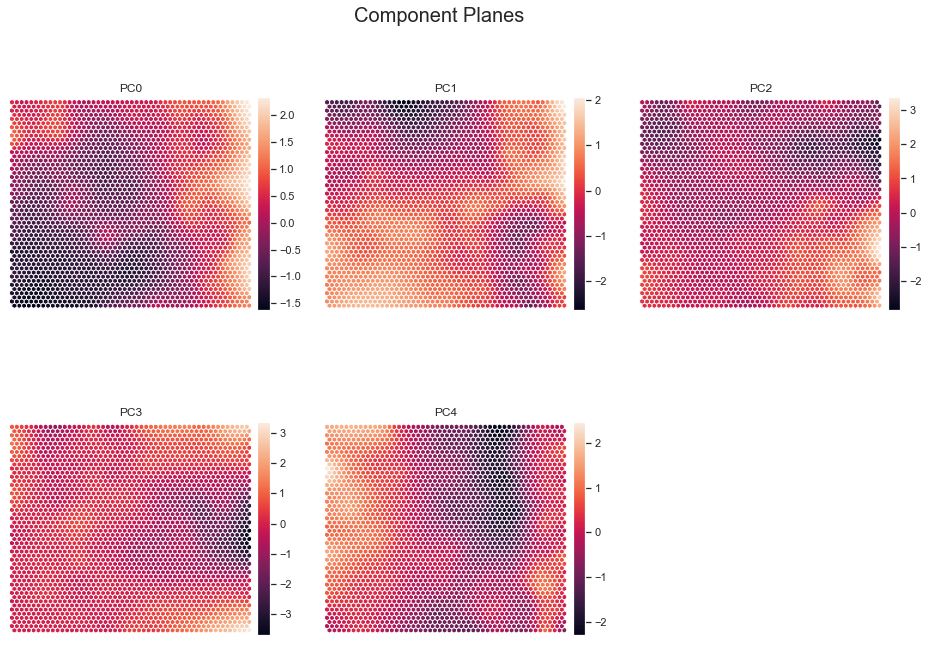

In [217]:
sns.set()
view2D = View2D(12,12,"", text_size=10)
view2D.show(sm, col_sz=3, what='codebook')
plt.subplots_adjust(top=0.90)
plt.suptitle("Component Planes", fontsize=20)
plt.show()

### U-Matrix

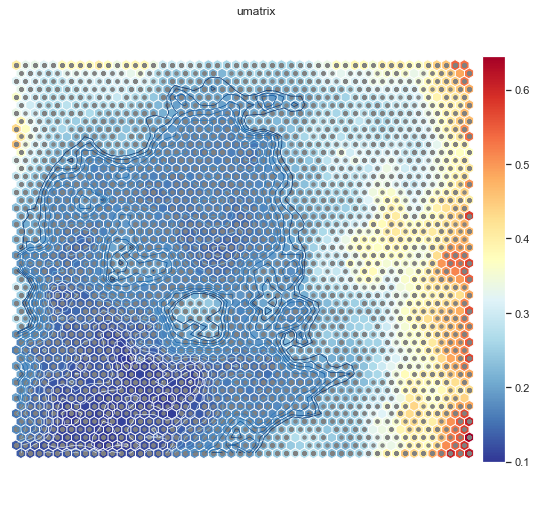

array([[0.40201038, 0.32933473, 0.33268205, ..., 0.45841898, 0.54513055,
        0.53575176],
       [0.3266607 , 0.31161362, 0.30047659, ..., 0.44682663, 0.48594708,
        0.52982197],
       [0.32091514, 0.31800425, 0.31008004, ..., 0.42770067, 0.45064526,
        0.52868117],
       ...,
       [0.15610623, 0.1429649 , 0.13394057, ..., 0.52114984, 0.5524408 ,
        0.64505689],
       [0.13311418, 0.12942286, 0.12183373, ..., 0.50954801, 0.54584972,
        0.59297184],
       [0.13234391, 0.11876749, 0.12173459, ..., 0.6036656 , 0.56390756,
        0.61580236]])

In [218]:
u = sompy.umatrix.UMatrixView(9, 9, 'umatrix', show_axis=True, text_size=8, show_text=True)

UMAT = u.show(
    sm, 
    distance=2, 
    row_normalized=False, 
    show_data=True, 
    contour=True,
    blob=False
)
np.flip(UMAT[1], axis=1)

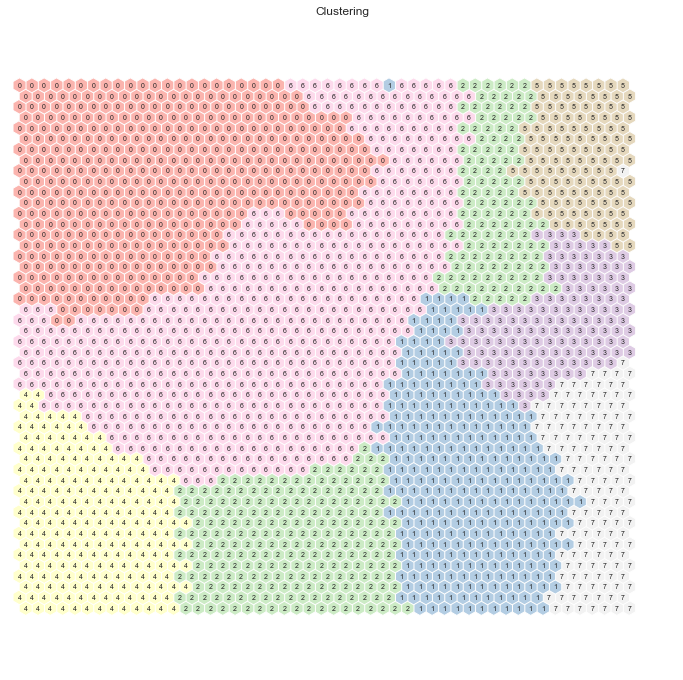

In [219]:
# Perform Hierarchical clustering - Gave us 3
hierclust = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity="euclidean")
nodeclus_labels = hierclust.fit_predict(sm.codebook.matrix)#sm.cluster(hierclust)

hits  = HitMapView(12, 12,"Clustering",text_size=10)
hits.show(sm, anotate=True, onlyzeros=False, labelsize=7, cmap="Pastel1")

plt.show()

In [220]:
nodes = sm.get_node_vectors()

df_nodes = pd.DataFrame(nodes, columns=pc_features)
df_nodes['som_labels'] = nodeclus_labels
df_nodes

AttributeError: 'SOM' object has no attribute 'get_node_vectors'